In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statannot import add_stat_annotation

In [3]:
metadata = pd.read_csv('../../adaptation_master_metadata.txt', sep='\t', index_col=0)
metadata.head()

box_id  cage_id collection_timepoint collection_timestamp  \
sample_name                                                                    
12986.23B.Day7.1     10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.10    10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.11    10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.12    10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.13    14.0       23                 Day7        7/19/17 10:00   

                  date_colonized diet  elevation elevation_units  \
sample_name                                                        
12986.23B.Day7.1    7/12/17 0:00   RC        193          meters   
12986.23B.Day7.10   7/12/17 0:00   RC        193          meters   
12986.23B.Day7.11   7/12/17 0:00   RC        193          meters   
12986.23B.Day7.12   7/12/17 0:00   RC        193          meters   
12986.23B.Day7.13   7/12/17 0:00   RC        193          meters   

                            empo_1  empo_2  ... zarrinparlab_quant_ng_ul  \
sample_name                                 ...                            
12986.23B.Day7.1   Host-associated  Animal  ...                     78.0   
12986.23B.Day7.10  Host-associated  Animal  ...                     53.3   
12986.23B.Day7.11  Host-associated  Animal  ...                     80.6   
12986.23B.Day7.12  Host-associated  Animal  ...                     49.1   
12986.23B.Day7.13  Host-associated  Animal  ...                     48.6   

                  mouse dam sire date_collected bacteria_strain  \
sample_name                                                       
12986.23B.Day7.1    23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.10   23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.11   23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.12   23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.13   23B  A1    A        7/19/17            AZ20   

                   extraction_method     extraction_kit run plate  
sample_name                                                        
12986.23B.Day7.1              filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.10             filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.11             filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.12             filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.13             filter  Qiagen UltraClean   1   NaN  

[5 rows x 54 columns]

In [4]:
metadata['dramv_id'] = metadata['mouse_id'].astype(str)+"_"+ metadata['collection_timepoint'].astype(str)+"_"+ metadata['isolate_number'].astype(str)

In [5]:
metadata = metadata.reset_index()

In [6]:
metadata = metadata.set_index('dramv_id')
metadata.head()

sample_name  box_id  cage_id collection_timepoint  \
dramv_id                                                               
23B_Day7_1    12986.23B.Day7.1    10.0       23                 Day7   
23B_Day7_10  12986.23B.Day7.10    10.0       23                 Day7   
23B_Day7_11  12986.23B.Day7.11    10.0       23                 Day7   
23B_Day7_12  12986.23B.Day7.12    10.0       23                 Day7   
23B_Day7_13  12986.23B.Day7.13    14.0       23                 Day7   

            collection_timestamp date_colonized diet  elevation  \
dramv_id                                                          
23B_Day7_1         7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_10        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_11        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_12        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_13        7/19/17 10:00   7/12/17 0:00   RC        193   

            elevation_units           empo_1  ... zarrinparlab_quant_ng_ul  \
dramv_id                                      ...                            
23B_Day7_1           meters  Host-associated  ...                     78.0   
23B_Day7_10          meters  Host-associated  ...                     53.3   
23B_Day7_11          meters  Host-associated  ...                     80.6   
23B_Day7_12          meters  Host-associated  ...                     49.1   
23B_Day7_13          meters  Host-associated  ...                     48.6   

            mouse dam sire date_collected bacteria_strain extraction_method  \
dramv_id                                                                      
23B_Day7_1    23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_10   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_11   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_12   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_13   23B  A1    A        7/19/17            AZ20            filter   

                extraction_kit run plate  
dramv_id                                  
23B_Day7_1   Qiagen UltraClean   1   NaN  
23B_Day7_10  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_12  Qiagen UltraClean   1   NaN  
23B_Day7_13  Qiagen UltraClean   1   NaN  

[5 rows x 55 columns]

In [7]:
assembly_list = pd.read_csv('../assembly/AZ20_assembly_list.txt', sep='\t', header=None)
assembly_list.rename(columns={0:'sample-id'}, inplace=True)
assembly_list.head()

sample-id
0    23B_Day7_11_S38
1   23B_Day7_12_S384
2  23B_Day7_13_S1294
3  23B_Day7_14_S1295
4  23B_Day7_16_S1297

In [8]:
assembly_list[['mouse', 'collection_timepoint', 'isolate', 'sample_number']] = assembly_list['sample-id'].str.split("_", n=3, expand=True)
assembly_list.head()

sample-id mouse collection_timepoint isolate sample_number
0    23B_Day7_11_S38   23B                 Day7      11           S38
1   23B_Day7_12_S384   23B                 Day7      12          S384
2  23B_Day7_13_S1294   23B                 Day7      13         S1294
3  23B_Day7_14_S1295   23B                 Day7      14         S1295
4  23B_Day7_16_S1297   23B                 Day7      16         S1297

In [9]:
assembly_list2 = assembly_list[['collection_timepoint', 'mouse', 'isolate']].copy()
assembly_list2 = assembly_list2.groupby(by=['collection_timepoint', 'mouse']).count()
assembly_list2.reset_index(inplace=True)
assembly_list2

collection_timepoint mouse  isolate
0                  Day3  23LL       18
1                  Day3   25N       20
2                  Day3   28L       18
3                  Day3   28N       15
4                  Day7   23B       20
..                  ...   ...      ...
65               Month6   27R       23
66               Month6   28L        8
67               Month6   28N        8
68               Month6   28R        5
69               Month6  29LL        4

[70 rows x 3 columns]

# AZ20

### Overview

In [10]:
Nissle_overview = pd.read_csv('./AZ20_vMAGs_stats.csv', low_memory=False, index_col=18)
Nissle_overview.head()

Unnamed: 0.1            Unnamed: 0  VIRSorter category  Circular  \
simple_id                                                                       
23B_Day7_21             0  1__0_partial_1-cat_1                   1     False   
23B_Day7_21             1  2__0_partial_1-cat_1                   1     False   
23B_Day7_21             2  7__0_partial_1-cat_1                   1     False   
23B_Day7_11             3  2__0_partial_1-cat_1                   1     False   
23B_Day7_11             4  3__0_partial_1-cat_1                   1     False   

             Prophage  Gene count  Strand switches  potential AMG count  \
simple_id                                                                 
23B_Day7_21     False          57                7                    0   
23B_Day7_21     False          17                2                    0   
23B_Day7_21     False          46                8                    0   
23B_Day7_11     False          57                7                    0   
23B_Day7_11     False          17                2                    0   

             Transposase present  Possible Non-Viral Contig  \
simple_id                                                     
23B_Day7_21                False                   0.017544   
23B_Day7_21                False                   0.058824   
23B_Day7_21                False                   0.065217   
23B_Day7_11                False                   0.017544   
23B_Day7_11                False                   0.058824   

             Viral genes with host benefits  \
simple_id                                     
23B_Day7_21                             5.0   
23B_Day7_21                             3.0   
23B_Day7_21                            10.0   
23B_Day7_11                             8.0   
23B_Day7_11                             3.0   

             Viral genes with unknown function  Viral structure genes  \
simple_id                                                               
23B_Day7_21                               18.0                    2.0   
23B_Day7_21                                0.0                    0.0   
23B_Day7_21                               15.0                    0.0   
23B_Day7_11                               18.0                    2.0   
23B_Day7_11                                0.0                    0.0   

             Viral hypothetical genes  Viral genes with viral benefits  \
simple_id                                                                
23B_Day7_21                      17.0                              9.0   
23B_Day7_21                      12.0                              0.0   
23B_Day7_21                       5.0                             10.0   
23B_Day7_11                      17.0                              1.0   
23B_Day7_11                      12.0                              0.0   

             Viral replication genes  \
simple_id                              
23B_Day7_21                      6.0   
23B_Day7_21                      2.0   
23B_Day7_21                      6.0   
23B_Day7_11                     11.0   
23B_Day7_11                      2.0   

                                               identification  \
simple_id                                                       
23B_Day7_21  ./23B_Day7_21_S1302/dramv-distill/vMAG_stats.tsv   
23B_Day7_21  ./23B_Day7_21_S1302/dramv-distill/vMAG_stats.tsv   
23B_Day7_21  ./23B_Day7_21_S1302/dramv-distill/vMAG_stats.tsv   
23B_Day7_11    ./23B_Day7_11_S38/dramv-distill/vMAG_stats.tsv   
23B_Day7_11    ./23B_Day7_11_S38/dramv-distill/vMAG_stats.tsv   

                        sample  
simple_id                       
23B_Day7_21  23B_Day7_21_S1302  
23B_Day7_21  23B_Day7_21_S1302  
23B_Day7_21  23B_Day7_21_S1302  
23B_Day7_11    23B_Day7_11_S38  
23B_Day7_11    23B_Day7_11_S38

In [11]:
Nissle_overview.rename(columns={'Unnamed: 0': 'index_num', 'Unnamed: 0.1': 'segment'}, inplace=True)

In [12]:
Nissle_overview.head()

segment             index_num  VIRSorter category  Circular  \
simple_id                                                                  
23B_Day7_21        0  1__0_partial_1-cat_1                   1     False   
23B_Day7_21        1  2__0_partial_1-cat_1                   1     False   
23B_Day7_21        2  7__0_partial_1-cat_1                   1     False   
23B_Day7_11        3  2__0_partial_1-cat_1                   1     False   
23B_Day7_11        4  3__0_partial_1-cat_1                   1     False   

             Prophage  Gene count  Strand switches  potential AMG count  \
simple_id                                                                 
23B_Day7_21     False          57                7                    0   
23B_Day7_21     False          17                2                    0   
23B_Day7_21     False          46                8                    0   
23B_Day7_11     False          57                7                    0   
23B_Day7_11     False          17                2                    0   

             Transposase present  Possible Non-Viral Contig  \
simple_id                                                     
23B_Day7_21                False                   0.017544   
23B_Day7_21                False                   0.058824   
23B_Day7_21                False                   0.065217   
23B_Day7_11                False                   0.017544   
23B_Day7_11                False                   0.058824   

             Viral genes with host benefits  \
simple_id                                     
23B_Day7_21                             5.0   
23B_Day7_21                             3.0   
23B_Day7_21                            10.0   
23B_Day7_11                             8.0   
23B_Day7_11                             3.0   

             Viral genes with unknown function  Viral structure genes  \
simple_id                                                               
23B_Day7_21                               18.0                    2.0   
23B_Day7_21                                0.0                    0.0   
23B_Day7_21                               15.0                    0.0   
23B_Day7_11                               18.0                    2.0   
23B_Day7_11                                0.0                    0.0   

             Viral hypothetical genes  Viral genes with viral benefits  \
simple_id                                                                
23B_Day7_21                      17.0                              9.0   
23B_Day7_21                      12.0                              0.0   
23B_Day7_21                       5.0                             10.0   
23B_Day7_11                      17.0                              1.0   
23B_Day7_11                      12.0                              0.0   

             Viral replication genes  \
simple_id                              
23B_Day7_21                      6.0   
23B_Day7_21                      2.0   
23B_Day7_21                      6.0   
23B_Day7_11                     11.0   
23B_Day7_11                      2.0   

                                               identification  \
simple_id                                                       
23B_Day7_21  ./23B_Day7_21_S1302/dramv-distill/vMAG_stats.tsv   
23B_Day7_21  ./23B_Day7_21_S1302/dramv-distill/vMAG_stats.tsv   
23B_Day7_21  ./23B_Day7_21_S1302/dramv-distill/vMAG_stats.tsv   
23B_Day7_11    ./23B_Day7_11_S38/dramv-distill/vMAG_stats.tsv   
23B_Day7_11    ./23B_Day7_11_S38/dramv-distill/vMAG_stats.tsv   

                        sample  
simple_id                       
23B_Day7_21  23B_Day7_21_S1302  
23B_Day7_21  23B_Day7_21_S1302  
23B_Day7_21  23B_Day7_21_S1302  
23B_Day7_11    23B_Day7_11_S38  
23B_Day7_11    23B_Day7_11_S38

In [13]:
Nissle_summary = Nissle_overview.groupby(by=['sample']).size().reset_index(name='counts')
Nissle_summary.head()

sample  counts
0    23B_Day7_11_S38       3
1   23B_Day7_12_S384       3
2  23B_Day7_13_S1294       4
3  23B_Day7_14_S1295       3
4  23B_Day7_16_S1297       3

In [14]:
Nissle_summary[['mouse', 'timepoint', 'isolate', 'sample_number']] = Nissle_summary["sample"].str.split("_", n=3, expand=True)

In [15]:
Nissle_summary["cage_id"] = Nissle_summary['mouse'].str[:2]

In [16]:
Nissle_summary.head()

sample  counts mouse timepoint isolate sample_number cage_id
0    23B_Day7_11_S38       3   23B      Day7      11           S38      23
1   23B_Day7_12_S384       3   23B      Day7      12          S384      23
2  23B_Day7_13_S1294       4   23B      Day7      13         S1294      23
3  23B_Day7_14_S1295       3   23B      Day7      14         S1295      23
4  23B_Day7_16_S1297       3   23B      Day7      16         S1297      23

In [17]:
Nissle_summary["sample_id"] = Nissle_summary["sample"].str.rsplit("_", n=1).str[0]

In [18]:
Nissle_summary.head()

sample  counts mouse timepoint isolate sample_number cage_id  \
0    23B_Day7_11_S38       3   23B      Day7      11           S38      23   
1   23B_Day7_12_S384       3   23B      Day7      12          S384      23   
2  23B_Day7_13_S1294       4   23B      Day7      13         S1294      23   
3  23B_Day7_14_S1295       3   23B      Day7      14         S1295      23   
4  23B_Day7_16_S1297       3   23B      Day7      16         S1297      23   

     sample_id  
0  23B_Day7_11  
1  23B_Day7_12  
2  23B_Day7_13  
3  23B_Day7_14  
4  23B_Day7_16

In [19]:
Nissle_summary.shape

(1216, 8)

In [20]:
all_samples = assembly_list[['sample-id']].copy()
all_samples['sample_id'] = all_samples['sample-id'].str.rsplit("_", n=1).str[0]
all_samples

sample-id    sample_id
0       23B_Day7_11_S38  23B_Day7_11
1      23B_Day7_12_S384  23B_Day7_12
2     23B_Day7_13_S1294  23B_Day7_13
3     23B_Day7_14_S1295  23B_Day7_14
4     23B_Day7_16_S1297  23B_Day7_16
...                 ...          ...
1217    30N_Day7_5_S923   30N_Day7_5
1218    30N_Day7_6_S924   30N_Day7_6
1219    30N_Day7_7_S925   30N_Day7_7
1220    30N_Day7_8_S926   30N_Day7_8
1221    30N_Day7_9_S927   30N_Day7_9

[1222 rows x 2 columns]

In [21]:
Nissle_summary_all = pd.merge(Nissle_summary[["sample_id", "counts"]], 
                             all_samples[['sample_id']], how="outer",
                             left_on="sample_id", right_on="sample_id")
Nissle_summary_all

sample_id  counts
0       23B_Day7_11     3.0
1       23B_Day7_12     3.0
2       23B_Day7_13     4.0
3       23B_Day7_14     3.0
4       23B_Day7_16     3.0
...             ...     ...
1218  26B_Month3_23     NaN
1219    26N_Day7_14     NaN
1220    27N_Day7_10     NaN
1221   27N_Month6_4     NaN
1222   28N_Month1_4     NaN

[1223 rows x 2 columns]

In [22]:
Nissle_summary_all["counts"] = Nissle_summary_all["counts"].fillna(0)

In [23]:
Nissle_summary_all.tail()

sample_id  counts
1218  26B_Month3_23     0.0
1219    26N_Day7_14     0.0
1220    27N_Day7_10     0.0
1221   27N_Month6_4     0.0
1222   28N_Month1_4     0.0

In [24]:
Nissle_summary_all[['mouse', 'timepoint', "other"]] = Nissle_summary_all["sample_id"].str.split("_", n=2, expand=True)

In [25]:
Nissle_summary_all.head()

sample_id  counts mouse timepoint other
0  23B_Day7_11     3.0   23B      Day7    11
1  23B_Day7_12     3.0   23B      Day7    12
2  23B_Day7_13     4.0   23B      Day7    13
3  23B_Day7_14     3.0   23B      Day7    14
4  23B_Day7_16     3.0   23B      Day7    16

In [26]:
Nissle_summary2 = Nissle_summary_all.groupby(by=['mouse', 'timepoint']).sum()
Nissle_summary2
#reference has 3 phage detected

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_4361/2979041766.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nissle_summary2 = Nissle_summary_all.groupby(by=['mouse', 'timepoint']).sum()


counts
mouse timepoint        
23B   Day7         64.0
      Month3       78.0
      Month6       72.0
23L   Day7         43.0
23LL  Day3         95.0
...                 ...
29N   Day7         25.0
      Month3        3.0
29R   Day7         39.0
      Month3       65.0
30N   Day7         72.0

[70 rows x 1 columns]

In [28]:
Nissle_summary3 = pd.merge(Nissle_summary2.reset_index(), assembly_list2, 
                            left_on=['timepoint', 'mouse'], right_on=['collection_timepoint', 'mouse'])
Nissle_summary3.drop(columns=['collection_timepoint'], inplace=True)
Nissle_summary3['average_number_phage_per_isolate'] = Nissle_summary3['counts']/Nissle_summary3['isolate']
Nissle_summary3

mouse timepoint  counts  isolate  average_number_phage_per_isolate
0    23B      Day7    64.0       20                          3.200000
1    23B    Month3    78.0       24                          3.250000
2    23B    Month6    72.0       24                          3.000000
3    23L      Day7    43.0       14                          3.071429
4   23LL      Day3    95.0       18                          5.277778
..   ...       ...     ...      ...                               ...
65   29N      Day7    25.0        8                          3.125000
66   29N    Month3     3.0        1                          3.000000
67   29R      Day7    39.0       12                          3.250000
68   29R    Month3    65.0       21                          3.095238
69   30N      Day7    72.0       23                          3.130435

[70 rows x 5 columns]

In [29]:
Nissle_summary3['average_number_phage_per_isolate'].mean()

3.21610893843241

In [30]:
np.median(Nissle_summary3['average_number_phage_per_isolate'].values)

3.0787037037037037

In [31]:
np.std(Nissle_summary3['average_number_phage_per_isolate'].values, ddof=1) / np.mean(Nissle_summary3['average_number_phage_per_isolate'])
#variation

0.14708317499458107

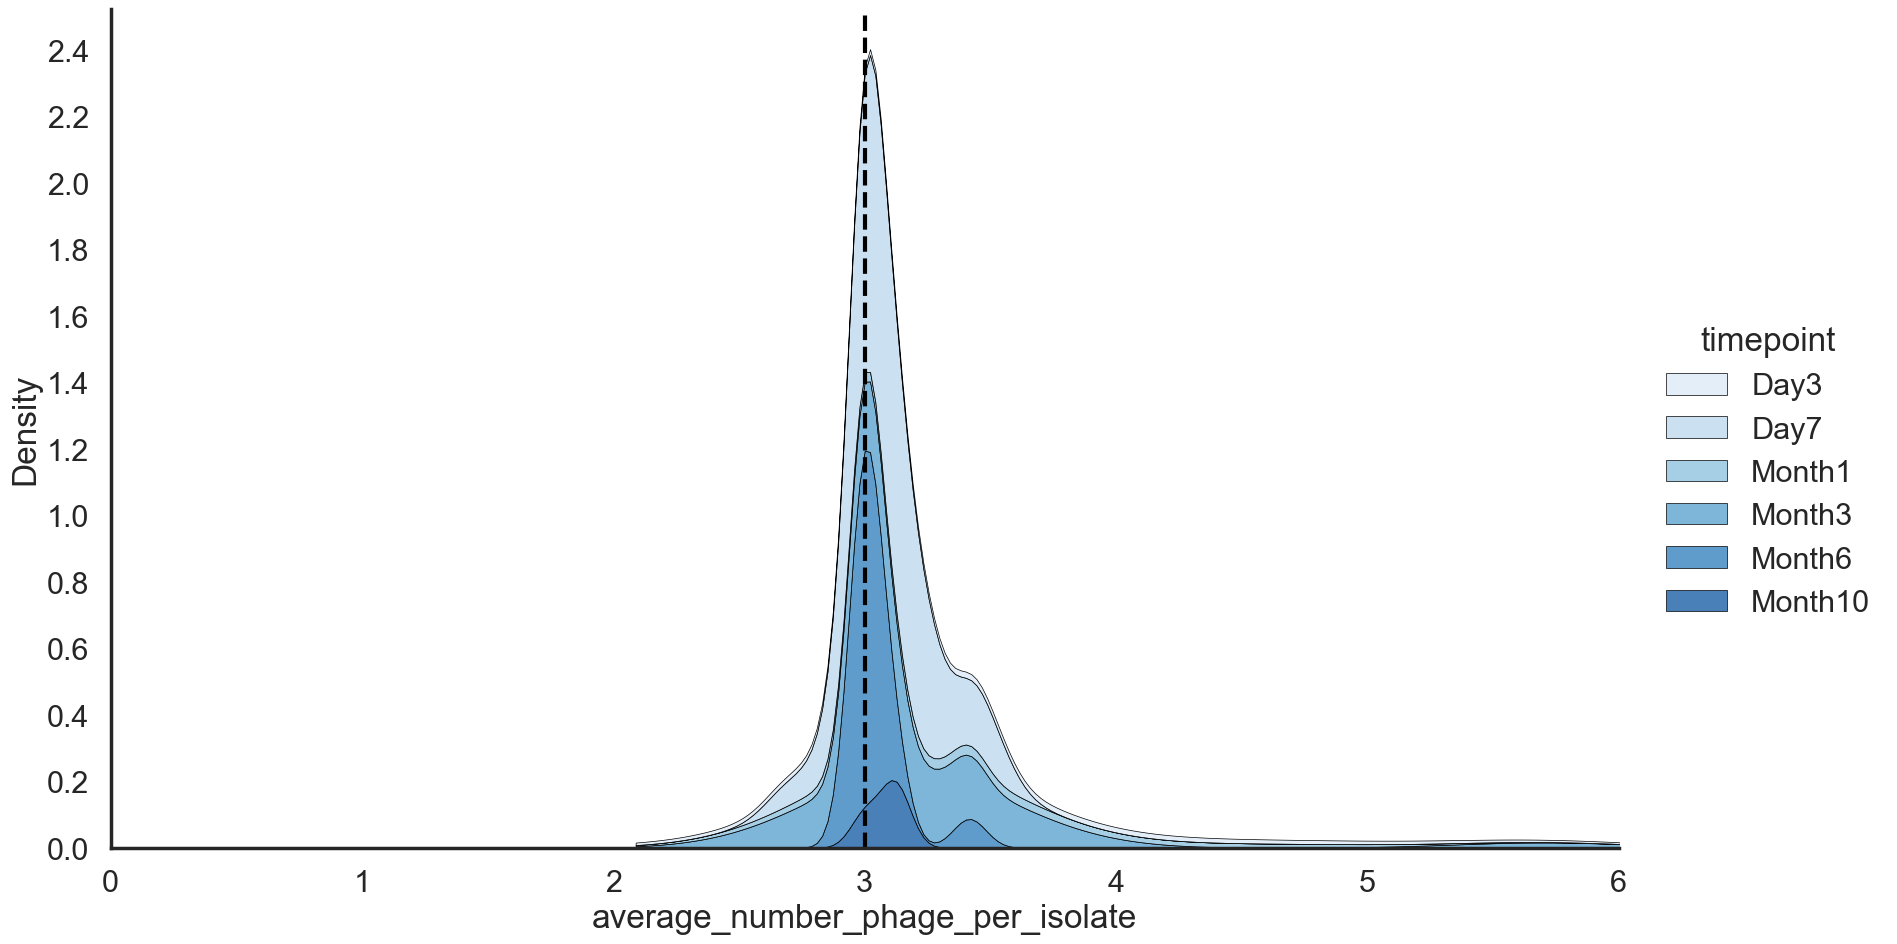

In [32]:
sns.set_style('white')
sns.set_context('poster')
sns.displot(data=Nissle_summary3, x="average_number_phage_per_isolate", hue="timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='Blues',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.5)
plt.axvline(3, c="k", ls='--') #number in reference
plt.xlim(0,6)
plt.yticks(np.arange(0, 2.5, 0.2))
plt.xticks(np.arange(0, 7, 1))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_avg_phage_number_density_allTP.svg', dpi=150, bbox_inches='tight')

In [34]:
Nissle_counts = pd.merge(Nissle_summary, assembly_list, how='outer', 
                         left_on=['mouse', 'timepoint', 'isolate'],
                         right_on=['mouse', 'collection_timepoint', 'isolate'])
Nissle_counts.drop(columns=['sample', 'isolate', 'cage_id', 'timepoint',
                            'sample_number_x', 'sample_number_y'], inplace=True)
Nissle_counts['counts'] = Nissle_counts['counts'].fillna(0)
Nissle_counts.rename(columns={'collection_timepoint':'timepoint'}, inplace=True)
Nissle_counts

counts mouse    sample_id           sample-id timepoint
0        3.0   23B  23B_Day7_11     23B_Day7_11_S38      Day7
1        3.0   23B  23B_Day7_12    23B_Day7_12_S384      Day7
2        4.0   23B  23B_Day7_13   23B_Day7_13_S1294      Day7
3        3.0   23B  23B_Day7_14   23B_Day7_14_S1295      Day7
4        3.0   23B  23B_Day7_16   23B_Day7_16_S1297      Day7
...      ...   ...          ...                 ...       ...
1266     0.0   25L          NaN   25L_Day7_22_S1088      Day7
1267     0.0   26B          NaN  26B_Month3_23_S295    Month3
1268     0.0   26N          NaN   26N_Day7_14_S1104      Day7
1269     0.0   27N          NaN     27N_Day7_10_S99      Day7
1270     0.0   28N          NaN   28N_Month1_4_S125    Month1

[1271 rows x 5 columns]

In [50]:
Nissle_counts.counts.value_counts()

3.0     1103
4.0      102
5.0       28
2.0        9
6.0        7
0.0        6
9.0        5
17.0       4
1.0        2
7.0        2
12.0       1
11.0       1
8.0        1
Name: counts, dtype: int64

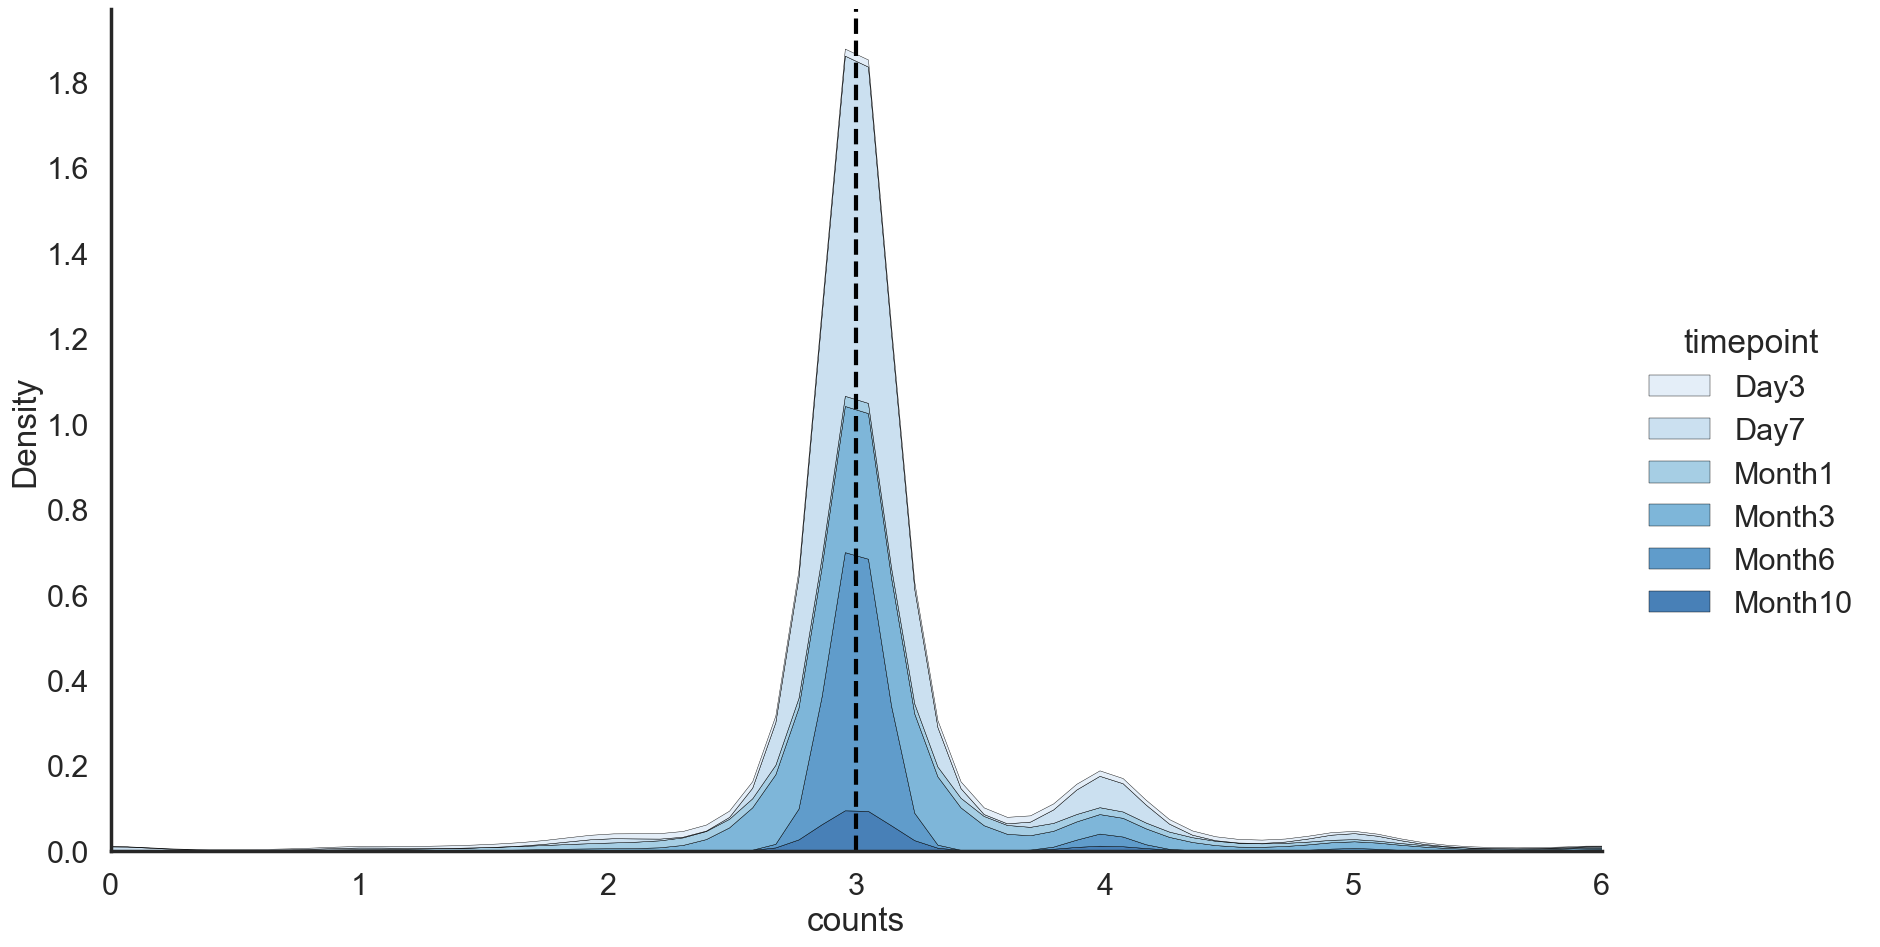

In [55]:
sns.set_context('poster')
sns.displot(data=Nissle_counts, x="counts", hue="timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='Blues',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.3)
plt.axvline(3, c="k", ls='--') #number in reference
plt.yticks(np.arange(0, 2.0, 0.2))
plt.xticks(np.arange(0, 10, 1))
plt.xlim(0,6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_phage_number_density_allTP.svg', dpi=150, bbox_inches='tight')

In [35]:
Nissle_summary_long = Nissle_counts[Nissle_counts['mouse'].isin(['23LL', '25N', '28L', '28N'])]
Nissle_summary_short = Nissle_counts[Nissle_counts['timepoint'].isin(['Day7', 'Month3', 'Month6'])]

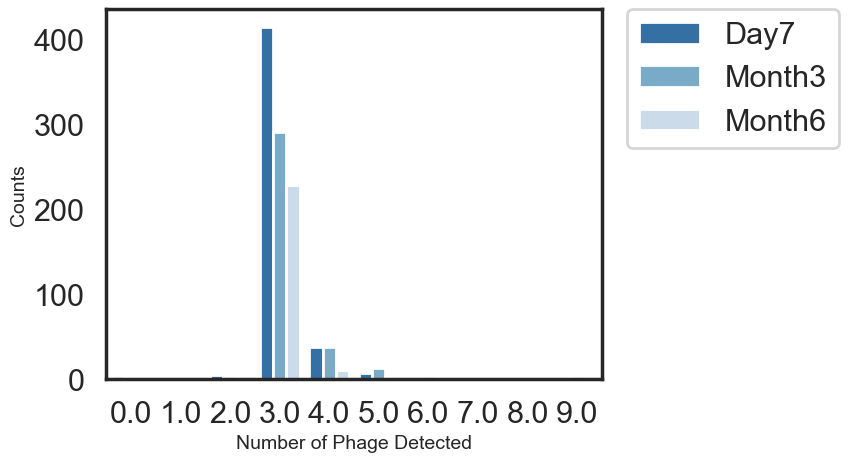

In [36]:
sns.countplot(x="counts", hue='timepoint', palette='Blues_r', data=Nissle_summary_short)
plt.xlabel('Number of Phage Detected', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_phage_counts_bar_mainTP.svg', dpi=150, bbox_inches='tight')

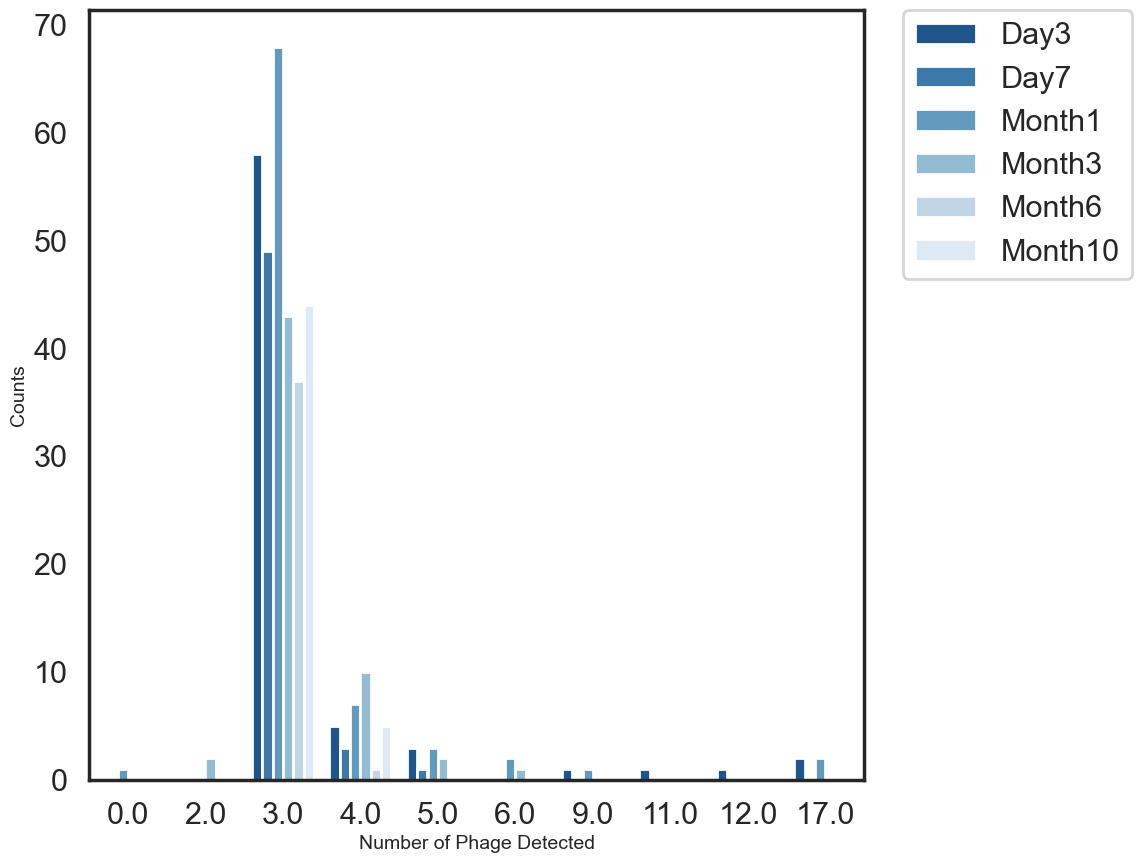

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(x="counts", hue='timepoint', palette='Blues_r', data=Nissle_summary_long,
              hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Number of Phage Detected', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/phage_bar_miceallTP.svg', dpi=150, bbox_inches='tight')

<Figure size 1000x1000 with 0 Axes>

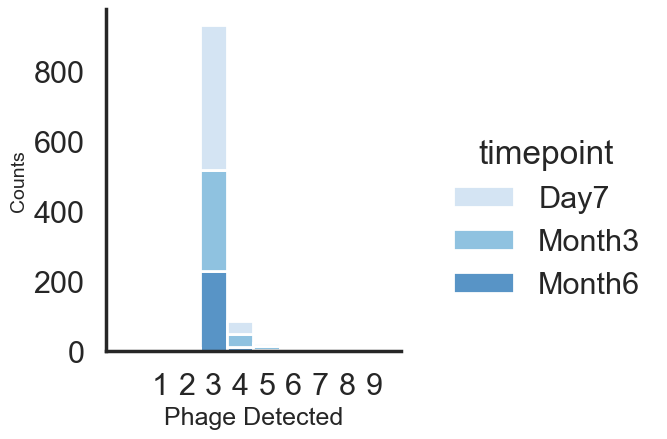

In [40]:
plt.figure(figsize=(10,10))
sns.displot(x="counts", hue='timepoint', palette='Blues', data=Nissle_summary_short,
              hue_order=['Day7','Month3', 'Month6'], multiple='stack', discrete=True)
plt.xlabel('Phage Detected', fontsize=18)
plt.ylabel('Counts', fontsize=14)
plt.xticks(np.array([1,2,3,4,5,6,7,8,9]))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_phage_bar_miceallTP.svg', dpi=150, bbox_inches='tight')

In [42]:
Nissle_summary_short.counts.value_counts()

3.0    932
4.0     85
5.0     22
2.0      9
6.0      5
0.0      5
9.0      3
1.0      2
7.0      2
8.0      1
Name: counts, dtype: int64

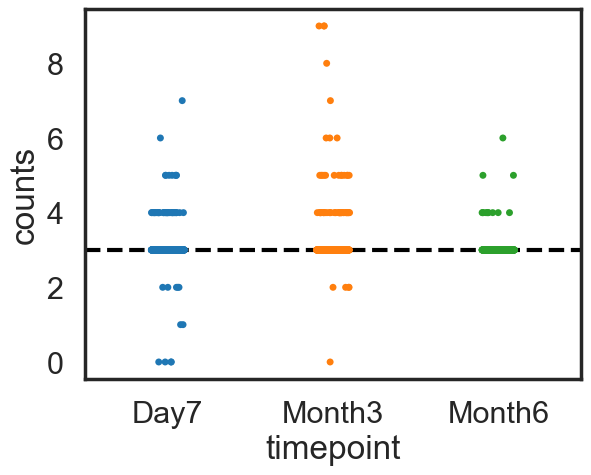

In [43]:
sns.stripplot(x='timepoint', y='counts', data=Nissle_summary_short)
plt.axhline(3, color='k', linestyle='--')

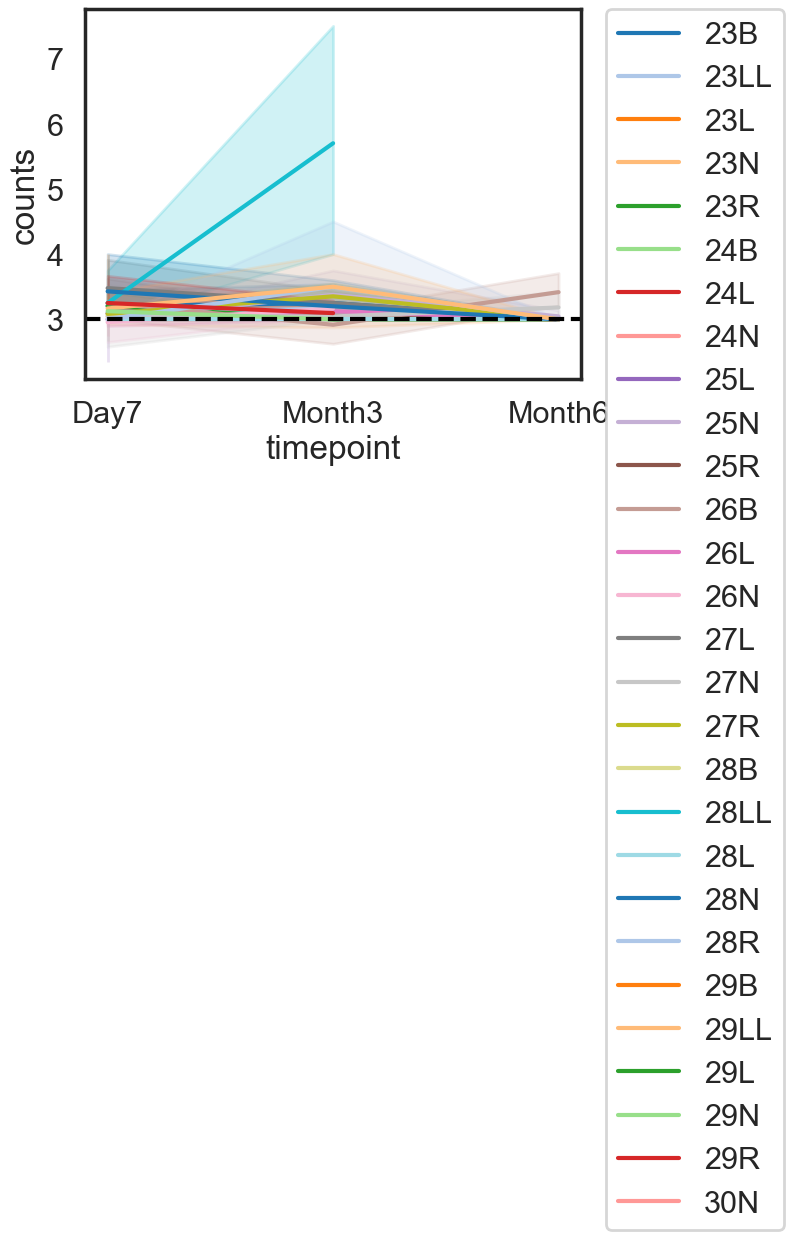

In [44]:
sns.lineplot(x='timepoint', y='counts', hue='mouse', palette='tab20', data=Nissle_summary_short)
plt.axhline(3, color='k', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [45]:
Nissle_counts['cage_id'] = Nissle_counts['mouse'].str[:2]
Nissle_counts

counts mouse    sample_id           sample-id timepoint cage_id
0        3.0   23B  23B_Day7_11     23B_Day7_11_S38      Day7      23
1        3.0   23B  23B_Day7_12    23B_Day7_12_S384      Day7      23
2        4.0   23B  23B_Day7_13   23B_Day7_13_S1294      Day7      23
3        3.0   23B  23B_Day7_14   23B_Day7_14_S1295      Day7      23
4        3.0   23B  23B_Day7_16   23B_Day7_16_S1297      Day7      23
...      ...   ...          ...                 ...       ...     ...
1266     0.0   25L          NaN   25L_Day7_22_S1088      Day7      25
1267     0.0   26B          NaN  26B_Month3_23_S295    Month3      26
1268     0.0   26N          NaN   26N_Day7_14_S1104      Day7      26
1269     0.0   27N          NaN     27N_Day7_10_S99      Day7      27
1270     0.0   28N          NaN   28N_Month1_4_S125    Month1      28

[1271 rows x 6 columns]

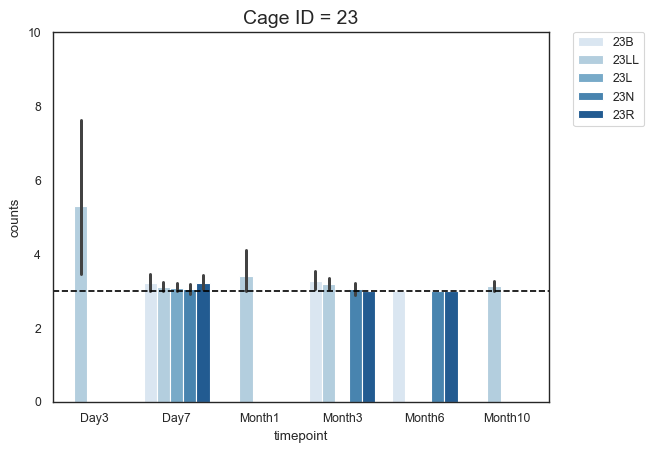

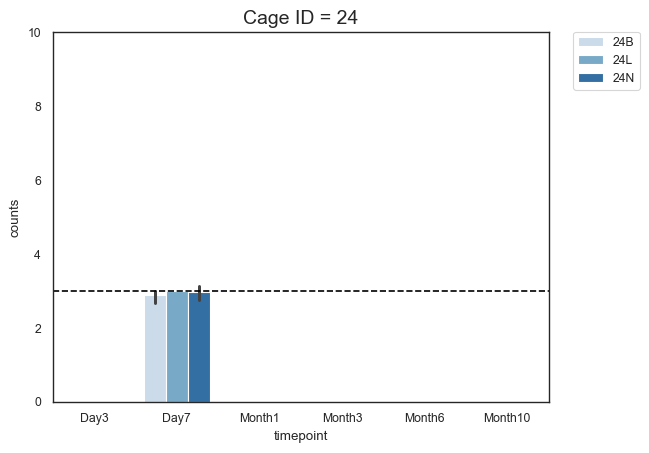

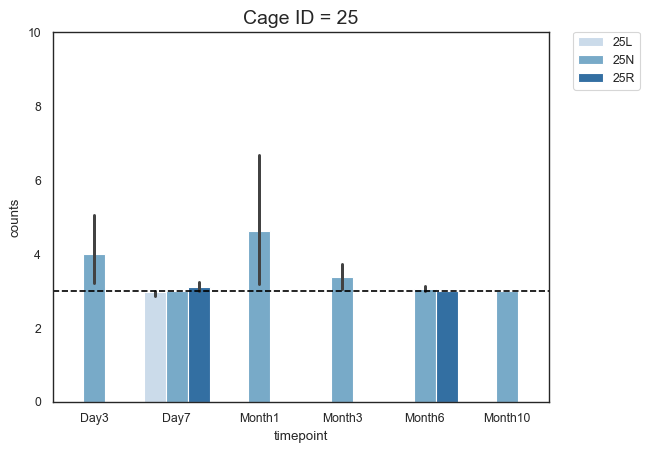

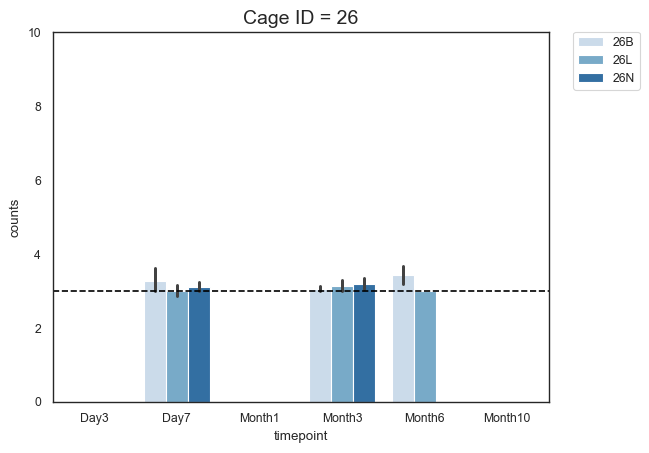

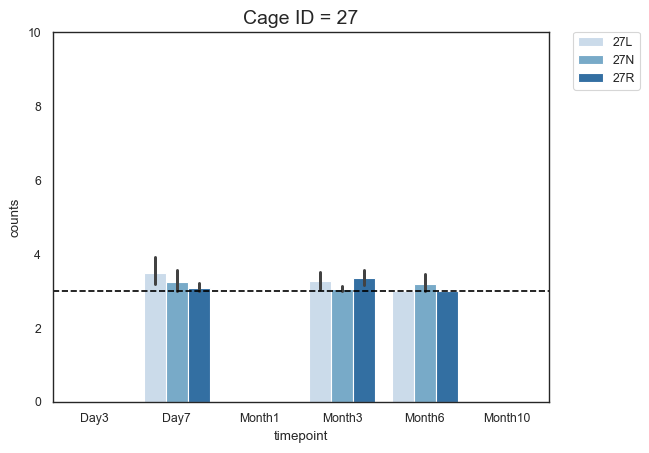

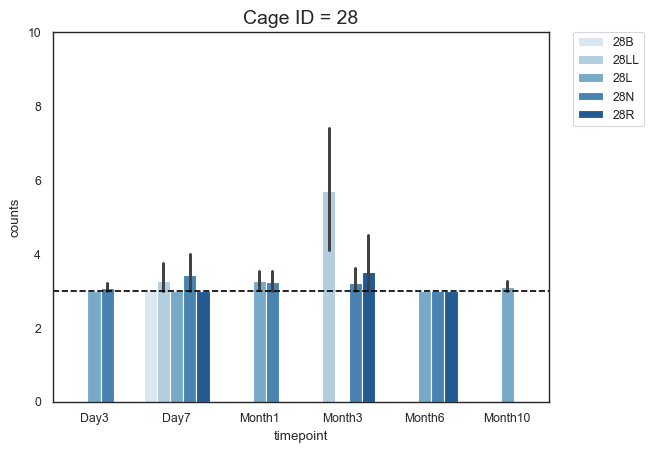

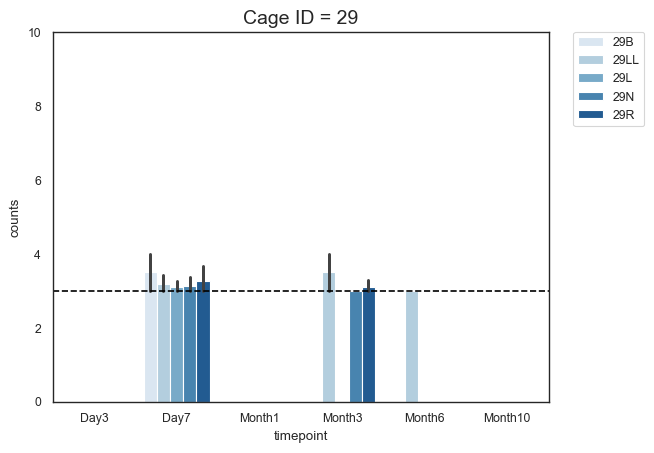

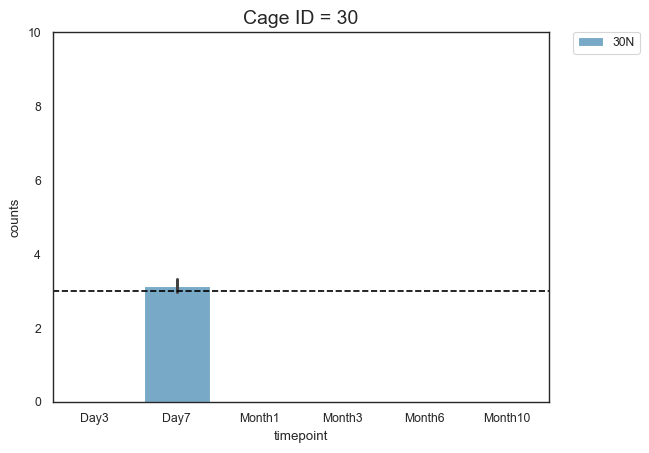

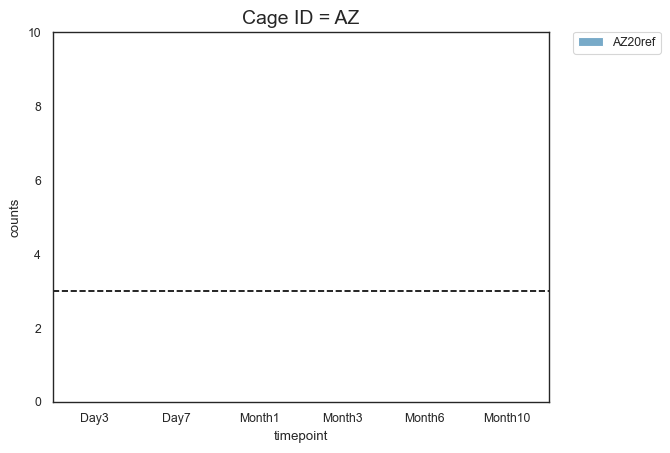

In [46]:
sns.set_context('paper')
for mus in Nissle_counts.cage_id.unique():
    g = sns.barplot(x="timepoint", y="counts", hue="mouse", palette='Blues',
                    order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
                         data=Nissle_summary[Nissle_summary['cage_id'] == mus])
    plt.title("Cage ID = %s" % mus, fontsize=14)
    plt.ylim(0, 10)
    plt.axhline(3, color='k', linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('figures/AZ20_phage_bar_cage%s.svg' % mus, dpi=150, bbox_inches='tight')
    plt.show()

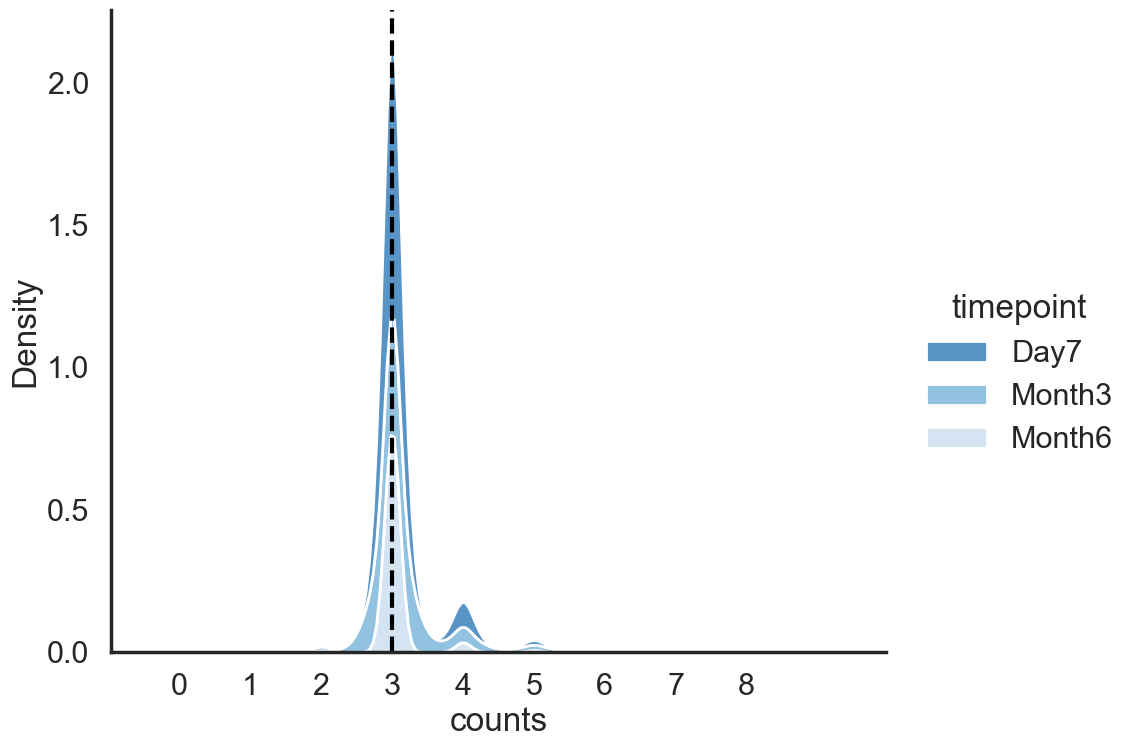

In [47]:
sns.set_style('white')
sns.set_context('poster')
sns.displot(data=Nissle_summary_short, x="counts", hue="timepoint", 
            hue_order=['Day7', 'Month3', 'Month6'], palette='Blues_r',
            multiple="stack", kind='kde', height=8, aspect=1.2)
plt.axvline(3, c="k", ls='--') #number in reference
plt.xticks(np.arange(0, 9, 1))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_phage_number_density_mainTP.svg', dpi=150, bbox_inches='tight')
#mostly 3 phage - sometimes 4, rarely more or less.

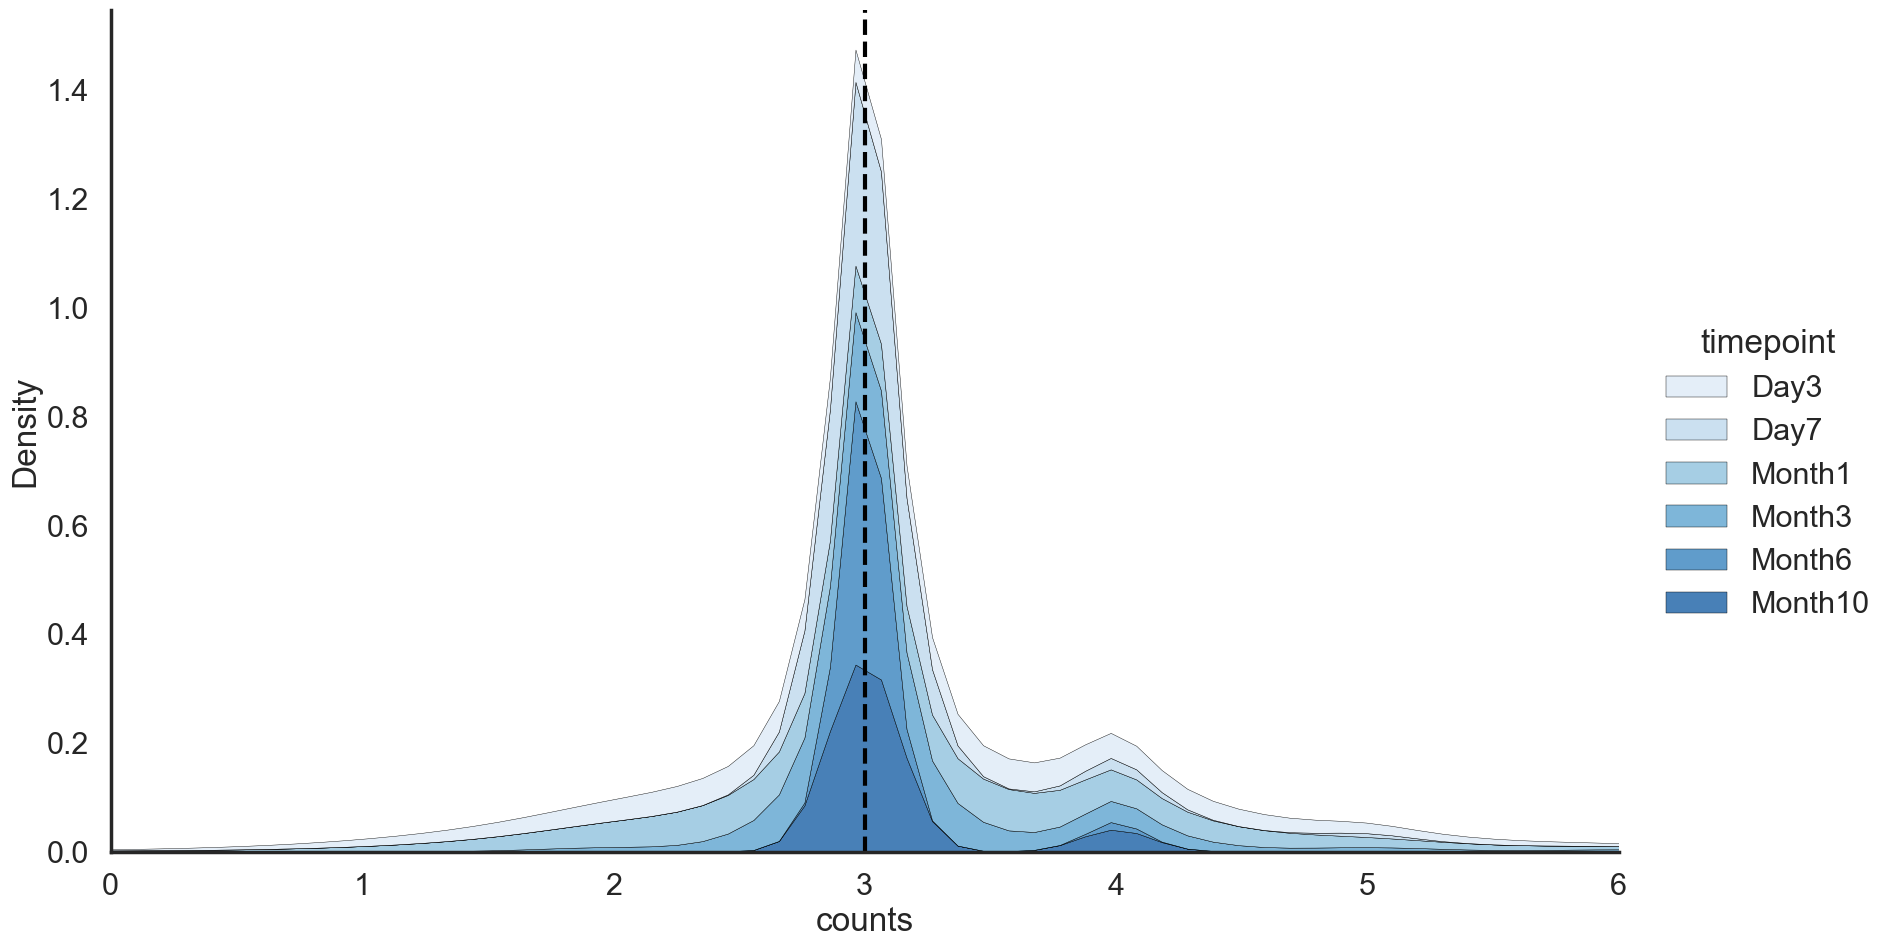

In [53]:
sns.set_context('poster')
sns.displot(data=Nissle_summary_long, x="counts", hue="timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='Blues',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.3)
plt.axvline(3, c="k", ls='--') #number in reference
plt.yticks(np.arange(0, 1.6, 0.2))
plt.xticks(np.arange(0, 10, 1))
plt.xlim(0,6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_phage_number_density_allTPfew.svg', dpi=150, bbox_inches='tight')

In [49]:
Nissle_summary_long.counts.value_counts()

3.0     299
4.0      31
5.0       9
17.0      4
6.0       3
9.0       2
2.0       2
12.0      1
11.0      1
0.0       1
Name: counts, dtype: int64

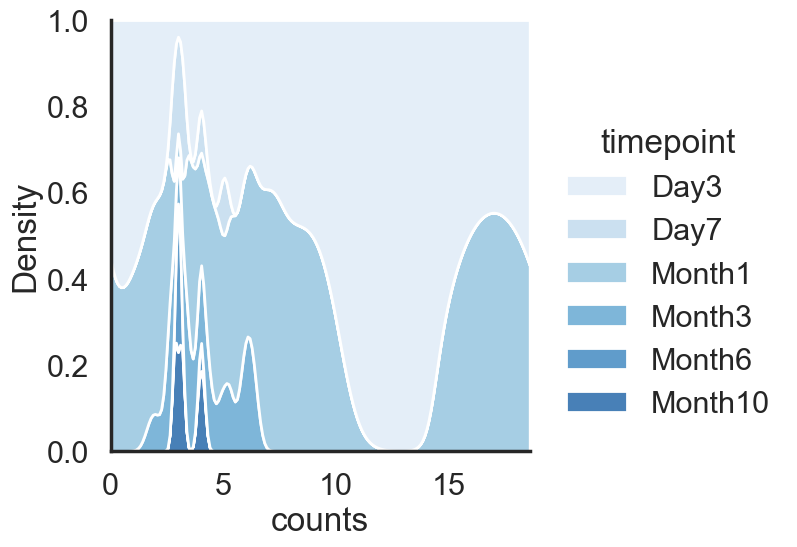

In [85]:
sns.displot(
    data=Nissle_summary_long,
    x="counts", hue="timepoint",
    kind="kde", height=6, warn_singular=False, hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
    multiple="fill", clip=(0, None),
    palette="Blues")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_phage_fun.svg', dpi=150, bbox_inches='tight')

In [86]:
Nissle_counts['isolate'] = Nissle_counts['sample-id'].str.split('_').str[2]
Nissle_counts

counts mouse    sample_id           sample-id timepoint cage_id isolate
0        3.0   23B  23B_Day7_11     23B_Day7_11_S38      Day7      23      11
1        3.0   23B  23B_Day7_12    23B_Day7_12_S384      Day7      23      12
2        4.0   23B  23B_Day7_13   23B_Day7_13_S1294      Day7      23      13
3        3.0   23B  23B_Day7_14   23B_Day7_14_S1295      Day7      23      14
4        3.0   23B  23B_Day7_16   23B_Day7_16_S1297      Day7      23      16
...      ...   ...          ...                 ...       ...     ...     ...
1266     0.0   25L          NaN   25L_Day7_22_S1088      Day7      25      22
1267     0.0   26B          NaN  26B_Month3_23_S295    Month3      26      23
1268     0.0   26N          NaN   26N_Day7_14_S1104      Day7      26      14
1269     0.0   27N          NaN     27N_Day7_10_S99      Day7      27      10
1270     0.0   28N          NaN   28N_Month1_4_S125    Month1      28       4

[1271 rows x 7 columns]

In [87]:
AZ20_phagecounts2 = Nissle_counts[["timepoint", 'counts']].copy()
AZ20_phagecount_tp = AZ20_phagecounts2.groupby(by=["timepoint"]).sum()

AZ20_phagecounts3 = Nissle_counts[["timepoint", 'isolate']].copy()
AZ20_phagecount_iso= AZ20_phagecounts3.groupby(by=["timepoint"]).count()

AZ20_phage_summary = pd.concat([AZ20_phagecount_tp, AZ20_phagecount_iso], axis=1)
AZ20_phage_summary['average_phage_per_isolate'] =AZ20_phage_summary['counts']/AZ20_phage_summary['isolate']
AZ20_phage_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

counts  isolate  average_phage_per_isolate
timepoint                                            
Day3        275.0       71                   3.873239
Day7       1450.0      471                   3.078556
Month1      302.0       84                   3.595238
Month3     1155.0      354                   3.262712
Month6      740.0      241                   3.070539
Month10     152.0       49                   3.102041

In [88]:
extra_tp_mice = ['23LL', '25N', '28L', '28N']
etp_mice_phages = Nissle_counts[Nissle_counts.mouse.isin(extra_tp_mice)]

etp_mice_phagec = etp_mice_phages[["timepoint", 'isolate']].copy()
etp_mice_phage_isocounts = etp_mice_phagec.groupby(by=["timepoint"]).count()

etp_mice_phagecn = etp_mice_phages[["timepoint", 'counts']].copy()
etp_mice_phage_pcounts = etp_mice_phagecn.groupby(by=["timepoint"]).sum()

AZ20_etp_summary = pd.concat([etp_mice_phage_pcounts, etp_mice_phage_isocounts], axis=1)
AZ20_etp_summary['average_phages_per_isolate'] =AZ20_etp_summary['counts']/AZ20_etp_summary['isolate']
AZ20_etp_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

counts  isolate  average_phages_per_isolate
timepoint                                             
Day3        275.0       71                    3.873239
Day7        164.0       53                    3.094340
Month1      302.0       84                    3.595238
Month3      189.0       58                    3.258621
Month6      115.0       38                    3.026316
Month10     152.0       49                    3.102041

In [89]:
Nissle_overview.columns

Index(['segment', 'index_num', 'VIRSorter category', 'Circular', 'Prophage',
       'Gene count', 'Strand switches', 'potential AMG count',
       'Transposase present', 'Possible Non-Viral Contig',
       'Viral genes with host benefits', 'Viral genes with unknown function',
       'Viral structure genes', 'Viral hypothetical genes',
       'Viral genes with viral benefits', 'Viral replication genes',
       'identification', 'sample'],
      dtype='object')

In [90]:
Nissle_types = Nissle_overview[['Viral genes with host benefits', 'Viral genes with unknown function',
       'Viral structure genes', 'Viral hypothetical genes',
       'Viral genes with viral benefits', 'Viral replication genes', 'Gene count', 'sample']].copy()
Nissle_types_sum = Nissle_types.groupby(by=['sample']).sum().reset_index()
Nissle_types_sum[['mouse', 'timepoint', 'isolate', 'sample_number']] = Nissle_types_sum["sample"].str.split("_", n=3, expand=True)
Nissle_types_sum["cage_id"] = Nissle_types_sum['mouse'].str[:2]
Nissle_types_sum.head()

sample  Viral genes with host benefits  \
0    23B_Day7_11_S38                            25.0   
1   23B_Day7_12_S384                            18.0   
2  23B_Day7_13_S1294                            34.0   
3  23B_Day7_14_S1295                            10.0   
4  23B_Day7_16_S1297                            39.0   

   Viral genes with unknown function  Viral structure genes  \
0                               33.0                    2.0   
1                               34.0                    2.0   
2                               48.0                    4.0   
3                               34.0                   18.0   
4                               34.0                    6.0   

   Viral hypothetical genes  Viral genes with viral benefits  \
0                      34.0                              2.0   
1                      37.0                             19.0   
2                      47.0                             27.0   
3                      36.0                             19.0   
4                      36.0                              2.0   

   Viral replication genes  Gene count mouse timepoint isolate sample_number  \
0                     24.0         120   23B      Day7      11           S38   
1                     14.0         124   23B      Day7      12          S384   
2                      6.0         166   23B      Day7      13         S1294   
3                      5.0         122   23B      Day7      14         S1295   
4                      5.0         122   23B      Day7      16         S1297   

  cage_id  
0      23  
1      23  
2      23  
3      23  
4      23

In [91]:
relevent_col = ['Viral genes with host benefits', 'Viral genes with unknown function',
       'Viral structure genes', 'Viral hypothetical genes',
       'Viral genes with viral benefits', 'Viral replication genes',
       'Gene count']

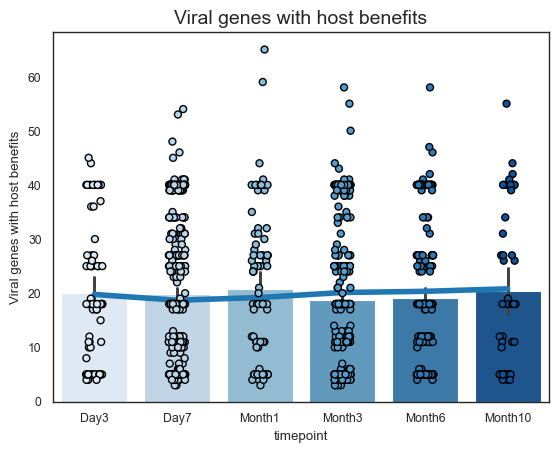

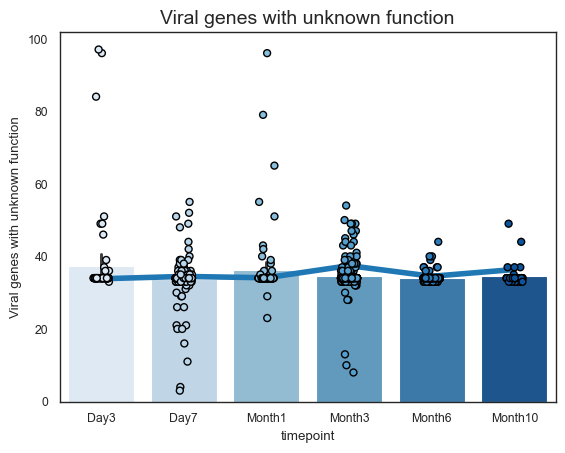

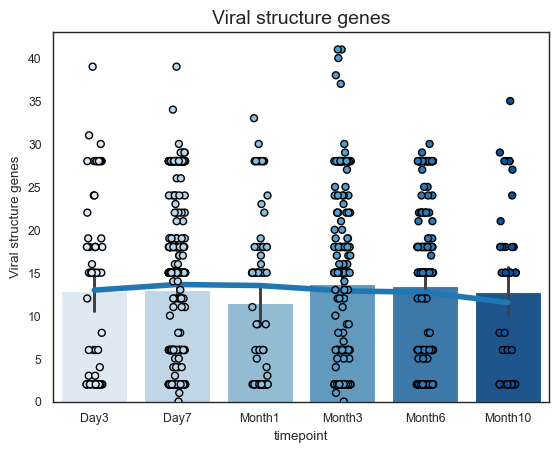

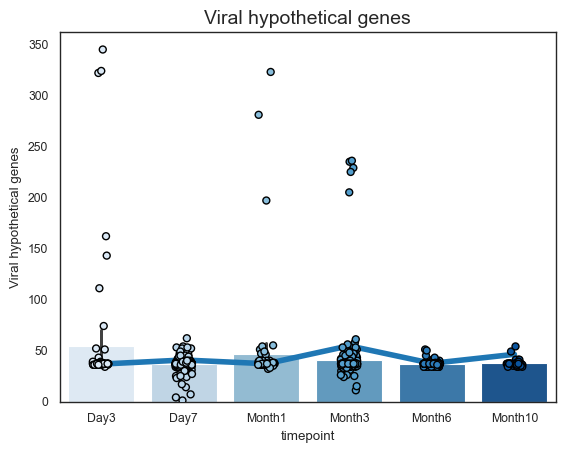

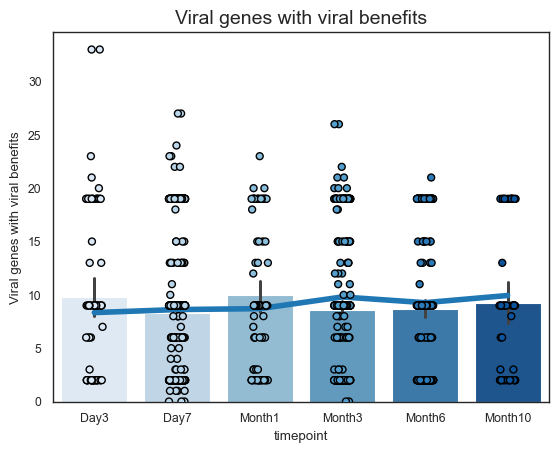

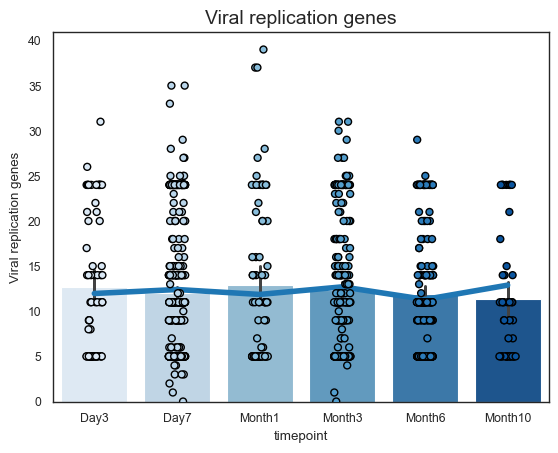

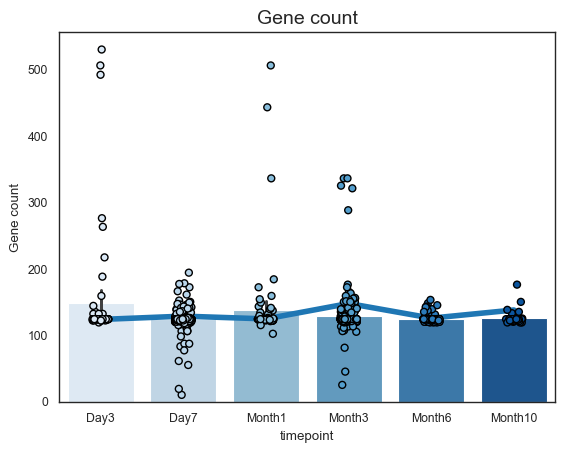

In [92]:
sns.set_context('paper')
for col in relevent_col:
    g= sns.barplot(data=Nissle_types_sum, x='timepoint', y=col, palette='Blues',
               order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
    g= sns.lineplot(data=Nissle_types_sum, x='timepoint', y=col, ci=None, linewidth=4)
    g= sns.stripplot(data=Nissle_types_sum, x='timepoint', y=col, edgecolor='k', linewidth=1, palette='Blues',
                 order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
    plt.title(col, fontsize=14)
    plt.show()

In [93]:
Nissle_types_sum['percent_host_benefit'] = Nissle_types_sum['Viral genes with host benefits']/Nissle_types_sum['Gene count']
Nissle_types_sum['percent_viral_benefit'] = Nissle_types_sum['Viral genes with viral benefits']/Nissle_types_sum['Gene count']
Nissle_types_sum['percent_unknown'] = (Nissle_types_sum['Viral genes with unknown function']+Nissle_types_sum['Viral hypothetical genes'])/Nissle_types_sum['Gene count']
Nissle_types_sum['percent_viral_structure'] = Nissle_types_sum['Viral structure genes']/Nissle_types_sum['Gene count']
Nissle_types_sum['percent_viral_replication'] = Nissle_types_sum['Viral replication genes']/Nissle_types_sum['Gene count']
Nissle_types_sum['percent_viral'] = (Nissle_types_sum['Viral genes with viral benefits']+Nissle_types_sum['Viral structure genes']+Nissle_types_sum['Viral replication genes'])/Nissle_types_sum['Gene count']

In [94]:
Nissle_types_sum.columns

Index(['sample', 'Viral genes with host benefits',
       'Viral genes with unknown function', 'Viral structure genes',
       'Viral hypothetical genes', 'Viral genes with viral benefits',
       'Viral replication genes', 'Gene count', 'mouse', 'timepoint',
       'isolate', 'sample_number', 'cage_id', 'percent_host_benefit',
       'percent_viral_benefit', 'percent_unknown', 'percent_viral_structure',
       'percent_viral_replication', 'percent_viral'],
      dtype='object')

In [95]:
Nissle_prop = pd.melt(Nissle_types_sum, id_vars=['mouse', 'timepoint', 'isolate', 'cage_id',], 
                      value_vars=['percent_host_benefit', 'percent_viral_benefit', 'percent_unknown', 
                                  'percent_viral_structure', 'percent_viral_replication'])
Nissle_prop.head()

mouse timepoint isolate cage_id              variable     value
0   23B      Day7      11      23  percent_host_benefit  0.208333
1   23B      Day7      12      23  percent_host_benefit  0.145161
2   23B      Day7      13      23  percent_host_benefit  0.204819
3   23B      Day7      14      23  percent_host_benefit  0.081967
4   23B      Day7      16      23  percent_host_benefit  0.319672

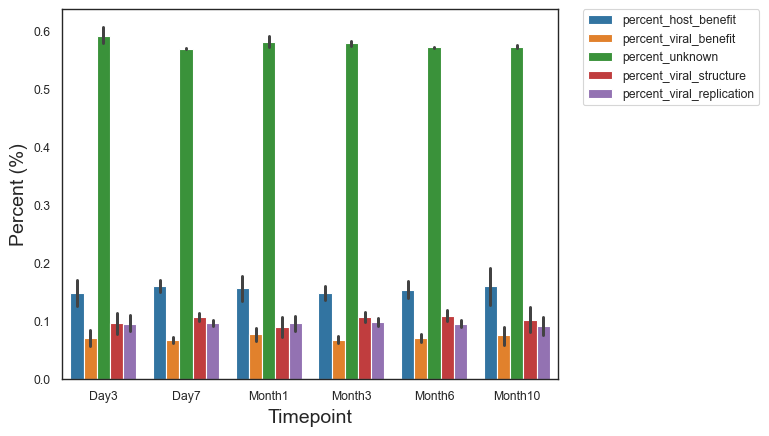

In [96]:
sns.barplot(data=Nissle_prop, x='timepoint', order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
           y='value', hue='variable')
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../../figures/phage_bar_miceallTP.svg' % mus, dpi=150, bbox_inches='tight')

In [97]:
Nissle_pie = Nissle_prop[['timepoint', 'variable', 'value']].copy()
Nissle_pie2 = Nissle_pie.groupby(by=['timepoint', 'variable']).mean()
Nissle_pie3 = Nissle_pie2.reset_index()
Nissle_pie3.head()

timepoint                   variable     value
0      Day3       percent_host_benefit  0.147480
1      Day3            percent_unknown  0.591654
2      Day3      percent_viral_benefit  0.070014
3      Day3  percent_viral_replication  0.095115
4      Day3    percent_viral_structure  0.095737

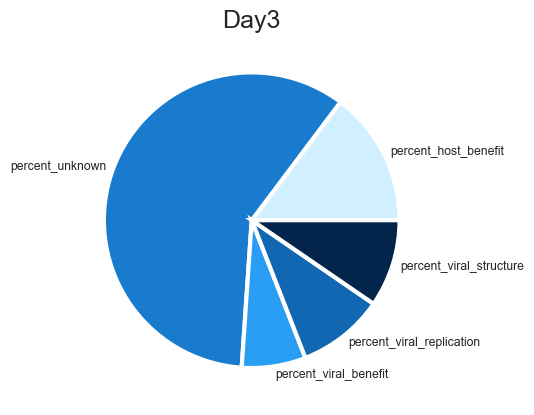

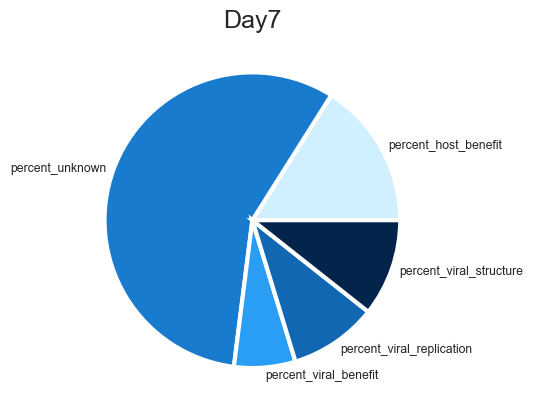

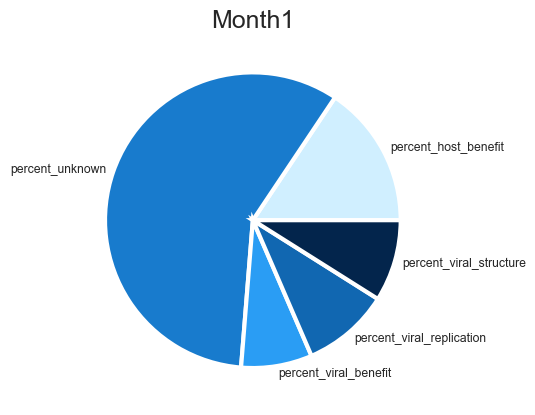

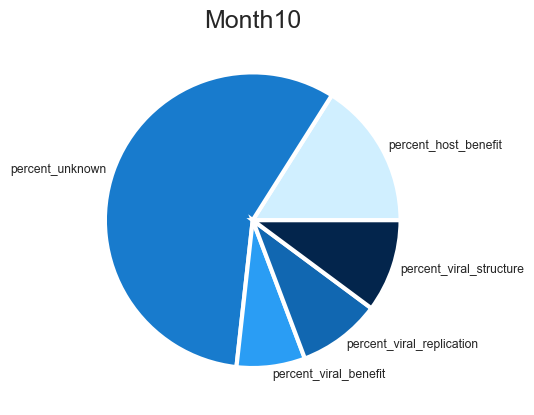

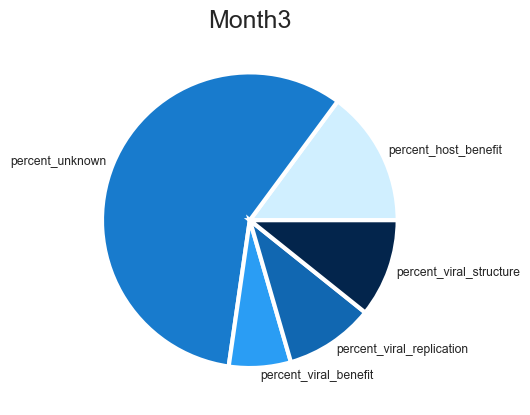

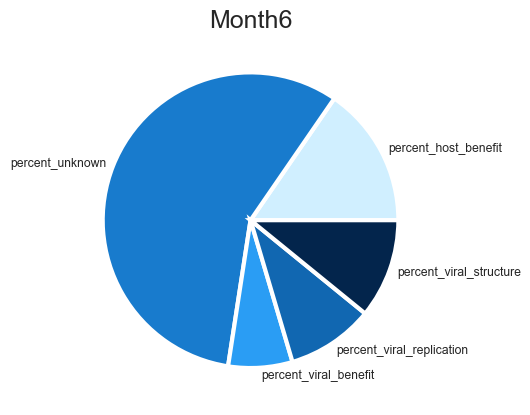

In [98]:
for tp in list(Nissle_pie3.timepoint.unique()):
    
    pie_chart = Nissle_pie3[Nissle_pie3.timepoint == tp]
    
    names=list(pie_chart.variable.unique())
    values=list(pie_chart.value.unique())
    
    plt.title("%s" %tp, fontsize=18)
 
    plt.pie(values, labels=names, labeldistance=1.05,
           wedgeprops={'linewidth':3, 'edgecolor':'white'},
           colors=['#d0efff', '#187bcd', '#2a9df4', '#1167b1', '#03254c'])
    
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('figures/AZ20_phage_pie_%s.svg' %tp, dpi=150, bbox_inches='tight')
    plt.show()

In [99]:
mapp = {'Day3':0, 'Day7':1, 'Month1':2, 'Month3':3, 'Month6':4, 'Month10':5}
Nissle_prop['tp'] = Nissle_prop['timepoint'].map(mapp)
Nissle_types_sum['tp'] = Nissle_types_sum['timepoint'].map(mapp)

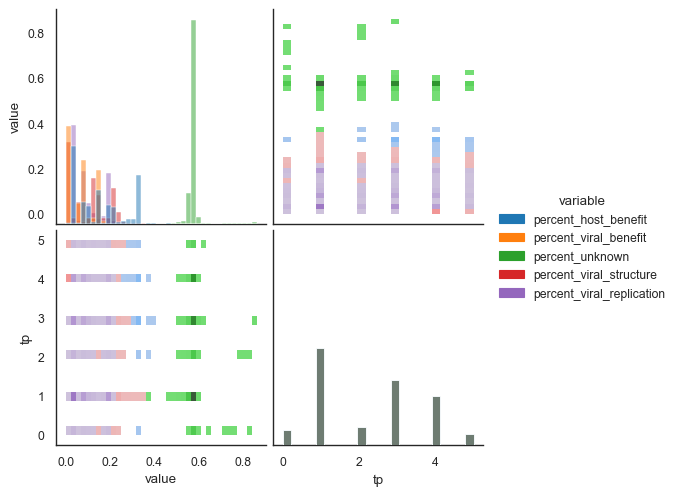

In [100]:
g = sns.pairplot(data=Nissle_prop, hue='variable', kind='hist')
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../../figures/phage_bar_miceallTP.svg' % mus, dpi=150, bbox_inches='tight')

In [101]:
perc_col = ['percent_host_benefit', 'percent_viral_benefit', 'percent_unknown', 
                                  'percent_viral_structure', 'percent_viral_replication']

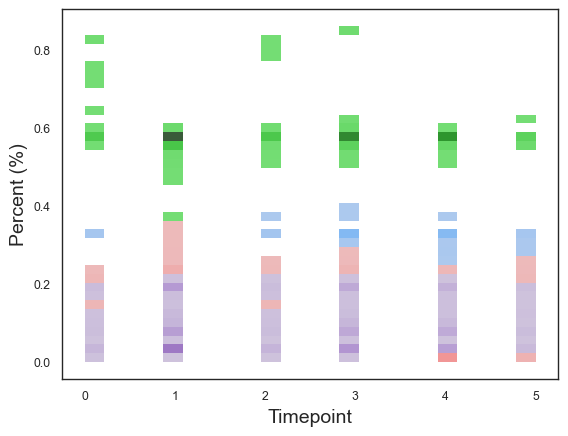

In [102]:
sns.histplot(data=Nissle_prop, y='value', x='tp', hue='variable', legend=False)
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

In [103]:
Nissle_htmp = Nissle_types_sum[['percent_host_benefit', 'percent_viral', 'percent_unknown', 
                                  'mouse','timepoint']].copy()

In [104]:
Nissle_htmp['timepoint'] = pd.Categorical(Nissle_htmp['timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [105]:
Nissle_htmp.sort_values(by=['mouse', 'timepoint']).set_index(['mouse', 'timepoint'])

percent_host_benefit  percent_viral  percent_unknown
mouse   timepoint                                                      
23B     Day7                   0.208333       0.233333         0.558333
        Day7                   0.145161       0.282258         0.572581
        Day7                   0.204819       0.222892         0.572289
        Day7                   0.081967       0.344262         0.573770
        Day7                   0.319672       0.106557         0.573770
...                                 ...            ...              ...
30N     Day7                   0.090164       0.336066         0.573770
        Day7                   0.032258       0.387097         0.580645
        Day7                   0.094340       0.349057         0.556604
        Day7                   0.078571       0.385714         0.535714
AZ20ref nan                    0.145161       0.282258         0.572581

[1216 rows x 3 columns]

In [106]:
sns.clustermap(data=Nissle_htmp.sort_values(by=['mouse', 'timepoint']).set_index(['mouse', 'timepoint']), 
              cmap='YlGnBu', yticklabels=1, figsize=(50, 150))
#plt.savefig('figures/AZ20_phage_clustermap.jpg', dpi=150)

In [107]:
Nissle_htmp["cage_id"]= Nissle_htmp['mouse'].str[:2]

In [108]:
Nissle_htmp.groupby(by=['cage_id', 'timepoint']).median().dropna(axis=0)

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_11769/2373677771.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nissle_htmp.groupby(by=['cage_id', 'timepoint']).median().dropna(axis=0)


percent_host_benefit  percent_viral  percent_unknown
cage_id timepoint                                                      
23      Day3                   0.088710       0.304092         0.572581
        Day7                   0.163636       0.247934         0.572581
        Month1                 0.143447       0.254731         0.572581
        Month3                 0.096774       0.324582         0.572581
        Month6                 0.145161       0.282258         0.572581
        Month10                0.215428       0.211396         0.572581
24      Day7                   0.185484       0.245283         0.572581
25      Day3                   0.102615       0.263469         0.572581
        Day7                   0.145161       0.289256         0.572581
        Month1                 0.146727       0.213115         0.572581
        Month3                 0.110000       0.298272         0.572581
        Month6                 0.096774       0.330645         0.572581
        Month10                0.064516       0.362903         0.572581
26      Day7                   0.145161       0.282258         0.572581
        Month3                 0.142857       0.284553         0.572581
        Month6                 0.042559       0.380041         0.572581
27      Day7                   0.096774       0.338710         0.572581
        Month3                 0.145161       0.282258         0.572581
        Month6                 0.145161       0.282258         0.572581
28      Day3                   0.145161       0.282258         0.572581
        Day7                   0.096774       0.334677         0.572581
        Month1                 0.139344       0.286885         0.572581
        Month3                 0.043235       0.330645         0.572581
        Month6                 0.096774       0.330645         0.572581
        Month10                0.145161       0.289256         0.572581
29      Day7                   0.145161       0.282258         0.572581
        Month3                 0.145161       0.282258         0.572581
        Month6                 0.321126       0.105698         0.572581
30      Day7                   0.067797       0.375000         0.572581

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_11769/181791636.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.clustermap(data=Nissle_htmp.groupby(by=['timepoint', 'cage_id']).median().dropna(axis=0),


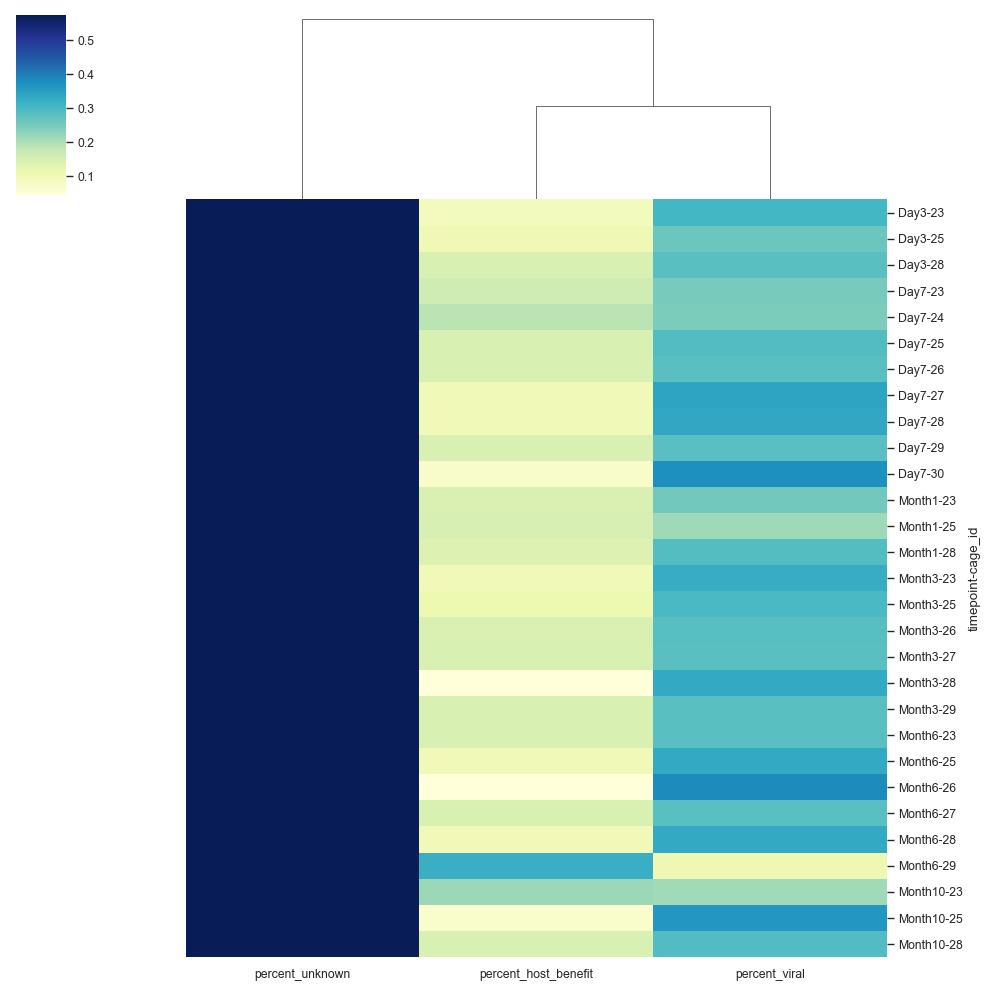

In [109]:
sns.clustermap(data=Nissle_htmp.groupby(by=['timepoint', 'cage_id']).median().dropna(axis=0), 
               row_cluster=False, 
              cmap='YlGnBu')

In [110]:
Nissle_htmp2 = Nissle_types_sum[['percent_host_benefit', 'percent_viral', 'percent_unknown', 
                                  'timepoint']].copy()

In [111]:
Nissle_htmp2['timepoint'] = pd.Categorical(Nissle_htmp2['timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [112]:
Nissle_htmp2.groupby(by=['timepoint']).median().dropna(axis=0)

percent_host_benefit  percent_viral  percent_unknown
timepoint                                                      
Day3                   0.145161       0.282258         0.572581
Day7                   0.145161       0.286885         0.572581
Month1                 0.145161       0.282258         0.572581
Month3                 0.138211       0.284553         0.572581
Month6                 0.145161       0.282258         0.572581
Month10                0.145161       0.289256         0.572581

## Gene Annotations

In [113]:
Nissle_ref = pd.read_csv('./AZ20ref_annotations.tsv', sep='\t')
Nissle_ref.rename(columns={'Unnamed: 0': 'index_num', 'Unnamed: 0.1': 'segment'}, inplace=True)
Nissle_ref_highr = Nissle_ref[Nissle_ref['rank'].isin(['A', 'B', 'C'])].copy()
Nissle_ref_highr.head()

index_num                           fasta  \
1    1__0_partial_1-cat_1_2  final-viral-combined-for-dramv   
10  1__0_partial_1-cat_1_11  final-viral-combined-for-dramv   
11  1__0_partial_1-cat_1_12  final-viral-combined-for-dramv   
18  1__0_partial_1-cat_1_19  final-viral-combined-for-dramv   
25  1__0_partial_1-cat_1_26  final-viral-combined-for-dramv   

                scaffold  gene_position  start_position  end_position  \
1   1__0_partial_1-cat_1              2             805          2118   
10  1__0_partial_1-cat_1             11            4852          5391   
11  1__0_partial_1-cat_1             12            5500          6417   
18  1__0_partial_1-cat_1             19           11550         11936   
25  1__0_partial_1-cat_1             26           16398         17450   

    strandedness rank   ko_id  \
1             -1    C  K14059   
10            -1    C  K06952   
11            -1    C  K03554   
18             1    C  K01160   
25             1    C  K07319   

                                             kegg_hit  ... cazy_id cazy_hits  \
1                                           integrase  ...     NaN       NaN   
10                      5'-nucleotidase [EC:3.1.3.89]  ...     NaN       NaN   
11              recombination associated protein RdgC  ...     NaN       NaN   
18  crossover junction endodeoxyribonuclease RusA ...  ...     NaN       NaN   
25  adenine-specific DNA-methyltransferase [EC:2.1...  ...     NaN       NaN   

    vogdb_id                                         vogdb_hits  \
1   VOG00013               sp|P22877|INTR_SACER Integrase; XhXr   
10  VOG01865  sp|P76514|YFDR_ECOLI Uncharacterized protein Y...   
11  VOG00916  sp|A7MT92|RDGC_VIBCB Recombination-associated ...   
18  VOG17652  sp|P0AG74|RUSA_ECOLI Crossover junction endode...   
25  VOG00109  sp|P14243|MTC9_CITFR Modification methylase Cf...   

    vogdb_categories  heme_regulatory_motif_count virsorter_category  \
1              Xr;Xh                            0                  1   
10                Xu                            0                  1   
11                Xr                            0                  2   
18                Xr                            0                  1   
25             Xp;Xh                            0                  1   

   auxiliary_score is_transposon amg_flags  
1                4         False        VF  
10               2         False         F  
11               2         False         V  
18               2         False         V  
25               2         False       NaN  

[5 rows x 34 columns]

In [114]:
Nissle_ref_highr['phage'] = Nissle_ref_highr["viral_hit"].str.split("[").str[1]
Nissle_ref_highr['phage'] = Nissle_ref_highr['phage'].str.rstrip(']')
Nissle_ref_highr['phage'].value_counts()

Escherichia phage 2H10                    3
Escherichia virus Lambda_1H12             3
Phage Gifsy-2                             1
Vibrio phage X29                          1
Flavobacterium phage vB_FspS_stinky9-1    1
Salmonella phage Fels-1                   1
uncultured Caudovirales phage             1
Name: phage, dtype: int64

In [115]:
Nissle_phage = pd.read_csv('./AZ20_dramv_annotations.csv', low_memory=False, index_col=37)
Nissle_phage.head()

Unnamed: 0.1              Unnamed: 0  \
simple_id                                           
23B_Day7_21             0  1__0_partial_1-cat_1_1   
23B_Day7_21             1  1__0_partial_1-cat_1_2   
23B_Day7_21             2  1__0_partial_1-cat_1_3   
23B_Day7_21             3  1__0_partial_1-cat_1_4   
23B_Day7_21             4  1__0_partial_1-cat_1_5   

                                      fasta              scaffold  \
simple_id                                                           
23B_Day7_21  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
23B_Day7_21  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
23B_Day7_21  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
23B_Day7_21  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
23B_Day7_21  final-viral-combined-for-dramv  1__0_partial_1-cat_1   

             gene_position  start_position  end_position  strandedness rank  \
simple_id                                                                     
23B_Day7_21              1             602           991            -1    D   
23B_Day7_21              2            1070          1312             1    D   
23B_Day7_21              3            1730          2173             1    D   
23B_Day7_21              4            2145          2738            -1    D   
23B_Day7_21              5            2738          3670            -1    E   

            ko_id  ...  vogdb_id  \
simple_id          ...             
23B_Day7_21   NaN  ...  VOG02825   
23B_Day7_21   NaN  ...  VOG01479   
23B_Day7_21   NaN  ...  VOG02597   
23B_Day7_21   NaN  ...  VOG00298   
23B_Day7_21   NaN  ...  VOG00487   

                                                    vogdb_hits  \
simple_id                                                        
23B_Day7_21              sp|P0AG11|UMUD_ECOLI Protein UmuD; Xh   
23B_Day7_21     sp|P41063|TUM_BP186 SOS operon TUM protein; Xu   
23B_Day7_21  sp|P03740|TFA_LAMBD Tail fiber assembly protei...   
23B_Day7_21  sp|P03740|TFA_LAMBD Tail fiber assembly protei...   
23B_Day7_21  REFSEQ glycerophosphoryl diesterphosphodiester...   

            vogdb_categories heme_regulatory_motif_count  virsorter_category  \
simple_id                                                                      
23B_Day7_21               Xh                           0                   1   
23B_Day7_21               Xu                           0                   1   
23B_Day7_21               Xs                           0                   2   
23B_Day7_21               Xs                           0                   0   
23B_Day7_21               Xu                           0                   0   

             auxiliary_score  is_transposon amg_flags  \
simple_id                                               
23B_Day7_21                5          False        PF   
23B_Day7_21                2          False         F   
23B_Day7_21                2          False        VF   
23B_Day7_21                2          False        VF   
23B_Day7_21                1          False         F   

                                        identification             sample  
simple_id                                                                  
23B_Day7_21  ./DRAMv/23B_Day7_21_S1302/annotations.tsv  23B_Day7_21_S1302  
23B_Day7_21  ./DRAMv/23B_Day7_21_S1302/annotations.tsv  23B_Day7_21_S1302  
23B_Day7_21  ./DRAMv/23B_Day7_21_S1302/annotations.tsv  23B_Day7_21_S1302  
23B_Day7_21  ./DRAMv/23B_Day7_21_S1302/annotations.tsv  23B_Day7_21_S1302  
23B_Day7_21  ./DRAMv/23B_Day7_21_S1302/annotations.tsv  23B_Day7_21_S1302  

[5 rows x 37 columns]

In [116]:
Nissle_phage.rename(columns={'Unnamed: 0': 'index_num', 'Unnamed: 0.1': 'segment'}, inplace=True)

In [117]:
Nissle_phage.shape

(154966, 37)

In [118]:
Nissle_phage_highr = Nissle_phage[Nissle_phage['rank'].isin(['A', 'B', 'C'])]
Nissle_phage_highr.shape

(19926, 37)

In [119]:
Nissle_phage2 = Nissle_phage_highr[["viral_id", "viral_hit"]].copy()
Nissle_phage2.head()

viral_id                                          viral_hit
simple_id                                                                     
23B_Day7_21  YP_001700566.1  YP_001700566.1 putative Clp protease [Salmonel...
23B_Day7_21  YP_009909760.1  YP_009909760.1 Phage lysin, 1,4-beta-N-acetylm...
23B_Day7_21  YP_009855362.1  YP_009855362.1 DNA methyltransferase [Flavobac...
23B_Day7_21  YP_009909752.1  YP_009909752.1 Holliday junction resolvase / C...
23B_Day7_21  YP_009043891.1  YP_009043891.1 DNA recombination-dependent gro...

In [120]:
Nissle_phage2.shape

(19926, 2)

In [121]:
Nissle_phage_nonans = Nissle_phage2.dropna().copy()

In [122]:
Nissle_phage_nonans.shape

(13705, 2)

In [123]:
Nissle_phage_nonans['viral_hit'].value_counts()

YP_009909561.1 Rz endopeptidase from lambdoid phage [Escherichia virus Lambda_1H12]                                        1226
YP_009909560.1 Lysozyme (EC @ Phage lysozyme (EC [Escherichia virus Lambda_1H12]                                           1224
YP_009909752.1 Holliday junction resolvase / Crossover junction endodeoxyribonuclease rusA (EC [Escherichia phage 2H10]    1224
YP_009909760.1 Phage lysin, 1,4-beta-N-acetylmuramidase (EC or lysozyme [Escherichia phage 2H10]                           1223
YP_001700566.1 putative Clp protease [Salmonella phage Fels-1]                                                             1222
                                                                                                                           ... 
YP_008770545.1 replication initiator protein DnaA [Bacillus phage Page]                                                       1
YP_009001225.1 ABC2 type transporter superfamily protein [Pithovirus sibericum]                         

In [124]:
Nissle_phage_nonans['gene'] = Nissle_phage_nonans["viral_hit"].str.split("[").str[0]
Nissle_phage_nonans['phage'] = Nissle_phage_nonans["viral_hit"].str.split("[").str[1]

In [125]:
Nissle_phage_nonans['phage'] = Nissle_phage_nonans['phage'].str.rstrip(']')

In [126]:
Nissle_phage_nonans['gene'] = Nissle_phage_nonans['gene'].str.split(" ", n=1).str[1]

In [127]:
Nissle_phage_nonans.head()

viral_id  \
simple_id                     
23B_Day7_21  YP_001700566.1   
23B_Day7_21  YP_009909760.1   
23B_Day7_21  YP_009855362.1   
23B_Day7_21  YP_009909752.1   
23B_Day7_21  YP_009043891.1   

                                                     viral_hit  \
simple_id                                                        
23B_Day7_21  YP_001700566.1 putative Clp protease [Salmonel...   
23B_Day7_21  YP_009909760.1 Phage lysin, 1,4-beta-N-acetylm...   
23B_Day7_21  YP_009855362.1 DNA methyltransferase [Flavobac...   
23B_Day7_21  YP_009909752.1 Holliday junction resolvase / C...   
23B_Day7_21  YP_009043891.1 DNA recombination-dependent gro...   

                                                          gene  \
simple_id                                                        
23B_Day7_21                             putative Clp protease    
23B_Day7_21  Phage lysin, 1,4-beta-N-acetylmuramidase (EC o...   
23B_Day7_21                             DNA methyltransferase    
23B_Day7_21  Holliday junction resolvase / Crossover juncti...   
23B_Day7_21       DNA recombination-dependent growth factor C    

                                              phage  
simple_id                                            
23B_Day7_21                 Salmonella phage Fels-1  
23B_Day7_21                  Escherichia phage 2H10  
23B_Day7_21  Flavobacterium phage vB_FspS_stinky9-1  
23B_Day7_21                  Escherichia phage 2H10  
23B_Day7_21                        Vibrio phage X29

In [128]:
Nissle_phage_nonans['taxonomy'] = Nissle_phage_nonans['phage'].str.split("phage|virus", n=1).str[0]
Nissle_phage_nonans['phage_id'] = Nissle_phage_nonans['phage'].str.split("phage|virus", n=1).str[1]

In [129]:
Nissle_phage_nonans['taxonomy'].replace('Phage Gifsy-1','Salmonella',inplace=True)
Nissle_phage_nonans['taxonomy'].replace('Phage Gifsy-2','Salmonella',inplace=True)

In [130]:
Nissle_phage_nonans['phage_id'] = np.where(Nissle_phage_nonans['phage_id'] == np.nan, Nissle_phage_nonans['phage'], Nissle_phage_nonans['phage_id'])
Nissle_phage_nonans['phage_id'] = np.where(Nissle_phage_nonans['phage_id'] == '', Nissle_phage_nonans['phage'], Nissle_phage_nonans['phage_id'])
Nissle_phage_nonans['phage_id'] = np.where(Nissle_phage_nonans['phage_id'] == None, Nissle_phage_nonans['phage'], Nissle_phage_nonans['phage_id'])

In [131]:
Nissle_phage_nonans.head(20)

viral_id  \
simple_id                     
23B_Day7_21  YP_001700566.1   
23B_Day7_21  YP_009909760.1   
23B_Day7_21  YP_009855362.1   
23B_Day7_21  YP_009909752.1   
23B_Day7_21  YP_009043891.1   
23B_Day7_21  YP_009909740.1   
23B_Day7_21  YP_001700644.1   
23B_Day7_21  YP_010091605.1   
23B_Day7_21  YP_009909561.1   
23B_Day7_21  YP_009909560.1   
23B_Day7_21  YP_009909553.1   
23B_Day7_11  YP_001700644.1   
23B_Day7_11  YP_009909740.1   
23B_Day7_11  YP_009043891.1   
23B_Day7_11  YP_009909752.1   
23B_Day7_11  YP_009855362.1   
23B_Day7_11  YP_009909760.1   
23B_Day7_11  YP_001700566.1   
23B_Day7_11  YP_010091605.1   
23B_Day7_11  YP_009909561.1   

                                                     viral_hit  \
simple_id                                                        
23B_Day7_21  YP_001700566.1 putative Clp protease [Salmonel...   
23B_Day7_21  YP_009909760.1 Phage lysin, 1,4-beta-N-acetylm...   
23B_Day7_21  YP_009855362.1 DNA methyltransferase [Flavobac...   
23B_Day7_21  YP_009909752.1 Holliday junction resolvase / C...   
23B_Day7_21  YP_009043891.1 DNA recombination-dependent gro...   
23B_Day7_21  YP_009909740.1 Hypothetical protein yfdR [Esch...   
23B_Day7_21  YP_001700644.1 bacteriophage integrase [Phage ...   
23B_Day7_21  YP_010091605.1 DNA primase, phage/plasmid [unc...   
23B_Day7_21  YP_009909561.1 Rz endopeptidase from lambdoid ...   
23B_Day7_21  YP_009909560.1 Lysozyme (EC @ Phage lysozyme (...   
23B_Day7_21  YP_009909553.1 Holliday junction resolvase / C...   
23B_Day7_11  YP_001700644.1 bacteriophage integrase [Phage ...   
23B_Day7_11  YP_009909740.1 Hypothetical protein yfdR [Esch...   
23B_Day7_11  YP_009043891.1 DNA recombination-dependent gro...   
23B_Day7_11  YP_009909752.1 Holliday junction resolvase / C...   
23B_Day7_11  YP_009855362.1 DNA methyltransferase [Flavobac...   
23B_Day7_11  YP_009909760.1 Phage lysin, 1,4-beta-N-acetylm...   
23B_Day7_11  YP_001700566.1 putative Clp protease [Salmonel...   
23B_Day7_11  YP_010091605.1 DNA primase, phage/plasmid [unc...   
23B_Day7_11  YP_009909561.1 Rz endopeptidase from lambdoid ...   

                                                          gene  \
simple_id                                                        
23B_Day7_21                             putative Clp protease    
23B_Day7_21  Phage lysin, 1,4-beta-N-acetylmuramidase (EC o...   
23B_Day7_21                             DNA methyltransferase    
23B_Day7_21  Holliday junction resolvase / Crossover juncti...   
23B_Day7_21       DNA recombination-dependent growth factor C    
23B_Day7_21                         Hypothetical protein yfdR    
23B_Day7_21                           bacteriophage integrase    
23B_Day7_21                        DNA primase, phage/plasmid    
23B_Day7_21              Rz endopeptidase from lambdoid phage    
23B_Day7_21                 Lysozyme (EC @ Phage lysozyme (EC    
23B_Day7_21  Holliday junction resolvase / Crossover juncti...   
23B_Day7_11                           bacteriophage integrase    
23B_Day7_11                         Hypothetical protein yfdR    
23B_Day7_11       DNA recombination-dependent growth factor C    
23B_Day7_11  Holliday junction resolvase / Crossover juncti...   
23B_Day7_11                             DNA methyltransferase    
23B_Day7_11  Phage lysin, 1,4-beta-N-acetylmuramidase (EC o...   
23B_Day7_11                             putative Clp protease    
23B_Day7_11                        DNA primase, phage/plasmid    
23B_Day7_11              Rz endopeptidase from lambdoid phage    

                                              phage                  taxonomy  \
simple_id                                                                       
23B_Day7_21                 Salmonella phage Fels-1               Salmonella    
23B_Day7_21                  Escherichia phage 2H10              Escherichia    
23B_Day7_21  Flavobacterium phage vB_FspS_stinky9-1           Flavobacterium    
23B_Day7_21              

In [132]:
AZ20_phage = pd.merge(Nissle_phage_nonans, metadata, left_index=True, right_index=True)
AZ20_phage.head()

viral_id  \
23B_Day7_11  YP_001700644.1   
23B_Day7_11  YP_009909740.1   
23B_Day7_11  YP_009043891.1   
23B_Day7_11  YP_009909752.1   
23B_Day7_11  YP_009855362.1   

                                                     viral_hit  \
23B_Day7_11  YP_001700644.1 bacteriophage integrase [Phage ...   
23B_Day7_11  YP_009909740.1 Hypothetical protein yfdR [Esch...   
23B_Day7_11  YP_009043891.1 DNA recombination-dependent gro...   
23B_Day7_11  YP_009909752.1 Holliday junction resolvase / C...   
23B_Day7_11  YP_009855362.1 DNA methyltransferase [Flavobac...   

                                                          gene  \
23B_Day7_11                           bacteriophage integrase    
23B_Day7_11                         Hypothetical protein yfdR    
23B_Day7_11       DNA recombination-dependent growth factor C    
23B_Day7_11  Holliday junction resolvase / Crossover juncti...   
23B_Day7_11                             DNA methyltransferase    

                                              phage         taxonomy  \
23B_Day7_11                           Phage Gifsy-2       Salmonella   
23B_Day7_11                  Escherichia phage 2H10     Escherichia    
23B_Day7_11                        Vibrio phage X29          Vibrio    
23B_Day7_11                  Escherichia phage 2H10     Escherichia    
23B_Day7_11  Flavobacterium phage vB_FspS_stinky9-1  Flavobacterium    

                       phage_id        sample_name  box_id  cage_id  \
23B_Day7_11                 NaN  12986.23B.Day7.11    10.0       23   
23B_Day7_11                2H10  12986.23B.Day7.11    10.0       23   
23B_Day7_11                 X29  12986.23B.Day7.11    10.0       23   
23B_Day7_11                2H10  12986.23B.Day7.11    10.0       23   
23B_Day7_11   vB_FspS_stinky9-1  12986.23B.Day7.11    10.0       23   

            collection_timepoint  ... zarrinparlab_quant_ng_ul mouse dam  \
23B_Day7_11                 Day7  ...                     80.6   23B  A1   
23B_Day7_11                 Day7  ...                     80.6   23B  A1   
23B_Day7_11                 Day7  ...                     80.6   23B  A1   
23B_Day7_11                 Day7  ...                     80.6   23B  A1   
23B_Day7_11                 Day7  ...                     80.6   23B  A1   

             sire date_collected bacteria_strain extraction_method  \
23B_Day7_11     A        7/19/17            AZ20            filter   
23B_Day7_11     A        7/19/17            AZ20            filter   
23B_Day7_11     A        7/19/17            AZ20            filter   
23B_Day7_11     A        7/19/17            AZ20            filter   
23B_Day7_11     A        7/19/17            AZ20            filter   

                extraction_kit run plate  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  

[5 rows x 61 columns]

In [133]:
AZ20_phage.shape

(13776, 61)

In [194]:
AZ20_phage_nuniq = AZ20_phage.groupby(['collection_timepoint', 'phage', 'mouse']).count()
AZ20_phage_nuniq2 = AZ20_phage_nuniq[['phage_id']].reset_index().copy()
AZ20_phage_nuniq2.rename(columns={'phage_id':'phage_gene_count'}, inplace=True)
AZ20_phage_nuniq2

collection_timepoint                           phage mouse  \
0                   Day3      Bdellovibrio phage phi1422  23LL   
1                   Day3      Bdellovibrio phage phi1422   25N   
2                   Day3     Burkholderia phage phi1026b  23LL   
3                   Day3     Burkholderia phage phi1026b   25N   
4                   Day3  Ectocarpus siliculosus virus 1  23LL   
..                   ...                             ...   ...   
574               Month6   uncultured Caudovirales phage   27R   
575               Month6   uncultured Caudovirales phage   28L   
576               Month6   uncultured Caudovirales phage   28N   
577               Month6   uncultured Caudovirales phage   28R   
578               Month6   uncultured Caudovirales phage  29LL   

     phage_gene_count  
0                   1  
1                   2  
2                   1  
3                   2  
4                   1  
..                ...  
574                23  
575                 8  
576                 8  
577                 5  
578                 4  

[579 rows x 4 columns]

In [195]:
AZ20_phage_nuniq3 = AZ20_phage_nuniq2.groupby(['collection_timepoint', 'mouse']).nunique()
AZ20_phage_nuniq4 = AZ20_phage_nuniq3[['phage']].copy()
AZ20_phage_nuniq4

phage
collection_timepoint mouse       
Day3                 23LL      20
                     25N       17
                     28L        7
                     28N        7
Day7                 23B        9
...                           ...
Month6               27R        7
                     28L        7
                     28N        7
                     28R        7
                     29LL       7

[69 rows x 1 columns]

In [196]:
AZ20_phage_nuniq4.reset_index().mouse.unique()

array(['23LL', '25N', '28L', '28N', '23B', '23N', '23R', '24B', '24L',
       '24N', '25L', '25R', '26B', '26L', '26N', '27L', '27N', '27R',
       '28B', '28LL', '28R', '29B', '29L', '29LL', '29N', '29R', '30N'],
      dtype=object)

In [204]:
AZ20_phage_nuniq4.reset_index().phage.mean()

8.391304347826088

In [205]:
AZ20_phage_nuniq4.reset_index().phage.std()

4.329167123078023

In [207]:
AZ20_phage_nuniq4.reset_index().to_csv('AZ20_uqphg_bytpm.csv', index=None)

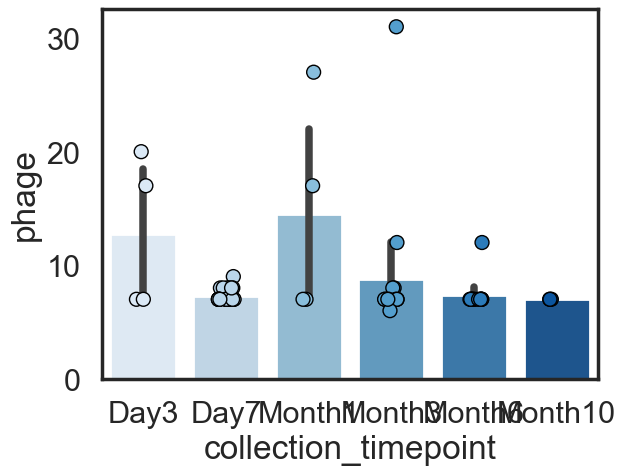

In [203]:
x = sns.barplot(data=AZ20_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='Blues')
x= sns.stripplot(data=AZ20_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='Blues', s=10, edgecolor='k', linewidth=1)
#plt.ylim(0,31)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_uniq_phge_bygene_timepoint_bymouse.svg', dpi=150, bbox_inches='tight')
#D3, M1, M10 have only 4 mice

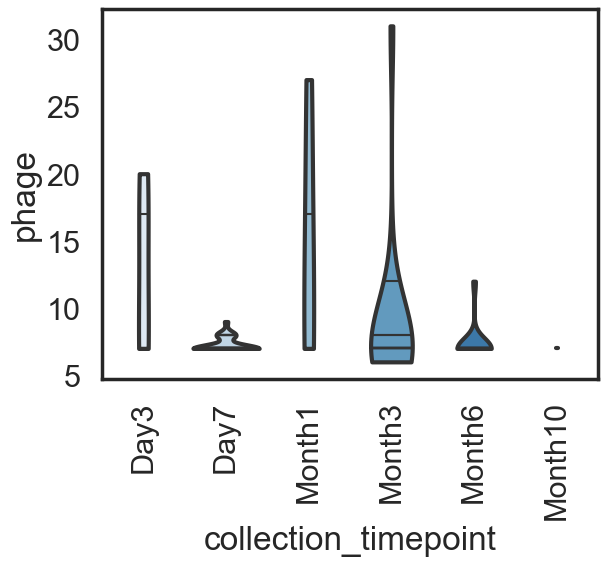

In [202]:
sns.violinplot(data=AZ20_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='Blues', inner="stick", scale="count", cut=0)
plt.xticks(rotation=90)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_uniq_phge_bygene_timepoint_bymouse.svg', dpi=150, bbox_inches='tight')
#D3, M1, M10 have only 4 mice

In [134]:
class dict_partial(dict):
    def __getitem__(self, value):
        for k in self.keys():
            if k in value:
                return self.get(k)
        else:
            return self.get(None)

In [135]:
taxa_map = dict_partial({'Enterobact':'Enterobacteriaceae', 'Escherichia':'Escherichia',
                            'Lactobacillus': 'Lactobacillus', 'Stx2': 'Escherichia', 
                        'Canid alphaherpesvirus 1':'Canid alphaherpesvirus 1', 
                       'Megavirus chiliensis':'Megavirus chiliensis',
                        'Phage Gifsy-1':'Salmonella', 'Phage Gifsy-2':'Salmonella', 'Salmonella ':'Salmonella'})
AZ20_phage['group'] = AZ20_phage['phage'].apply(lambda x: taxa_map[x])

In [136]:
AZ20_phage['group'] = [x.replace('None', y) for x, y in zip(AZ20_phage.group.astype(str), AZ20_phage.taxonomy)]

In [137]:
AZ20_phage.head()

viral_id  \
23B_Day7_11  YP_001700644.1   
23B_Day7_11  YP_009909740.1   
23B_Day7_11  YP_009043891.1   
23B_Day7_11  YP_009909752.1   
23B_Day7_11  YP_009855362.1   

                                                     viral_hit  \
23B_Day7_11  YP_001700644.1 bacteriophage integrase [Phage ...   
23B_Day7_11  YP_009909740.1 Hypothetical protein yfdR [Esch...   
23B_Day7_11  YP_009043891.1 DNA recombination-dependent gro...   
23B_Day7_11  YP_009909752.1 Holliday junction resolvase / C...   
23B_Day7_11  YP_009855362.1 DNA methyltransferase [Flavobac...   

                                                          gene  \
23B_Day7_11                           bacteriophage integrase    
23B_Day7_11                         Hypothetical protein yfdR    
23B_Day7_11       DNA recombination-dependent growth factor C    
23B_Day7_11  Holliday junction resolvase / Crossover juncti...   
23B_Day7_11                             DNA methyltransferase    

                                              phage         taxonomy  \
23B_Day7_11                           Phage Gifsy-2       Salmonella   
23B_Day7_11                  Escherichia phage 2H10     Escherichia    
23B_Day7_11                        Vibrio phage X29          Vibrio    
23B_Day7_11                  Escherichia phage 2H10     Escherichia    
23B_Day7_11  Flavobacterium phage vB_FspS_stinky9-1  Flavobacterium    

                       phage_id        sample_name  box_id  cage_id  \
23B_Day7_11                 NaN  12986.23B.Day7.11    10.0       23   
23B_Day7_11                2H10  12986.23B.Day7.11    10.0       23   
23B_Day7_11                 X29  12986.23B.Day7.11    10.0       23   
23B_Day7_11                2H10  12986.23B.Day7.11    10.0       23   
23B_Day7_11   vB_FspS_stinky9-1  12986.23B.Day7.11    10.0       23   

            collection_timepoint  ... mouse dam sire  date_collected  \
23B_Day7_11                 Day7  ...   23B  A1    A         7/19/17   
23B_Day7_11                 Day7  ...   23B  A1    A         7/19/17   
23B_Day7_11                 Day7  ...   23B  A1    A         7/19/17   
23B_Day7_11                 Day7  ...   23B  A1    A         7/19/17   
23B_Day7_11                 Day7  ...   23B  A1    A         7/19/17   

            bacteria_strain extraction_method     extraction_kit run plate  \
23B_Day7_11            AZ20            filter  Qiagen UltraClean   1   NaN   
23B_Day7_11            AZ20            filter  Qiagen UltraClean   1   NaN   
23B_Day7_11            AZ20            filter  Qiagen UltraClean   1   NaN   
23B_Day7_11            AZ20            filter  Qiagen UltraClean   1   NaN   
23B_Day7_11            AZ20            filter  Qiagen UltraClean   1   NaN   

                       group  
23B_Day7_11       Salmonella  
23B_Day7_11      Escherichia  
23B_Day7_11          Vibrio   
23B_Day7_11      Escherichia  
23B_Day7_11  Flavobacterium   

[5 rows x 62 columns]

In [138]:
print(AZ20_phage.group.value_counts())

Escherichia                       7400
Salmonella                        2478
Vibrio                            1236
Flavobacterium                    1225
uncultured Caudovirales           1216
Xanthomonas                         46
Ralstonia                           34
Pseudomonas                         20
Bacillus                            16
Burkholderia                        15
Rhodobacter                          9
uncultured                           6
Lactobacillus                        6
Murmansk pox                         5
Caulobacter                          5
Alteromonas                          5
Dickeya                              5
Pectobacterium                       5
Enterococcus                         5
Bdellovibrio                         5
Arthrobacter                         4
Tetraselmis viridis                  4
Shewanella sp.                       3
Aureococcus ano                      2
Enterobacteriaceae                   2
Chrysochromulina ericina 

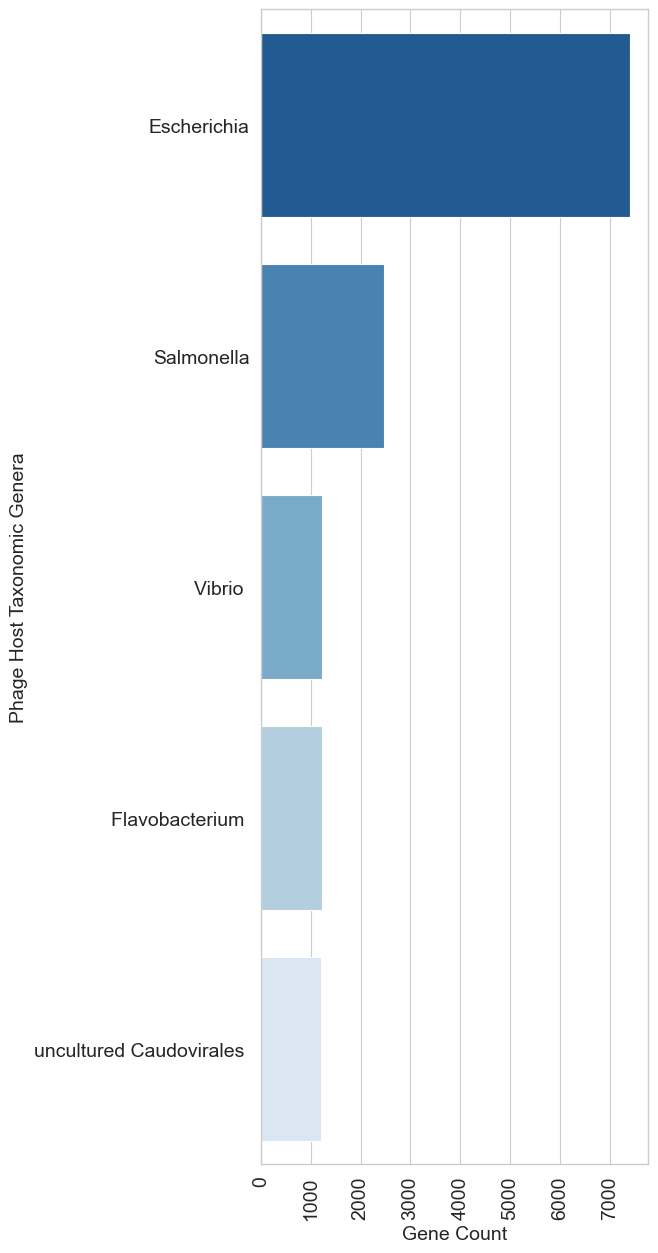

In [139]:
plt.figure(figsize=(5,15))
AZ20_phage_df = AZ20_phage[AZ20_phage.groupby("group")["group"].transform('size') > 100]
sns.set_style(style="whitegrid")
sns.countplot(data=AZ20_phage_df, 
              y='group', palette='Blues_r', order = AZ20_phage_df['group'].value_counts().index)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("Phage Host Taxonomic Genera", fontsize=14)
plt.xlabel("Gene Count", fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_top_host_genus.svg', dpi=150, bbox_inches='tight')

In [140]:
taxaz_map = dict_partial({'Enterobacteriaceae':'Enterobacteriaceae', 'Escherichia':'Enterobacteriaceae',
            'Klebsiella': 'Enterobacteriaceae', 'Shigella':'Enterobacteriaceae', 'Salmonella': 'Enterobacteriaceae', 
            'Cronobacter':'Enterobacteriaceae', 'Stenotrophomonas':'Xanthomonadaceae', 
                          'Rhodobacter':'Rhodobacteraceae', 'Roseobacter':'Rhodobacteraceae', 
                         'Burkholderia':'Burkholderiaceae', 'Paracoccus': 'Rhodobacteraceae', 
                         'Geobacillus':'Bacilliaceae', 'Rhizobium':'Rhizobiaceae', 
                          'Caulobacter':'Caulobacteraceae',
                          'Sinorhizobium':'Rhizobiaceae', 'Vibrio':'Vibrionaceae', 'Xanthomonas':'Xanthomonadaceae',
                          'Pseudomonas':'Pseudomonadaceae', 'Azospirillum':'Azospirillaceae', 
                          'Sulfitobacter':'Rhodobacteraceae', 'Yersinia':'Yersiniaceae', 
                          'Bacillus':'Bacilliaceae', 'Loktanella':'Rhodobacteraceae','Acinetobacter':'Moraxellaceae',
                         'Achromobacter':'Alcaligenaceae', 'Aurantimonas':'Aurantimonadaceae', 
                         'Ralstonia':'Burkholderiaceae', 'Rhodovulum':'Rhodobacteraceae', 'Shewanella':'Shewanellaceae',
                         'Idiomarinaceae':'Idiomarinaceae', 'Myxococcus':'Myxococcaceae', 'Halocynthia':'Urochordate/tunicate', 
                         'Enterococcus':'Enterococcaceae', 'Streptococcus':'Streptococcaceae', 
                          'Staphylococcus':'Staphylococcaceae', 'Megavirus chiliensis':'Amoebas', 
                         'Cafeteria roenbergensis':'marine flagellate', 'Psychrobacter':'Moraxellaceae', 
                         'Brucella':'Brucellaceae', 'Sphingomonas':'Sphingomonadaceae', 'Lactobacillus':'Lactobacillaceae', 
                         'Planktothrix':'Microcoleaceae', 'Erwinia':'Erwiniaceae', 'Campylobacter':'Campylobacteraceae', 
                         'Ectocarpus siliculosus':'filamentous brown alga', 'Thermus':'Thermaceae', 'Canid alphaherpesvirus 1':'Canines',
                         'Murmansk pox': 'root vole', 'Aeromonas ':'Aeromonadaceae', 'Flavobacterium ':'Flavobacteriaceae', 
                          'Pantoea ':'Erwiniaceae', 'Edwardsiella ':'Hafniaceae',
                           'uncultured Caudovirales ':'unknown', 'Ruegeria ':'Rhodobacteraceae', 'Streptomyces ':'Streptomycetaceae',
                           'Rhodococcus ':'Nocardiaceae', 'uncultured ': 'unknown', 'Feldmannia species ':'Acinetosporaceae',
                           'Rhodoferax ':'Comamonadaceae', 'Salinivibrio ':'Vibrionaceae', 'Cyano':'Cyanobacteriaceae', 'Mycobacterium ':'Mycobacteriaceae',
                           'Synechococcus ':'Synechococcaceae', 'Arthrobacter ':'Micrococcaceae', 'Gordonia ':'Theaceae', 'Bdellovibrio ':'Bdellovibrionaceae',
                           'Singapore grouper irido': 'unknown', 'Acidovorax ':'Comamonadaceae', 'Serratia ':'Enterobacteriaceae', 'Dickeya ':'Enterobacteriaceae',
                               'Citrobacter ':'Enterobacteriaceae', 'Pectobacterium ':'Enterobacteriaceae', 'Pelagibacter ':'Pelagibacteraceae',
                               'Microbacterium ':'Microbacteriaceae', 'Paramecium bursaria Chlorella ':'Chlorellaceae',
                               'Feldmannia irregularis ':'Acinetosporaceae', 'Pandora': 'giant virus', 'Agrobacterium ':'Rhizobiaceae',
                                   'Chrysochromulina ericina ':'Prymnesiaceae', 'Clostridium ':'Clostridiaceae',
                               'Only Syngen Nebraska ':'Chlorellaceae', 'Proteus ':'Enterobacteriaceae', 'Enterococus ':'Enterococcaceae', 'Pitho':'unknown',
                               'Acanthamoeba polyphaga mimi':'Acanthamoebidae', 'Aureococcus ano':'Pelagomonadaceae',
                               'Dinoroseobacter ':'Rhodobacteraceae', 'Tetraselmis viridis ':'Chlorodendraceae', 'Nocardia ':'Nocardiaceae', 'Pacman': 'unknown',
                                   'Alteromonas ':'Alteromonadaceae', 'Sphingobium ':'Sphingomonadaceae'})
AZ20_phage['taxa_family_group'] = AZ20_phage['group'].apply(lambda x: taxaz_map[x])

In [141]:
AZ20_phage['taxa_family_group'] = AZ20_phage['taxa_family_group'].apply(lambda s: 'Other' if s is None else str(s))

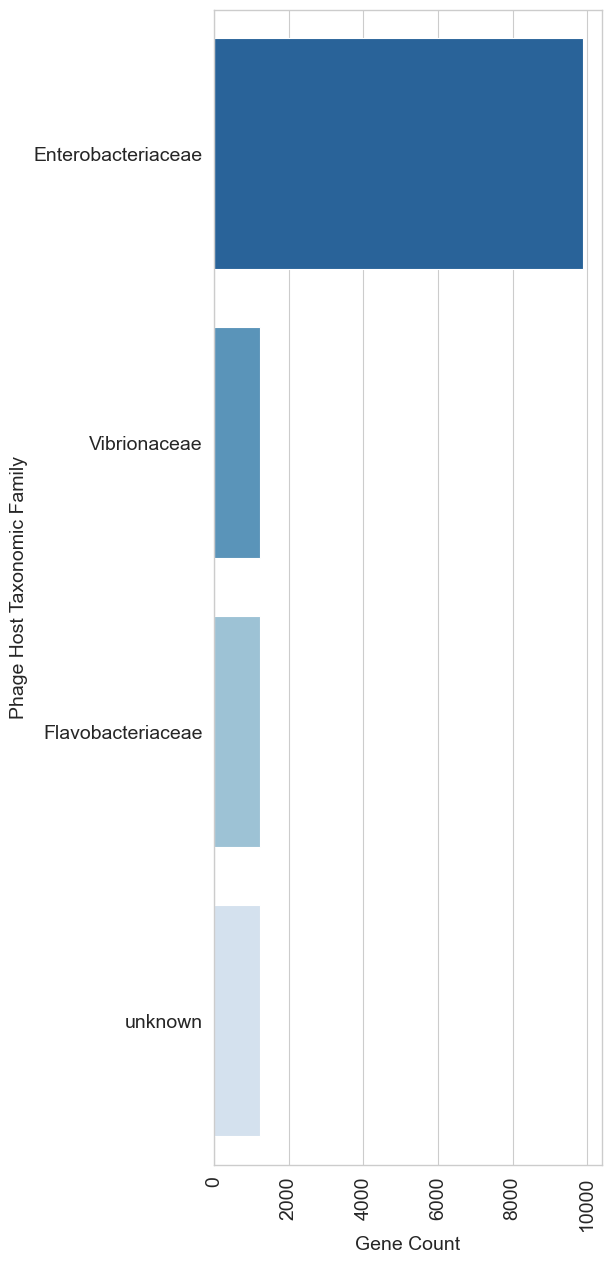

In [142]:
plt.figure(figsize=(5,15))
sns.set_style(style="whitegrid")
AZ20_phage_df2 = AZ20_phage[AZ20_phage.groupby("taxa_family_group")["taxa_family_group"].transform('size') > 1000]
sns.countplot(data=AZ20_phage_df2, order=AZ20_phage_df2['taxa_family_group'].value_counts().index,
              y='taxa_family_group', palette='Blues_r', )
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("Phage Host Taxonomic Family", fontsize=14)
plt.xlabel("Gene Count", fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_top_host_family.svg', dpi=150, bbox_inches='tight')

In [143]:
AZ20_phage['taxa_family_group'].value_counts()

Enterobacteriaceae        9890
Vibrionaceae              1236
Flavobacteriaceae         1225
unknown                   1223
Burkholderiaceae            49
Xanthomonadaceae            47
Pseudomonadaceae            20
Bacilliaceae                16
Rhodobacteraceae             9
Enterococcaceae              6
Lactobacillaceae             6
Alteromonadaceae             5
Bdellovibrionaceae           5
Caulobacteraceae             5
root vole                    5
Micrococcaceae               4
Chlorodendraceae             4
Shewanellaceae               3
Prymnesiaceae                2
Pelagomonadaceae             2
Chlorellaceae                2
Pelagibacteraceae            2
Clostridiaceae               1
marine flagellate            1
Canines                      1
Erwiniaceae                  1
giant virus                  1
Acinetosporaceae             1
Theaceae                     1
filamentous brown alga       1
Streptomycetaceae            1
Rhizobiaceae                 1
Name: ta

In [144]:
AZ20_phage['taxa_family_group'].unique()

array(['Enterobacteriaceae', 'Vibrionaceae', 'Flavobacteriaceae',
       'unknown', 'Bacilliaceae', 'Streptomycetaceae', 'Pseudomonadaceae',
       'Xanthomonadaceae', 'Burkholderiaceae', 'filamentous brown alga',
       'Bdellovibrionaceae', 'Theaceae', 'Pelagibacteraceae',
       'Chlorellaceae', 'Acinetosporaceae', 'giant virus', 'Rhizobiaceae',
       'Prymnesiaceae', 'Clostridiaceae', 'Enterococcaceae',
       'marine flagellate', 'Canines', 'Erwiniaceae', 'Lactobacillaceae',
       'Pelagomonadaceae', 'Chlorodendraceae', 'Micrococcaceae',
       'root vole', 'Caulobacteraceae', 'Alteromonadaceae',
       'Rhodobacteraceae', 'Shewanellaceae'], dtype=object)

In [145]:
taxaf_map = dict_partial({'Enterobacteriaceae':'gram negative', 'Xanthomonadaceae':'gram negative', 
                          'Rhodobacteraceae':'gram negative', 'Burkholderiaceae':'gram negative', 
                          'Rhodobacteraceae':'gram negative', 'Rhizobiaceae':'gram negative',
                          'Bacilliaceae':'gram positive', 'Caulobacteraceae':'gram negative',
                          'Vibrionaceae':'gram negative', 'Pseudomonadaceae':'gram negative', 
                          'Azospirillaceae':'gram negative', 'Yersiniaceae':'gram negative',
                         'Moraxellaceae':'gram negative', 'Alcaligenaceae':'gram negative', 
                         'Aurantimonadaceae':'gram negative', 'Shewanellaceae':'gram negative',
                         'Idiomarinaceae':'gram negative', 'Myxococcaceae':'gram negative', 
                          'Urochordate/tunicate':'Other', 'Enterococcaceae':'gram positive',
                         'Streptococcaceae':'gram positive', 'Staphylococcaceae':'gram positive', 
                         'Amoebas':'Other', 'marine flagellate':"Other", 'Brucellaceae':'gram negative',
                         'Sphingomonadaceae':'gram negative', 'Lactobacillaceae':'gram positive', 
                         'Microcoleaceae':'Other', 'Erwiniaceae':'gram negative', 
                         'Campylobacteraceae':'gram negative', 'filamentous brown alga':'Other', 
                         'Thermaceae':'gram negative', 'Canines':"Other", 'root vole':"Other", 
                         'giant virus': 'Other', 'unknown':'Other', 'Aeromonadaceae':'gram negative',
                         'Flavobacteriaceae': 'gram negative', 'Hafniaceae':'gram negative', })

In [146]:
AZ20_phage['taxa_overview_group'] = AZ20_phage['taxa_family_group'].apply(lambda x: taxaf_map[x])

In [147]:
AZ20_phage[['group','phage_id', 'taxa_overview_group']].groupby('group')['phage_id'].count().nlargest(13)

group
Escherichia                 7400
Salmonella                  1263
Vibrio                      1236
Flavobacterium              1225
uncultured Caudovirales     1216
Xanthomonas                   46
Ralstonia                     34
Pseudomonas                   20
Bacillus                      16
Burkholderia                  15
Rhodobacter                    9
Lactobacillus                  6
uncultured                     6
Name: phage_id, dtype: int64

<AxesSubplot: xlabel='count', ylabel='taxa_overview_group'>

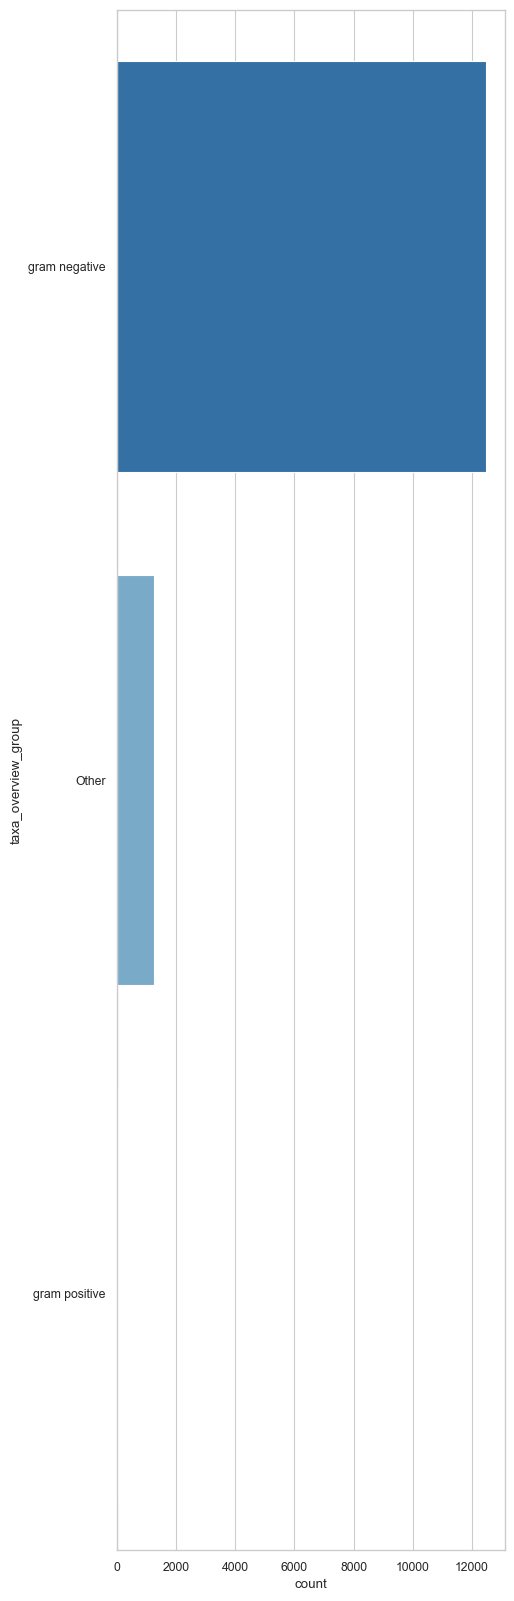

In [148]:
plt.figure(figsize=(5,20))
sns.set_style(style="whitegrid")
sns.countplot(data=AZ20_phage, y='taxa_overview_group', palette='Blues_r')

In [149]:
#pd.set_option("display.max_rows", None)
AZ20_phage.phage_id.value_counts()

 Lambda_1H12            3698
 2H10                   3686
 Fels-1                 1236
 X29                    1228
 vB_FspS_stinky9-1      1224
                        ... 
 BV-PW1                    1
 BcepSaruman               1
 RB16                      1
 vB_FspM_immuto_2-6A       1
 pYD21-A                   1
Name: phage_id, Length: 62, dtype: int64

In [150]:
AZ20_phage['phage_id'].replace('Phage Gifsy-1','Gifsy-1',inplace=True)
AZ20_phage['phage_id'].replace('Phage Gifsy-2','Gifsy-2',inplace=True)

In [151]:
#AZ20_phage.to_csv('./AZ20_mod.csv')

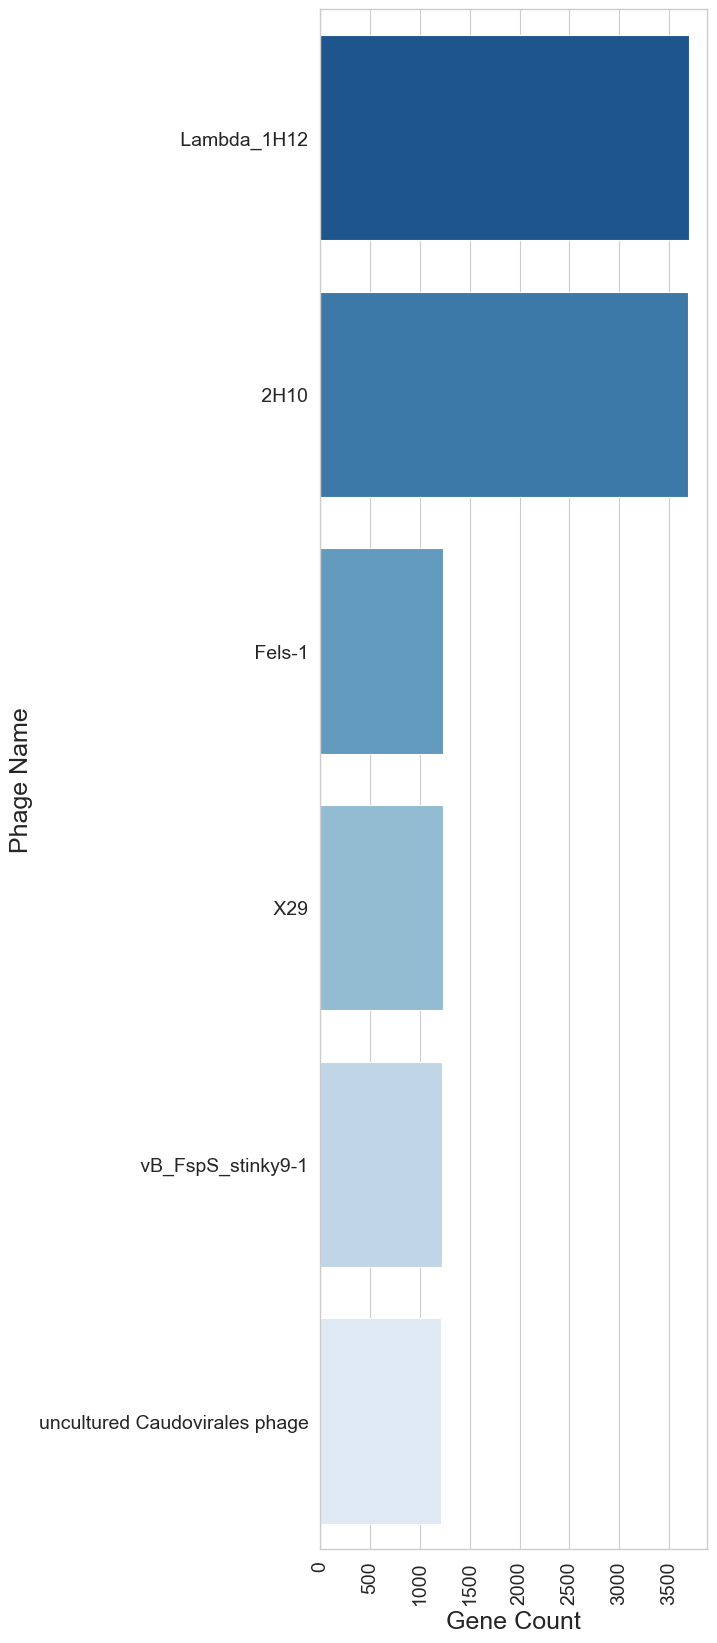

In [152]:
plt.figure(figsize=(5,20))
sns.set_style(style="whitegrid")
AZ20_phage_df3 = AZ20_phage[AZ20_phage.groupby('phage_id')['phage_id'].transform('size') > 1000]
sns.countplot(data=AZ20_phage_df3, order=AZ20_phage_df3['phage_id'].value_counts().index,
              y='phage_id', palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Phage Name', fontsize=18)
plt.xlabel('Gene Count', fontsize=18)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_top_phage_genes.svg', dpi=150, bbox_inches='tight')

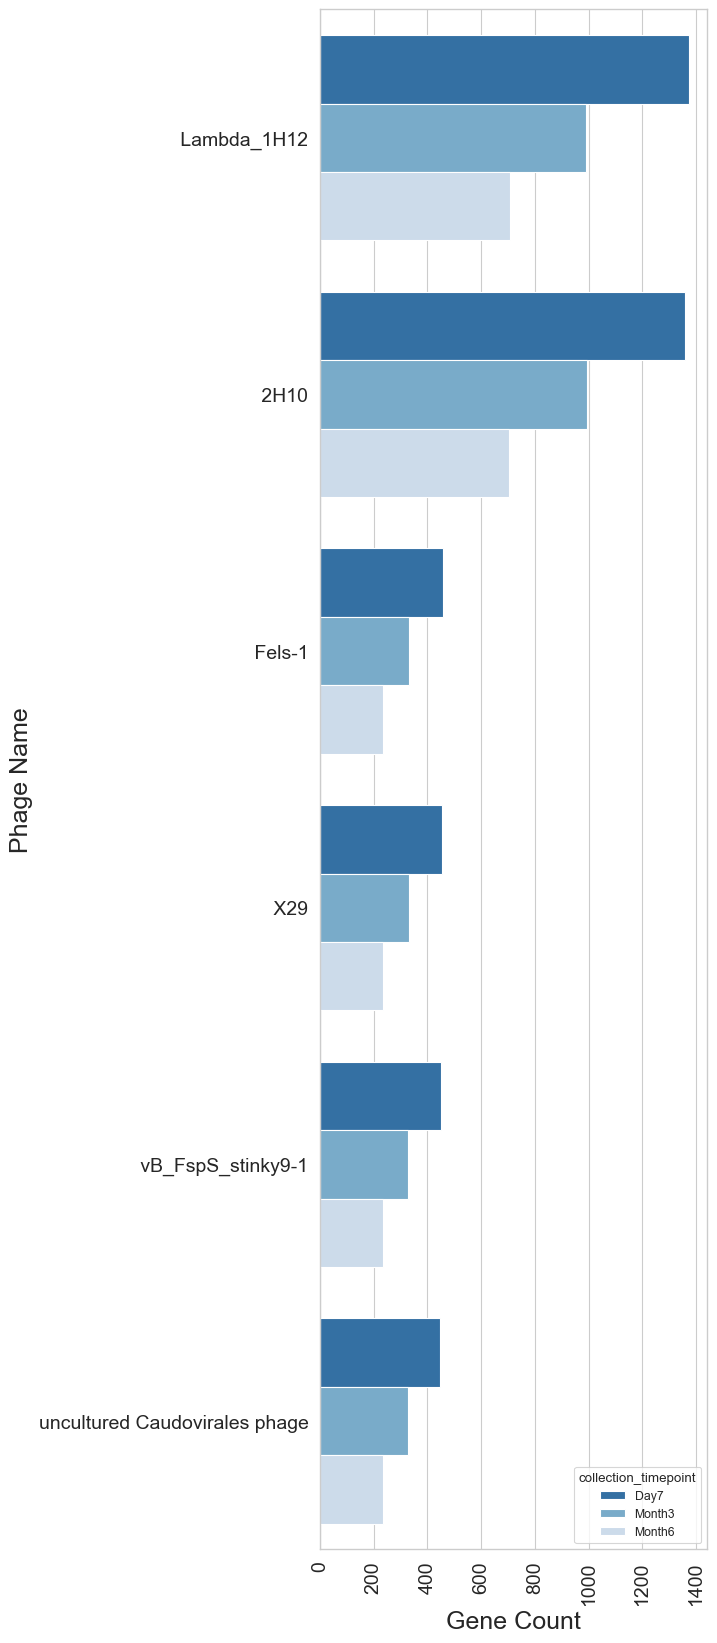

In [153]:
plt.figure(figsize=(5,20))
sns.set_style(style="whitegrid")
AZ20_phage_df4 = AZ20_phage_df3[AZ20_phage_df3['collection_timepoint'].isin(['Day7', 'Month3', 'Month6'])]

sns.countplot(data=AZ20_phage_df4, order=AZ20_phage_df3['phage_id'].value_counts().index,
              y='phage_id', hue='collection_timepoint', 
              hue_order=['Day7', 'Month3', 'Month6'],
              palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Phage Name', fontsize=18)
plt.xlabel('Gene Count', fontsize=18)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_top_phage_gene_counts_time.svg', dpi=150, bbox_inches='tight')

# Normalize by Number of isolates

In [154]:
top_phage = AZ20_phage[AZ20_phage.phage_id.isin(AZ20_phage_df3['phage_id'].value_counts().index)].phage.unique()

In [155]:
AZ20_phagez = AZ20_phage[['collection_timepoint', 'mouse', 'phage', 'gene']].copy()
AZ20_phage_gene_count = AZ20_phagez.groupby(by=['collection_timepoint', 'mouse', 'phage']).count()
AZ20_norm = pd.merge(AZ20_phage_gene_count.reset_index(), assembly_list2, 
                            left_on=['collection_timepoint', 'mouse'], right_on=['collection_timepoint', 'mouse'])
AZ20_norm['average_number_phage_genes_per_isolate'] = AZ20_norm['gene']/AZ20_norm['isolate']
AZ20_norm

collection_timepoint mouse                                   phage  gene  \
0                   Day3  23LL              Bdellovibrio phage phi1422     1   
1                   Day3  23LL             Burkholderia phage phi1026b     1   
2                   Day3  23LL          Ectocarpus siliculosus virus 1     1   
3                   Day3  23LL                  Escherichia phage 2H10    54   
4                   Day3  23LL           Escherichia virus Lambda_1H12    56   
..                   ...   ...                                     ...   ...   
574               Month6  29LL  Flavobacterium phage vB_FspS_stinky9-1     4   
575               Month6  29LL                           Phage Gifsy-2     4   
576               Month6  29LL                 Salmonella phage Fels-1     4   
577               Month6  29LL                        Vibrio phage X29     4   
578               Month6  29LL           uncultured Caudovirales phage     4   

     isolate  average_number_phage_genes_per_isolate  
0         18                                0.055556  
1         18                                0.055556  
2         18                                0.055556  
3         18                                3.000000  
4         18                                3.111111  
..       ...                                     ...  
574        4                                1.000000  
575        4                                1.000000  
576        4                                1.000000  
577        4                                1.000000  
578        4                                1.000000  

[579 rows x 6 columns]

In [156]:
AZ20_norm['collection_timepoint'] = pd.Categorical(AZ20_norm['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [157]:
top_phage = ['Escherichia phage 2H10', 'Escherichia virus Lambda_1H12',
       'Vibrio phage X29', 'Salmonella phage Fels-1', 'Phage Gifsy-2',
       'uncultured Caudovirales phage',
       'Flavobacterium phage vB_FspS_stinky9-1']
bottom_phage = ['Ralstonia phage phiRSP',
       'Rhodobacter phage RcRhea', 'Alteromonas phage vB_AcoS-R7M',
       'Bacillus phage Pascal', 'Bacillus phage phBC6A52',
       'Burkholderia phage phi1026b', 'Caulobacter phage Sansa',
       'Dickeya phage vB_DsoM_JA11', 'Enterococcus phage phiSHEF2',
       'Ralstonia phage GP4', 'Xanthomonas phage phiL7',
       'Xanthomonas phage FoX3', 'Salmonella virus Fels2',
       'Lactobacillus phage Ld17', 'Vibrio phage pYD38-B',
       'Pectobacterium phage MA11', 'Murmansk poxvirus',
       'Tetraselmis viridis virus S20', 'Arthrobacter phage Tank',
       'Bacillus phage phBC6A51', 'Shewanella sp. phage 1/44',
       'Pseudomonas phage AF', 'Escherichia virus P2-2H4',
       'Vibrio phage VvAW1', 'Enterobacteria phage PRD1',
       'Vibrio phage pYD21-A', 'uncultured phage_MedDCM-OCT-S28-C10',
       'Bdellovibrio phage phi1422', 'Stenotrophomonas phage IME-SM1',
       'Pseudomonas phage PMBT3', 'Chrysochromulina ericina virus',
       'Aureococcus anophagefferens virus',
       'Ectocarpus siliculosus virus 1', 'Gordonia phage Daredevil',
       'Streptomyces phage Comrade', 'Erwinia phage vB_EamM_Yoloswag',
       'Escherichia phage muut', 'Bacillus phage SP-15',
       'Agrobacterium phage OLIVR5', 'Pandoravirus salinus',
       'Feldmannia irregularis virus a', 'Pelagibacter phage HTVC008M',
       'Burkholderia phage BcepGomr] ',
       'Paramecium bursaria Chlorella virus CVA-1',
       'Clostridium phage phiCPV4', 'Only Syngen Nebraska virus 5',
       'Salmonella phage FSL SP-058',
       'Flavobacterium phage vB_FspM_immuto_2-6A',
       'Lactobacillus phage Lb338-1', 'Enterococus phage vipetofem',
       'Burkholderia phage BcepSaruman', 'Escherichia virus RB16',
       'Pithovirus sibericum', 'Cafeteria roenbergensis virus BV-PW1',
       'Bacillus phage Page', 'Ralstonia phage Gervaise']
ref_phage = Nissle_ref_highr['phage'].value_counts().index

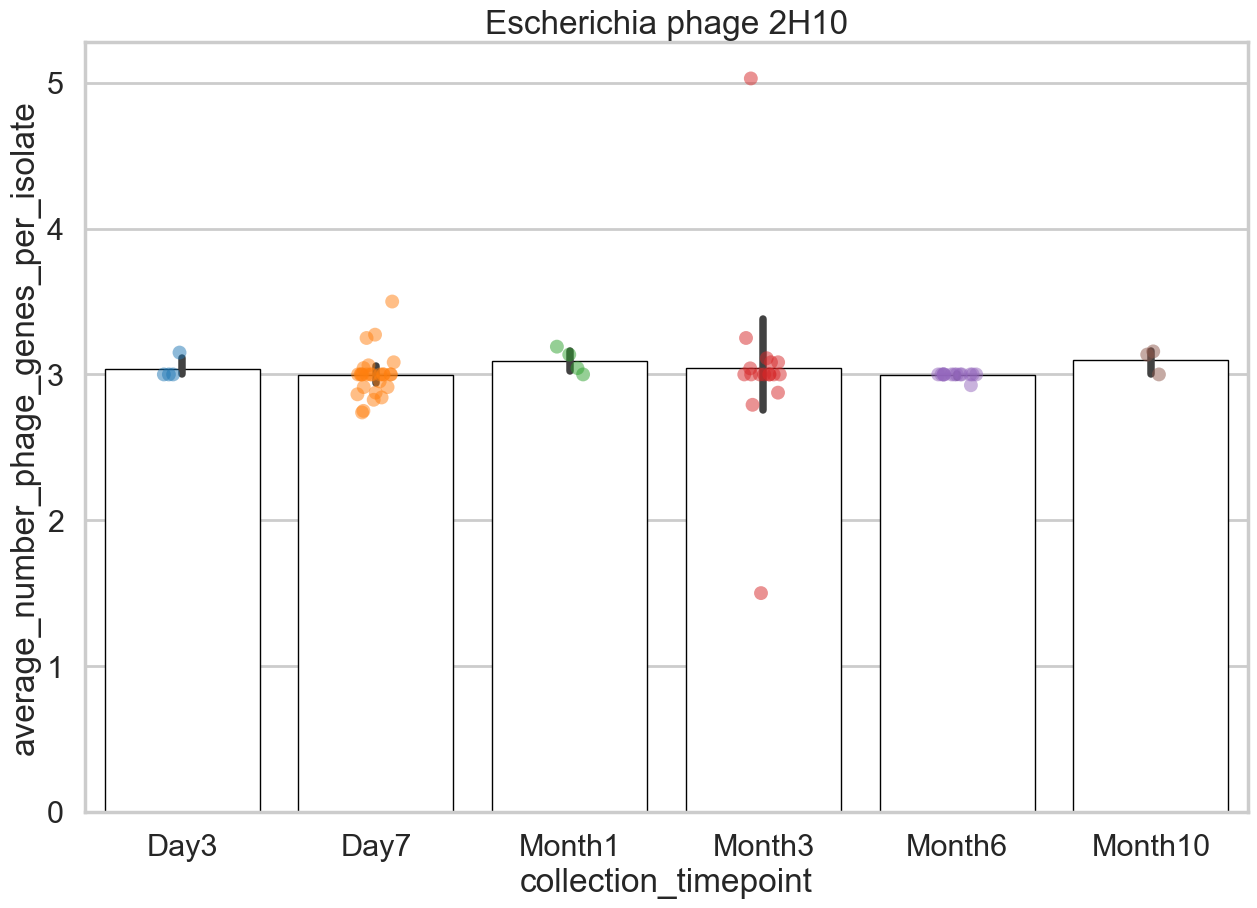

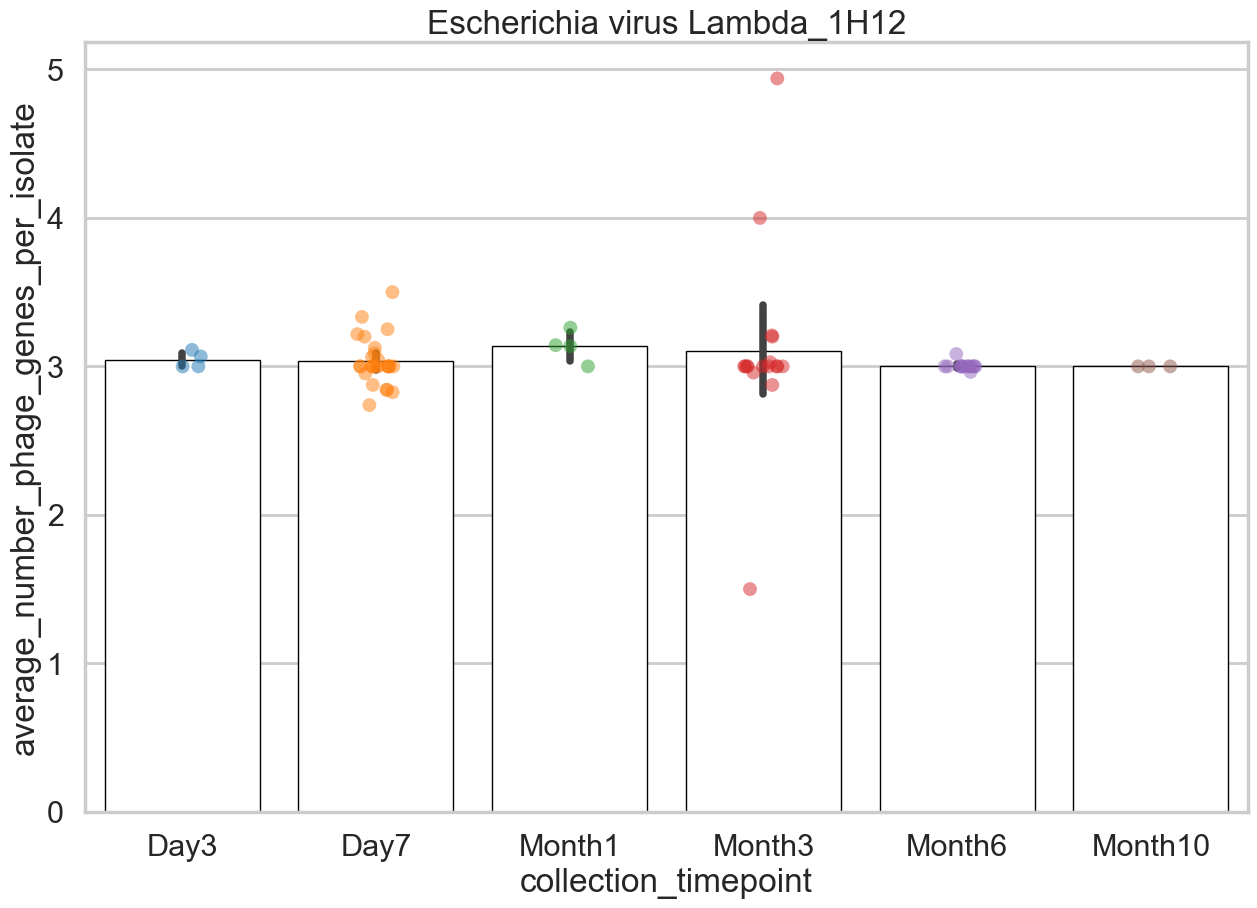

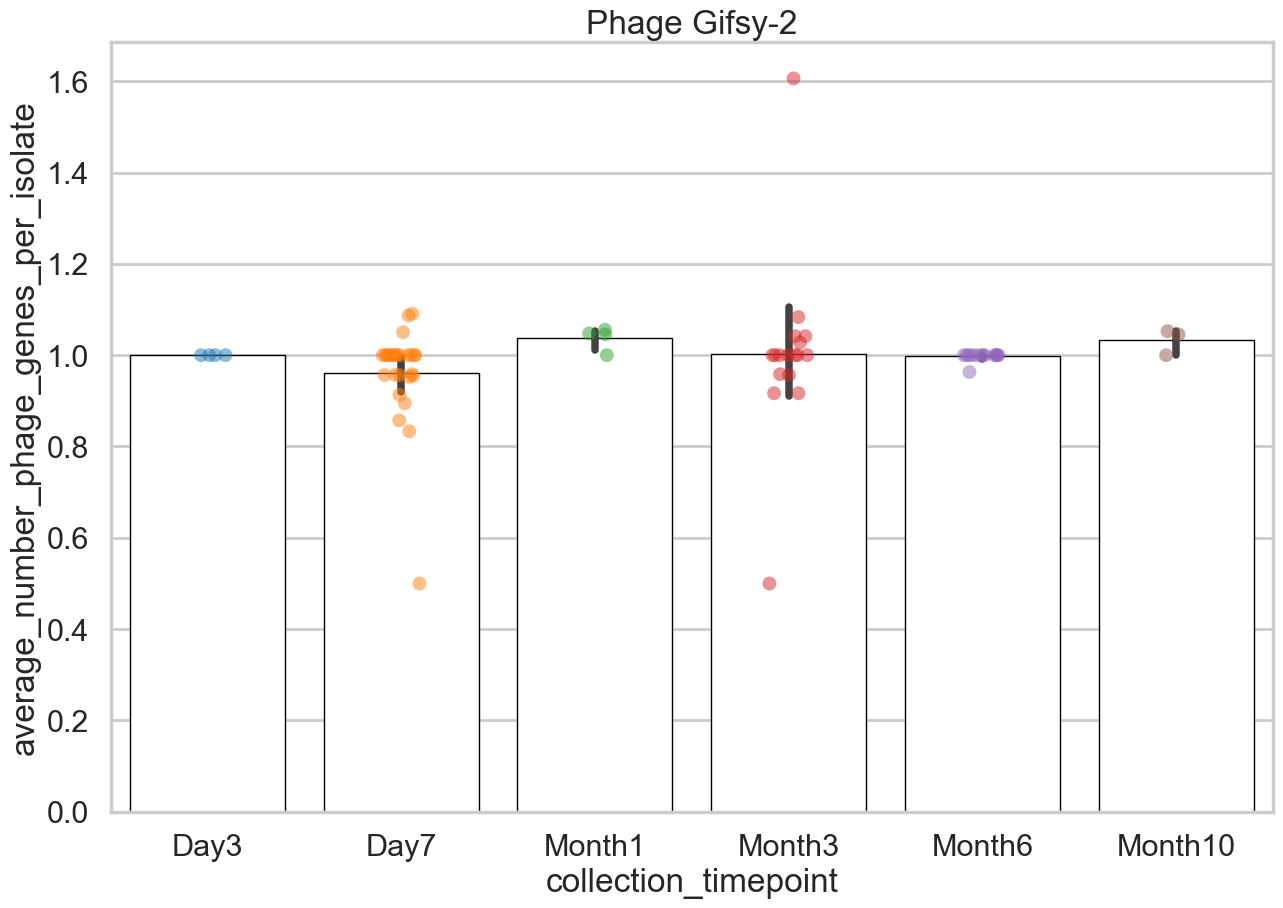

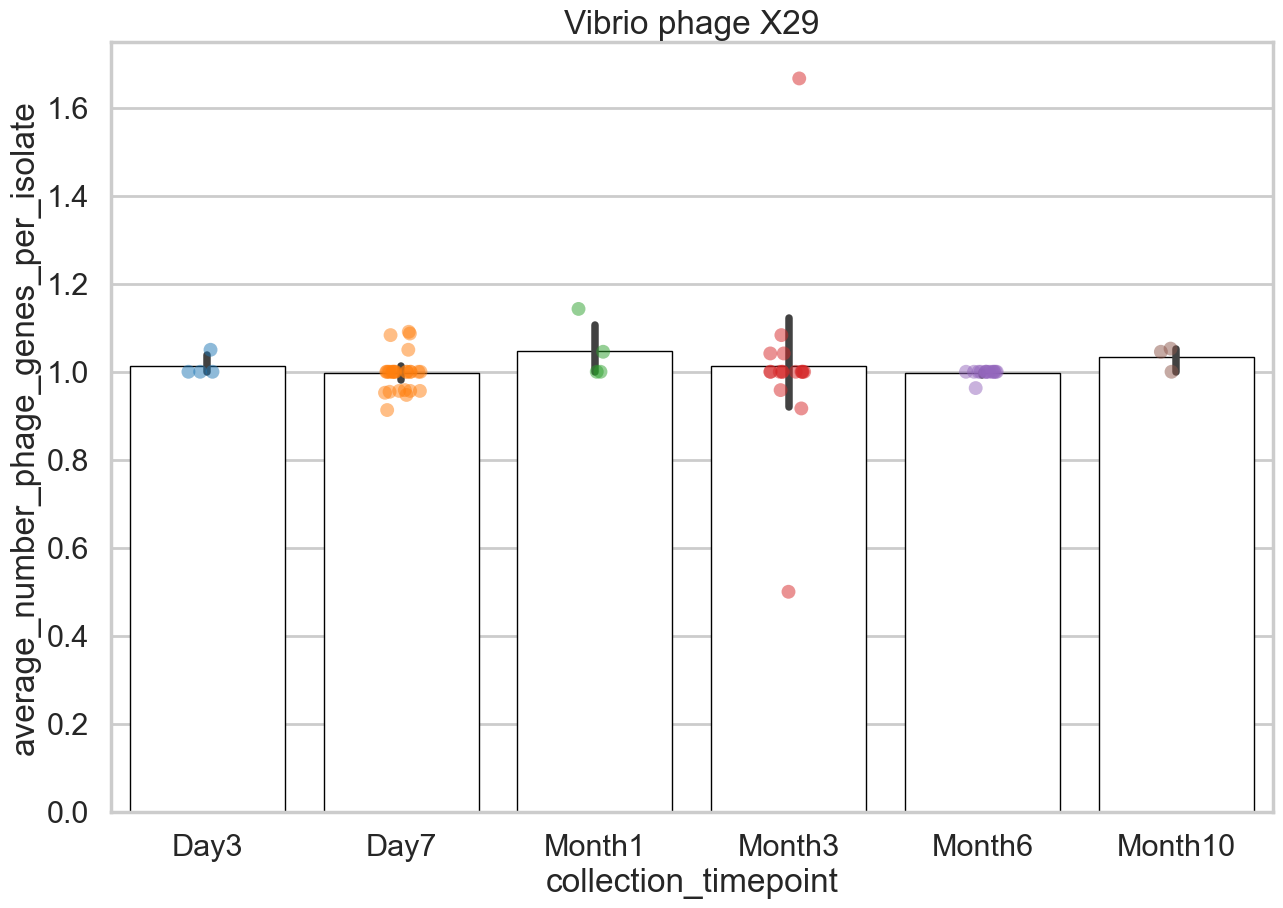

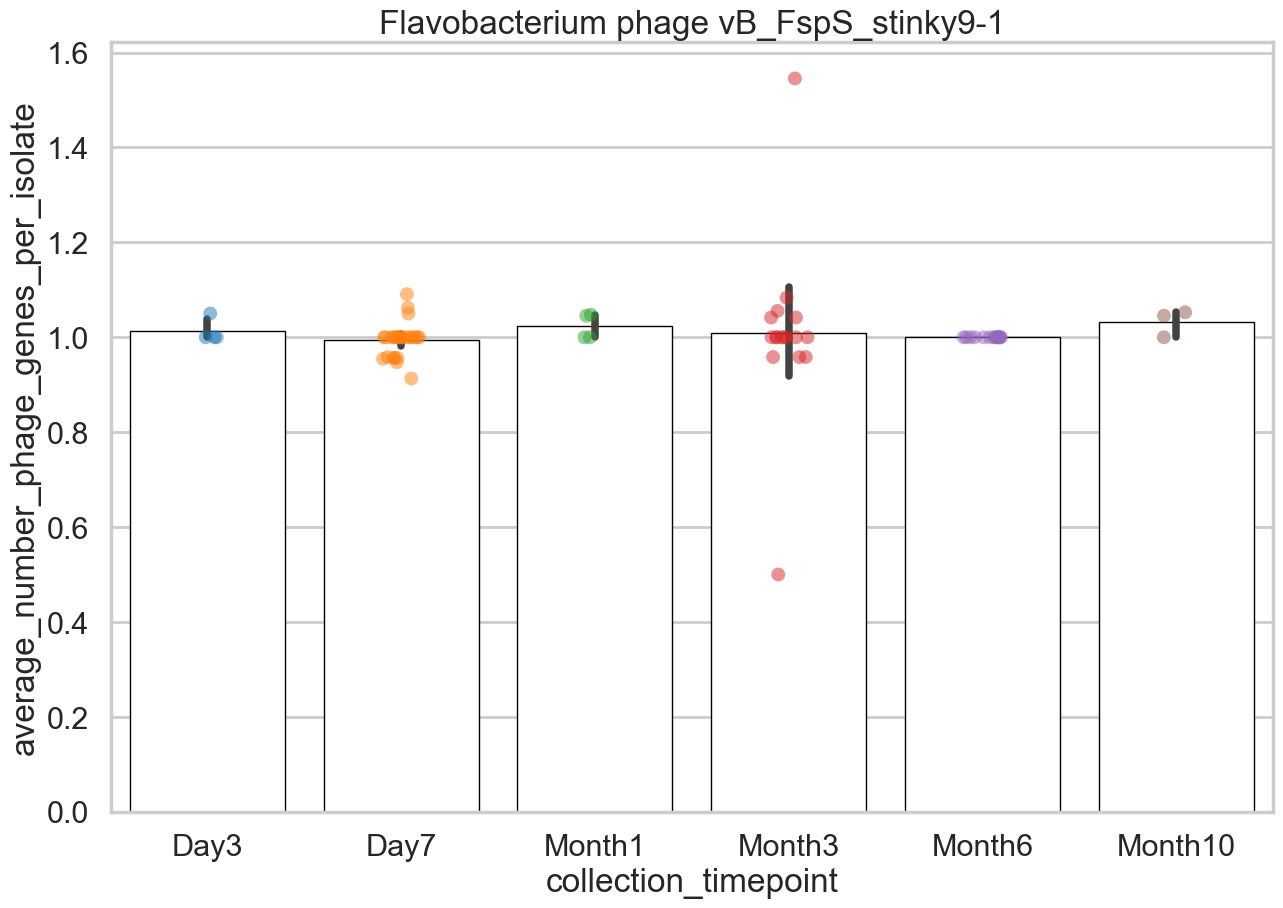

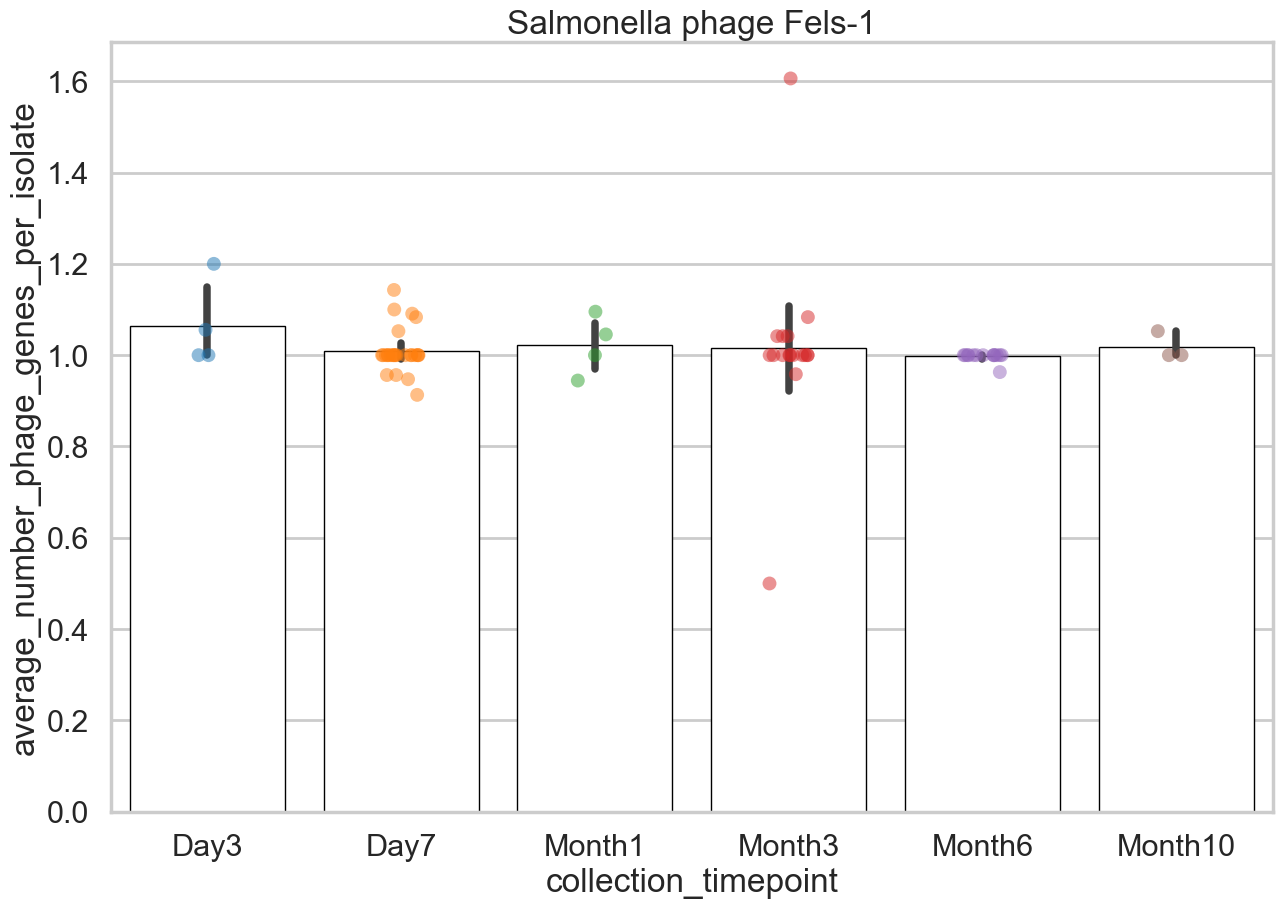

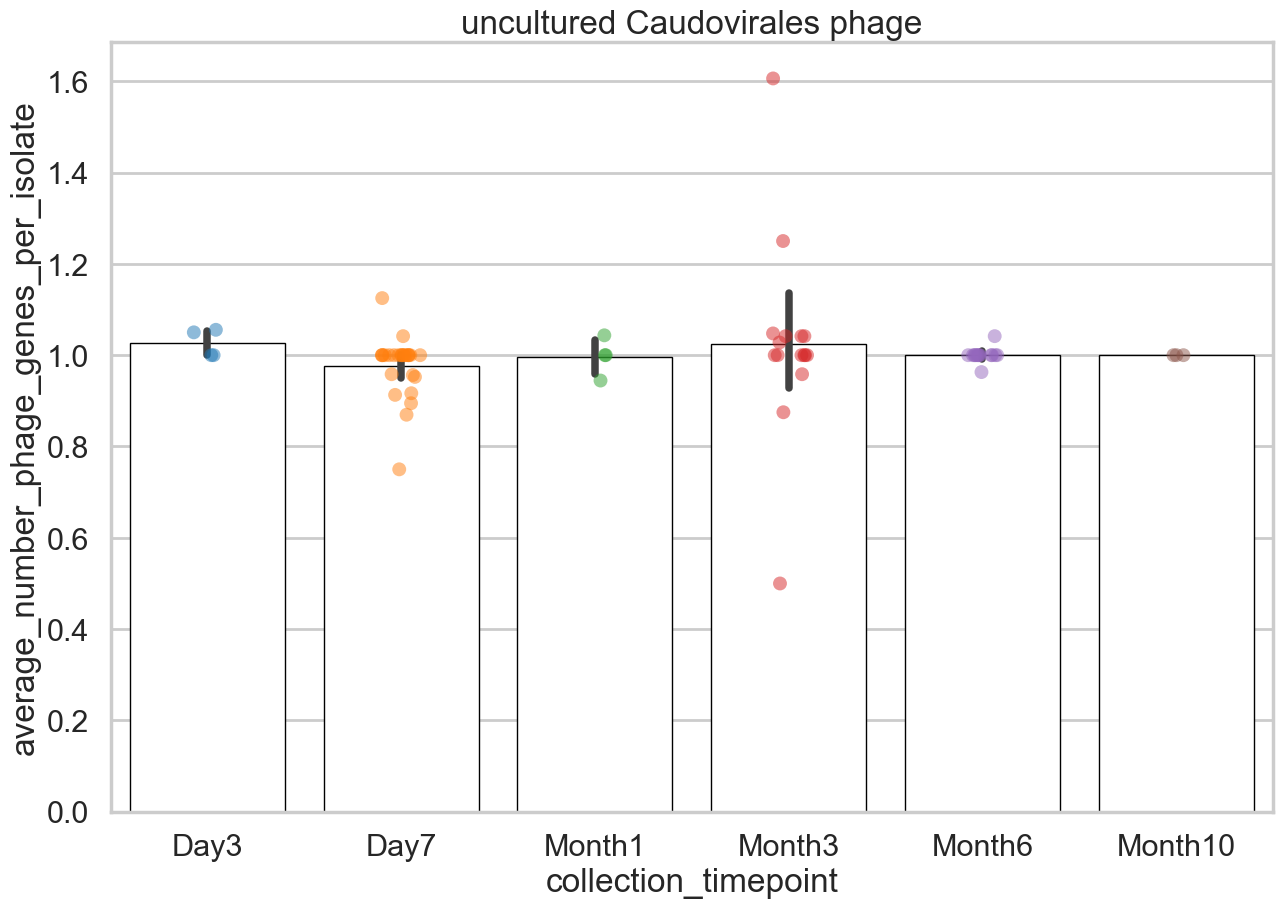

In [158]:
sns.set_context('poster')
for ph in ref_phage:
    plt.figure(figsize=(15,10))
    sns.barplot(data=AZ20_norm[AZ20_norm['phage']==ph], x='collection_timepoint', 
                y='average_number_phage_genes_per_isolate', color='white', ec='k', lw=1)
    sns.stripplot(data=AZ20_norm[AZ20_norm['phage']==ph], x='collection_timepoint', 
                y='average_number_phage_genes_per_isolate', size=10, alpha=0.5)
    plt.title("%s" % ph, fontsize=24)
    plt.show()

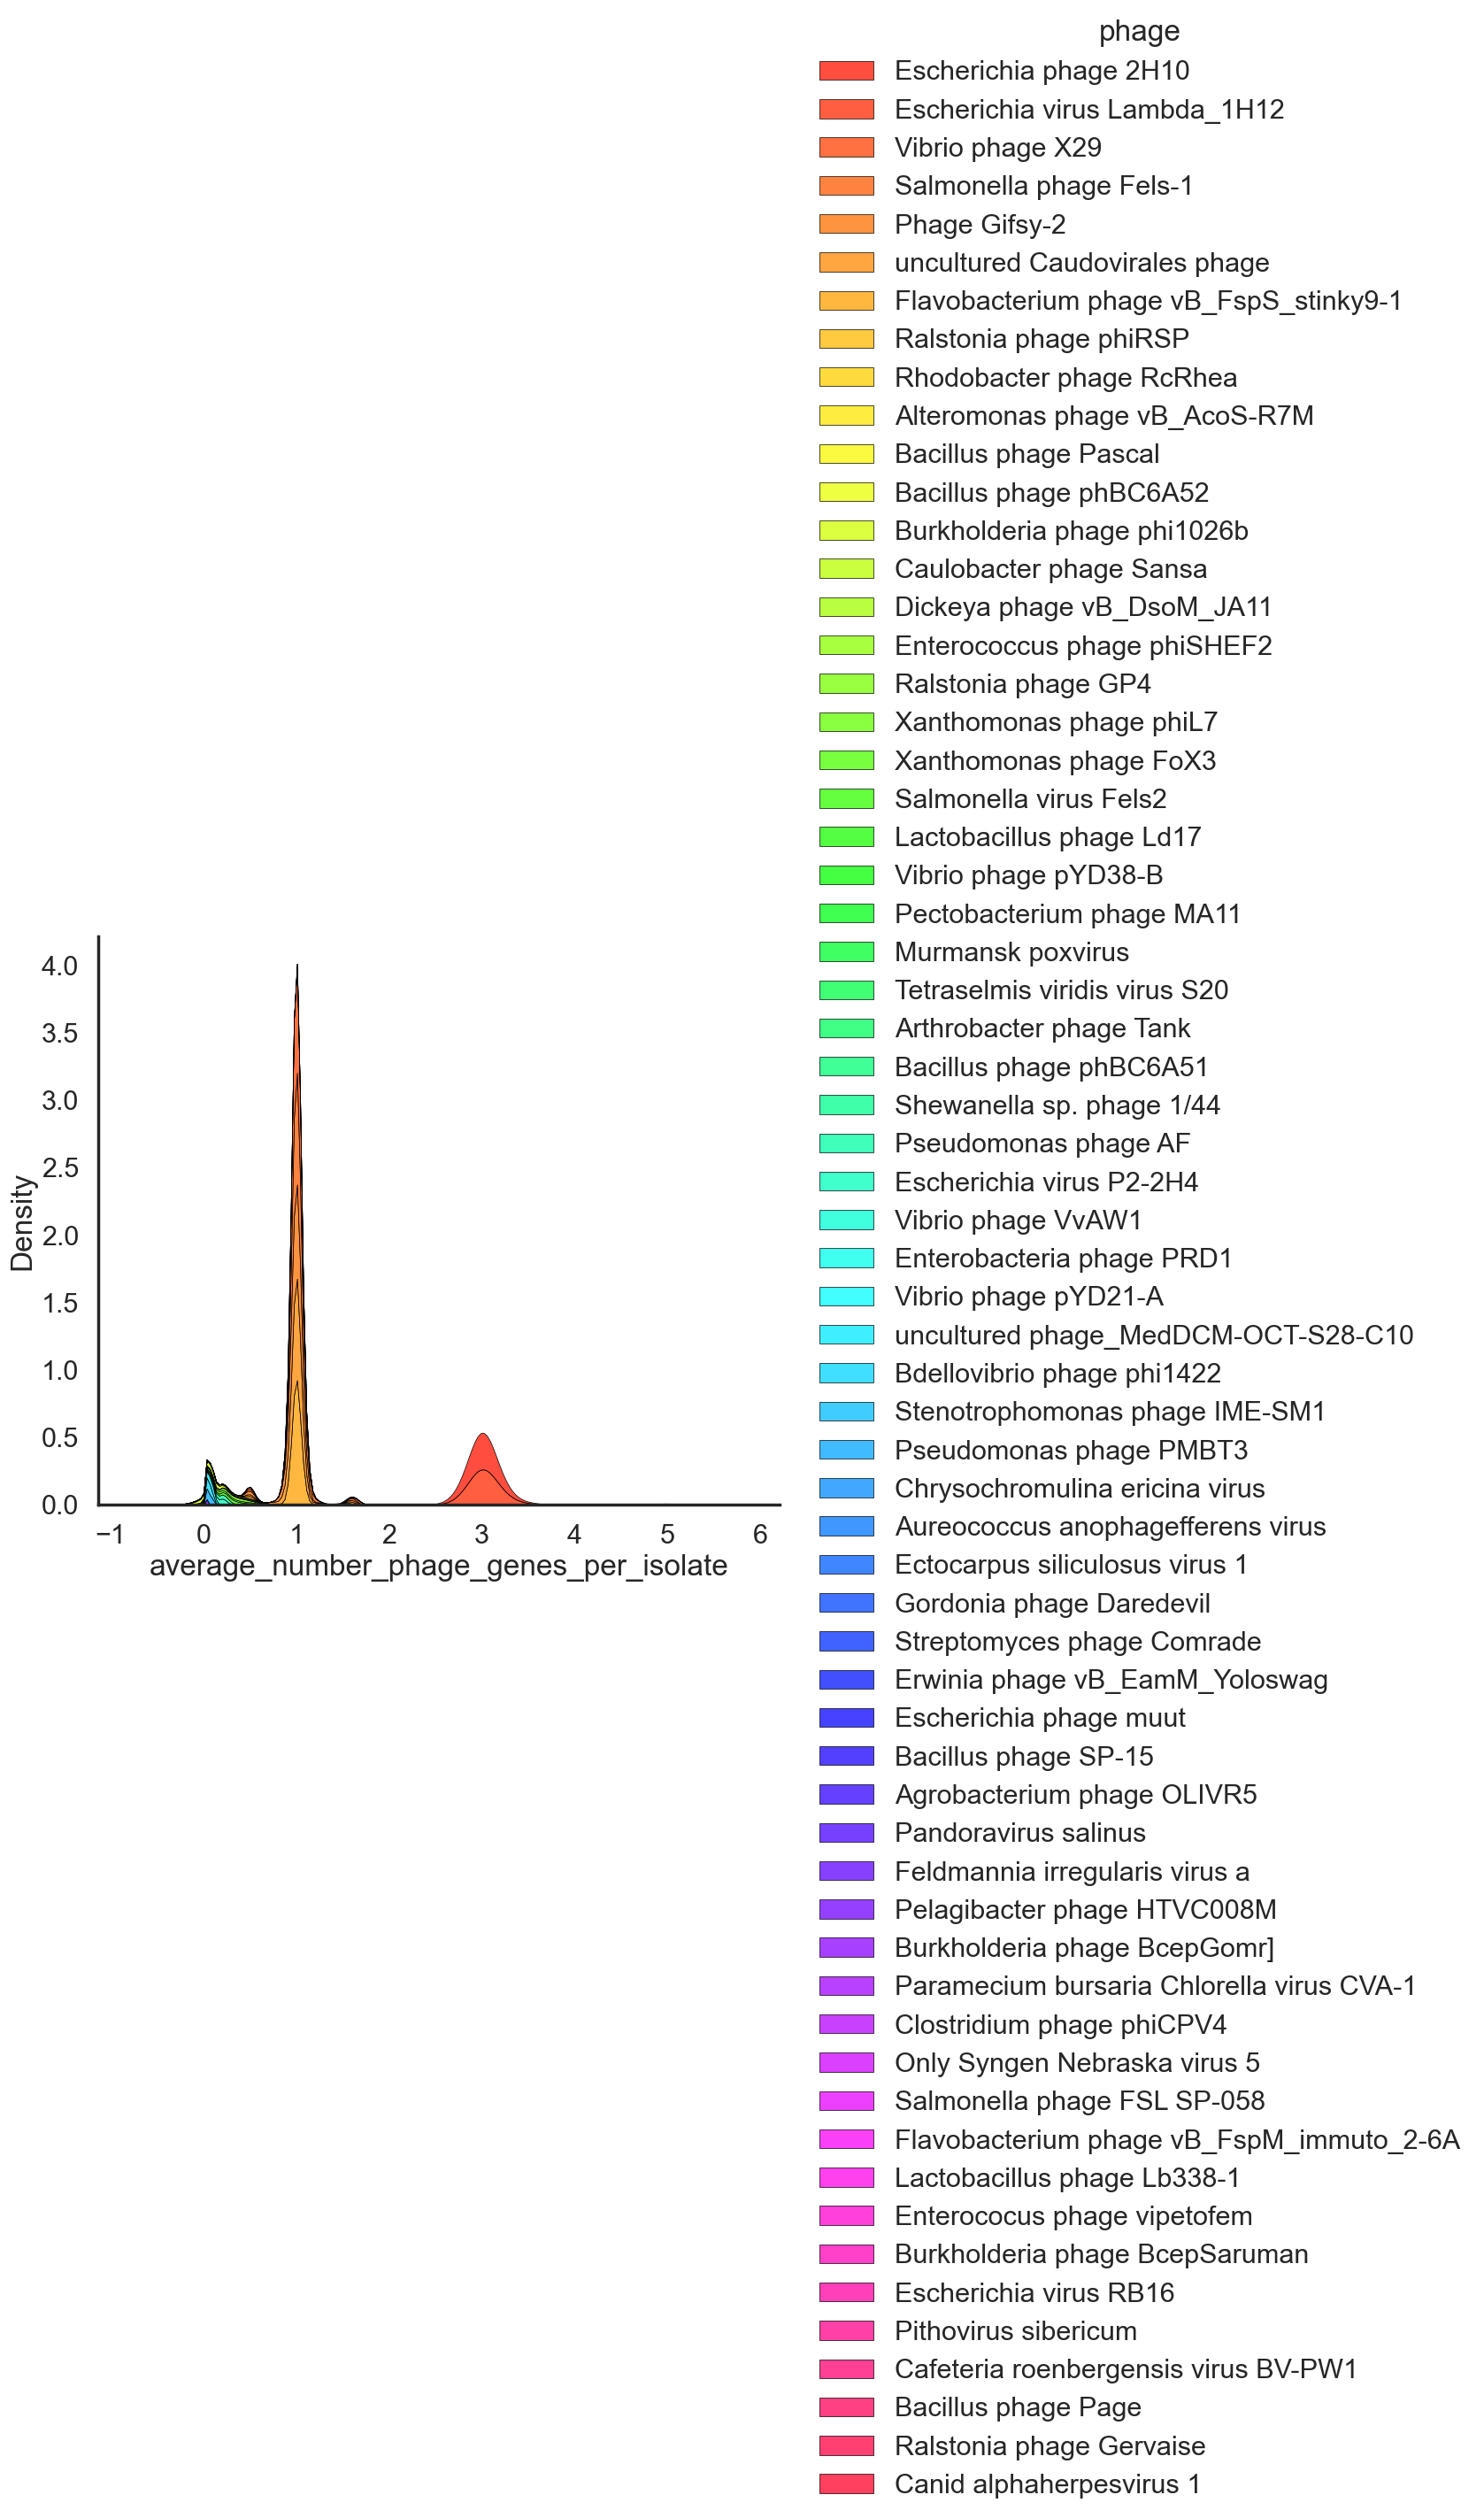

In [159]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='hsv', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_top_phage_gene_counts_time.svg', dpi=150, bbox_inches='tight')

In [160]:
Nissle_ref_highr['phage'].value_counts()

Escherichia phage 2H10                    3
Escherichia virus Lambda_1H12             3
Phage Gifsy-2                             1
Vibrio phage X29                          1
Flavobacterium phage vB_FspS_stinky9-1    1
Salmonella phage Fels-1                   1
uncultured Caudovirales phage             1
Name: phage, dtype: int64

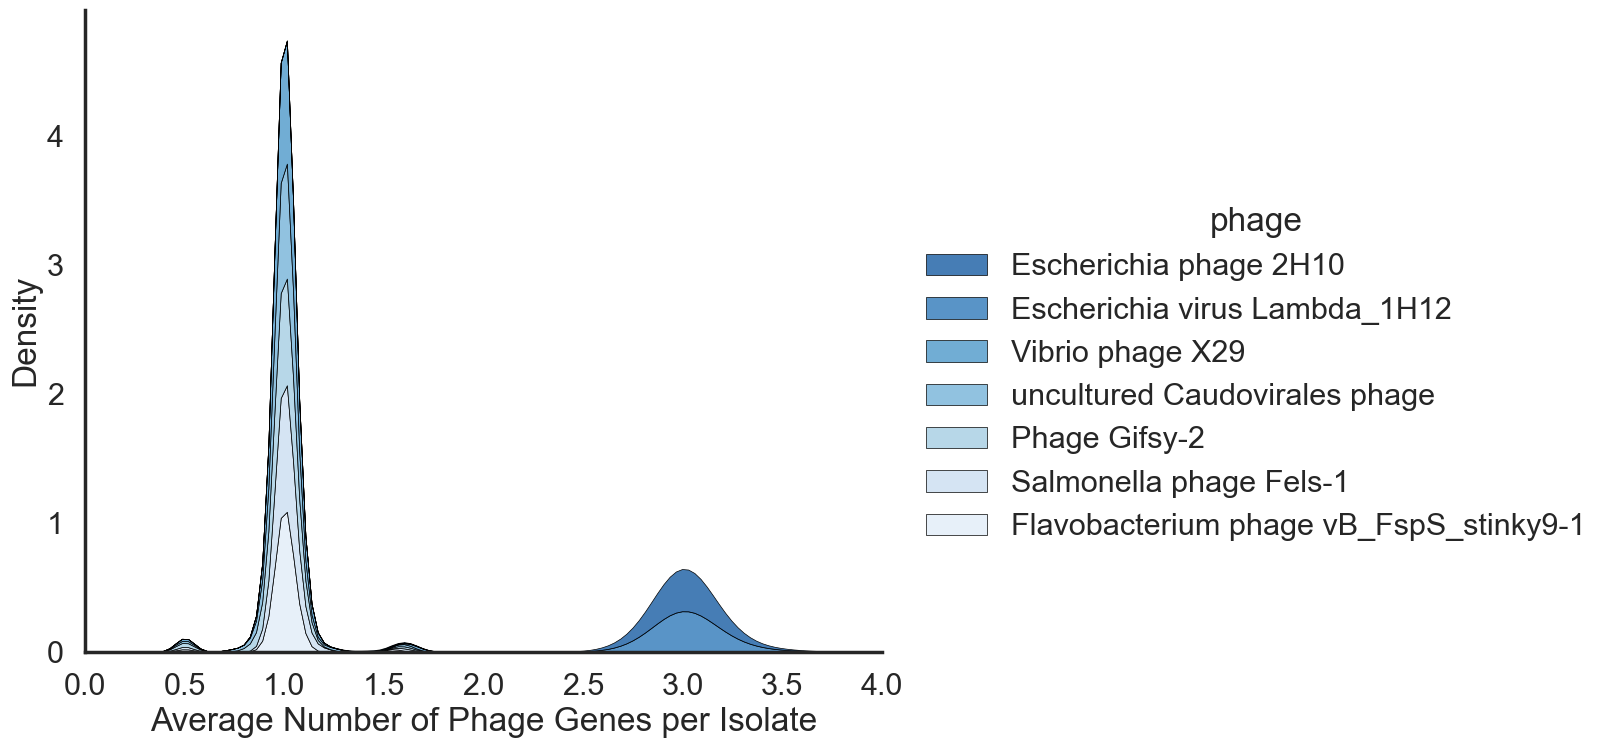

In [161]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm[AZ20_norm.phage.isin(ref_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='Blues_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xlim(0,4)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_ref_phage.svg', dpi=150, bbox_inches='tight')

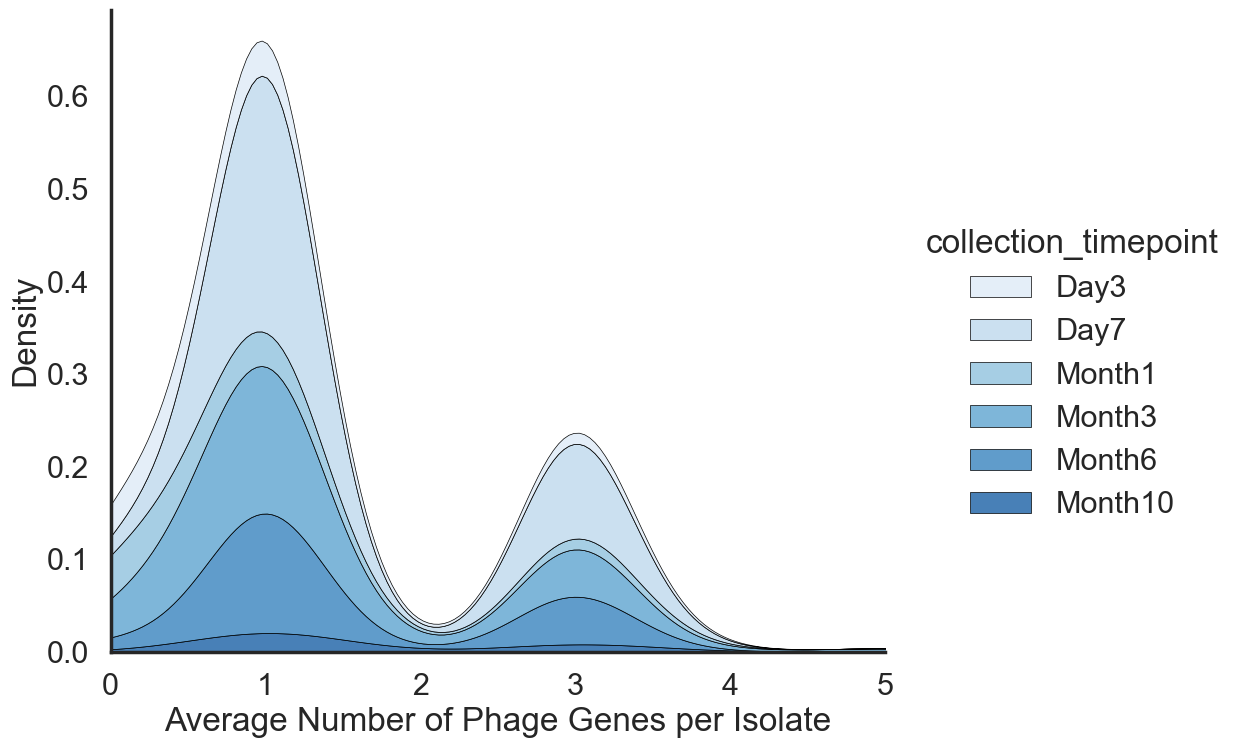

In [192]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues', 
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xlim(0,5)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_avg_all_phagegene_density.svg', dpi=150, bbox_inches='tight')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


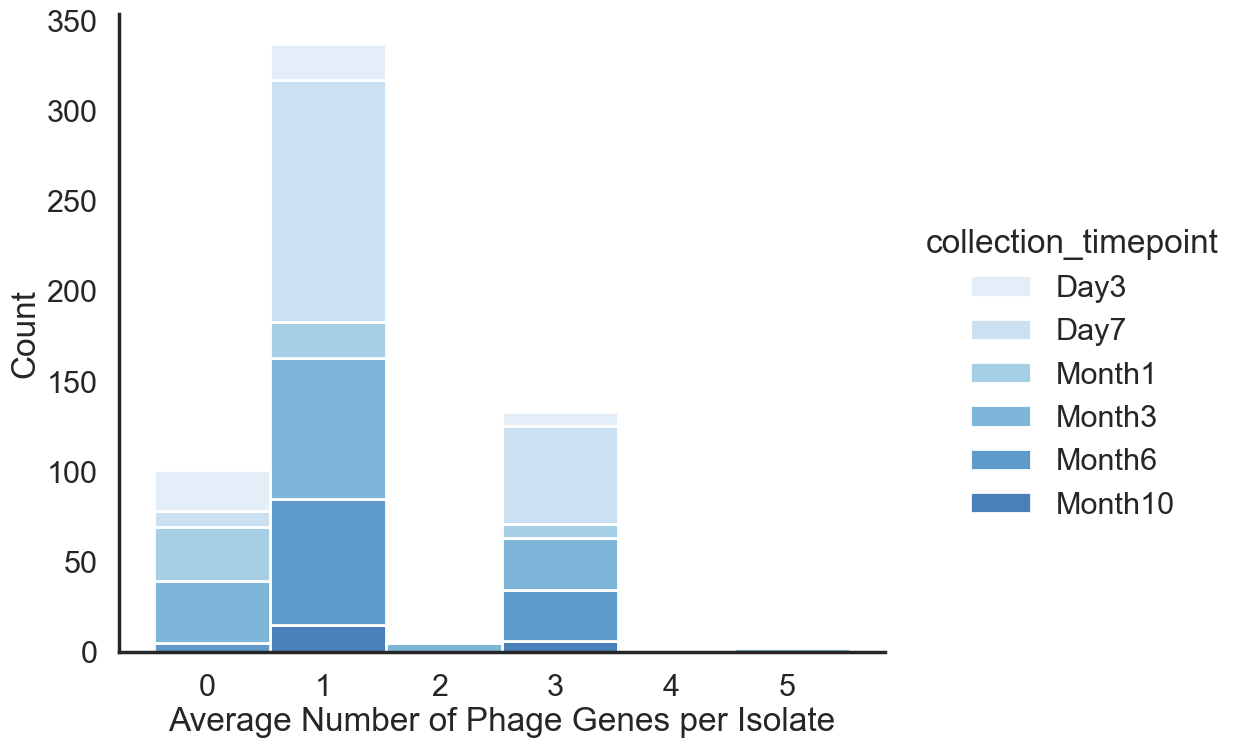

In [191]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues', discrete=True,
            multiple="stack", height=8, aspect=1.2)

plt.xlabel('Average Number of Phage Genes per Isolate')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_avg_all_phagegene_counts.svg', dpi=150, bbox_inches='tight')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


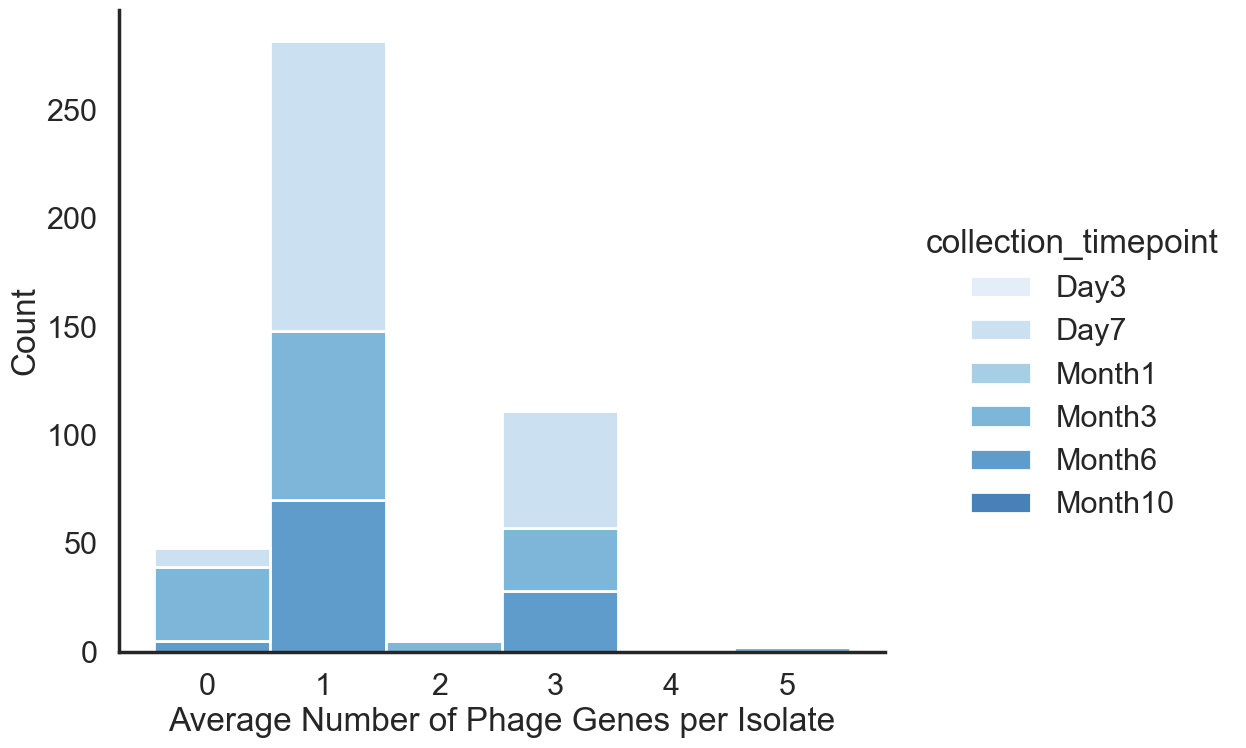

In [193]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm[AZ20_norm.collection_timepoint.isin(['Day7', 'Month3', 'Month6'])].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues', discrete=True,
            multiple="stack", height=8, aspect=1.2)

plt.xlabel('Average Number of Phage Genes per Isolate')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_avg_3tp_phagegene_counts.svg', dpi=150, bbox_inches='tight')

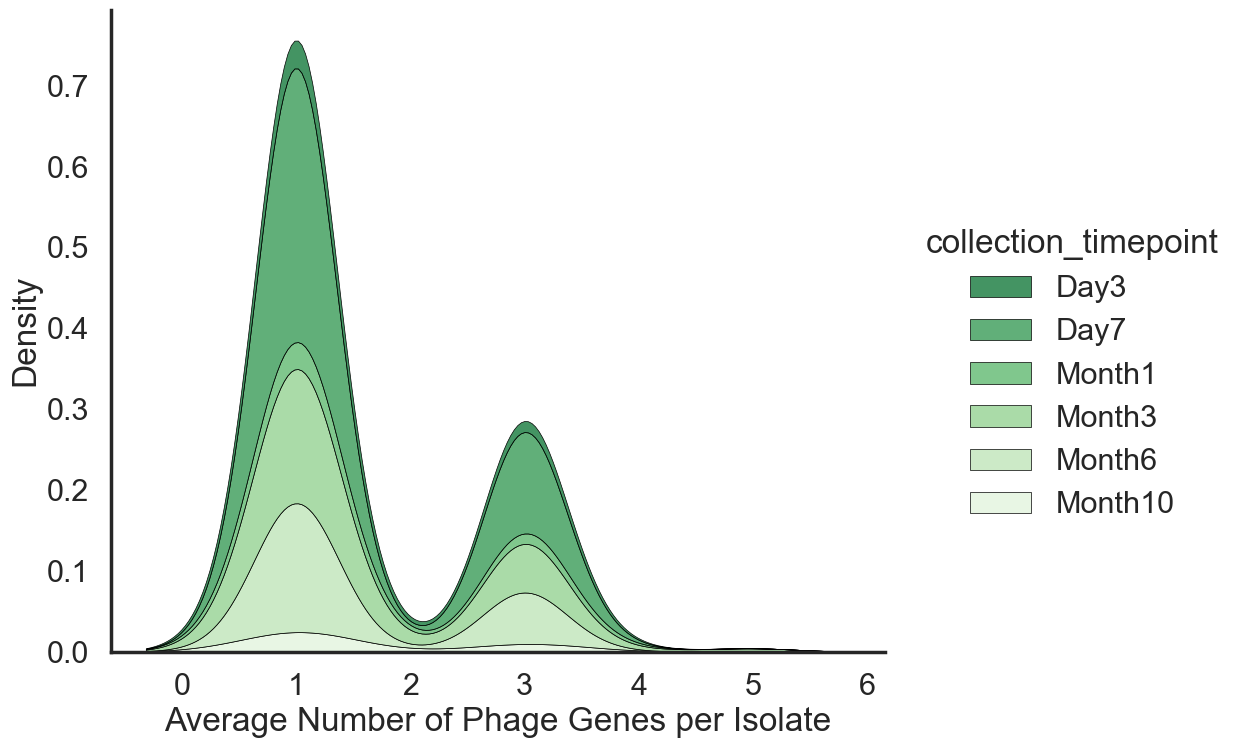

In [163]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm[AZ20_norm.phage.isin(ref_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_ref_phage.svg', dpi=150, bbox_inches='tight')

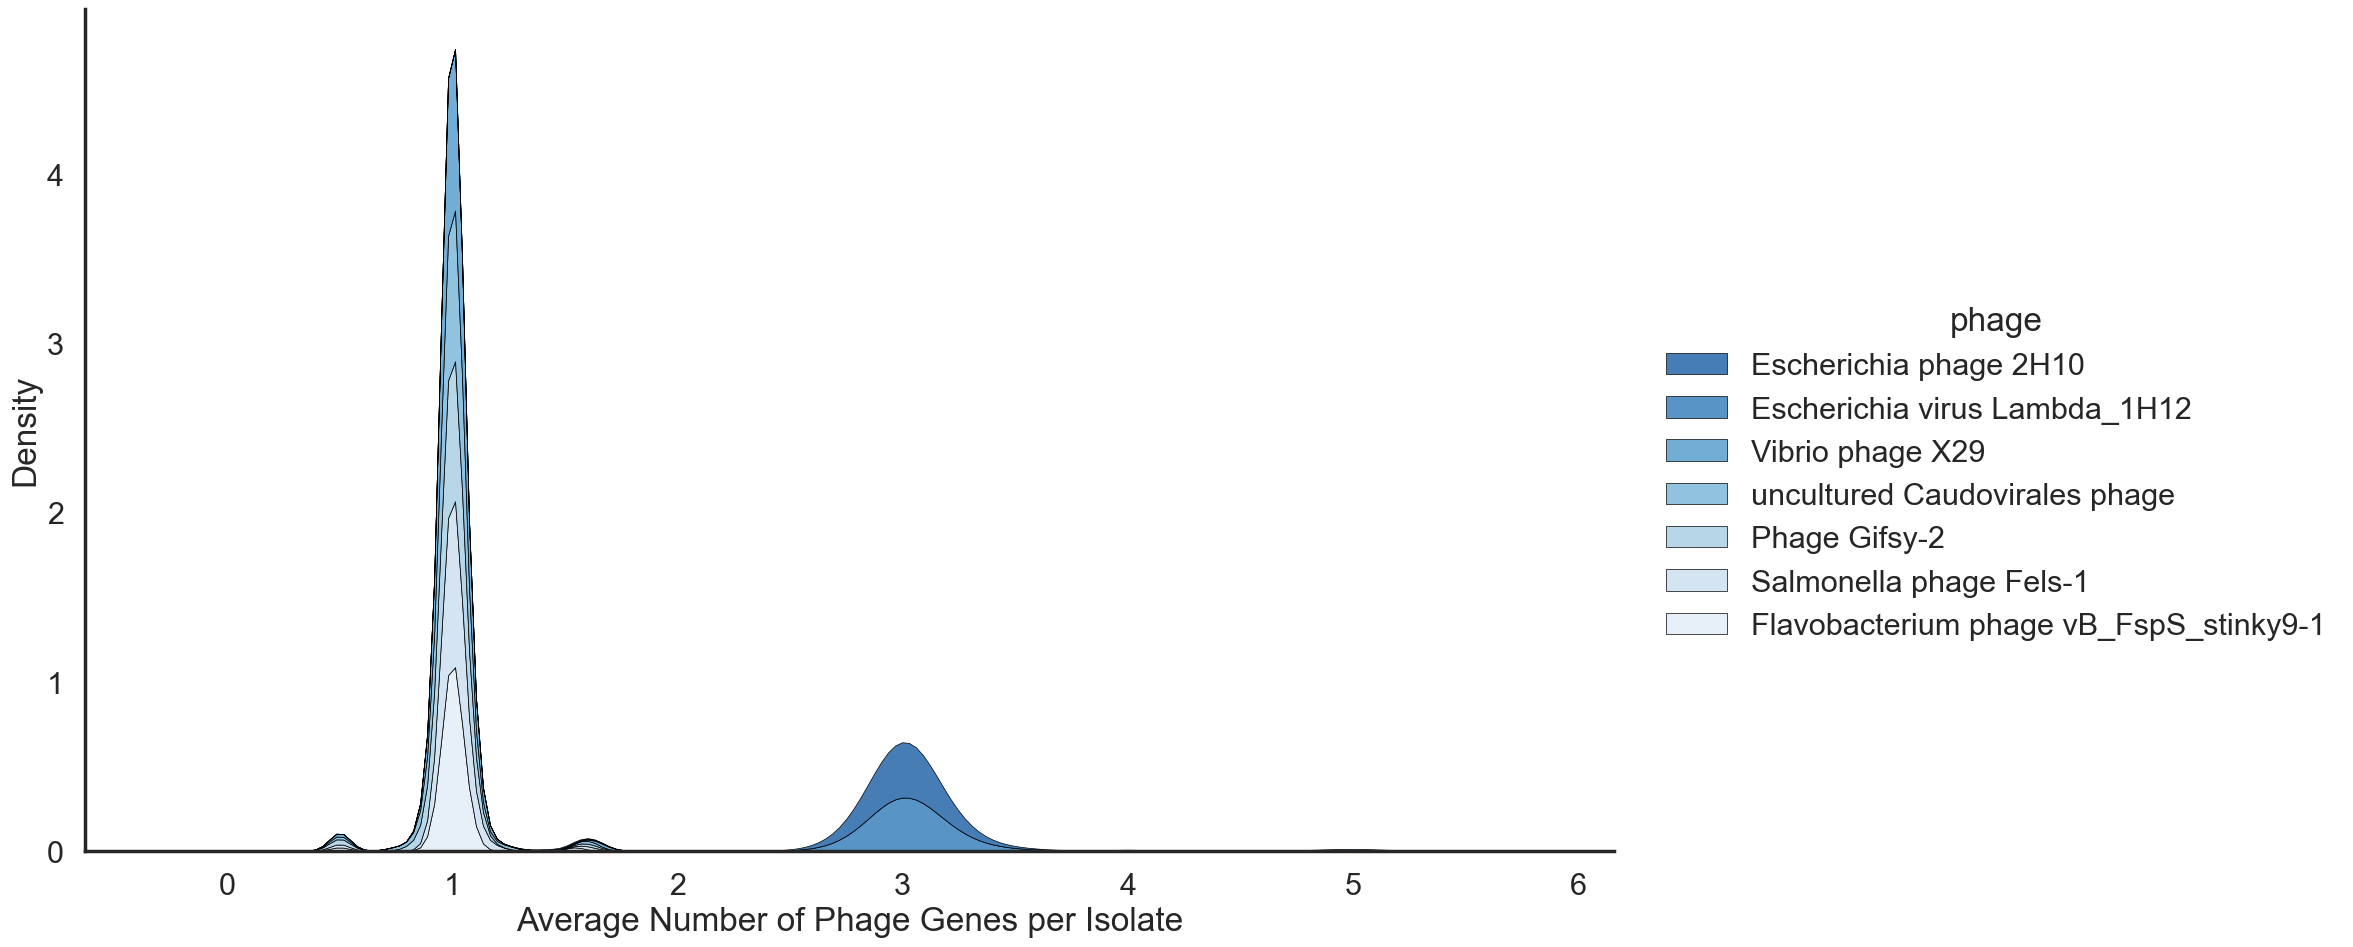

In [164]:
sns.set_style(style="white")

sns.displot(data=AZ20_norm[AZ20_norm.phage.isin(top_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='Blues_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=10, aspect=1.7,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_top_phage.svg', dpi=150, bbox_inches='tight')
#all top phage are same as ref

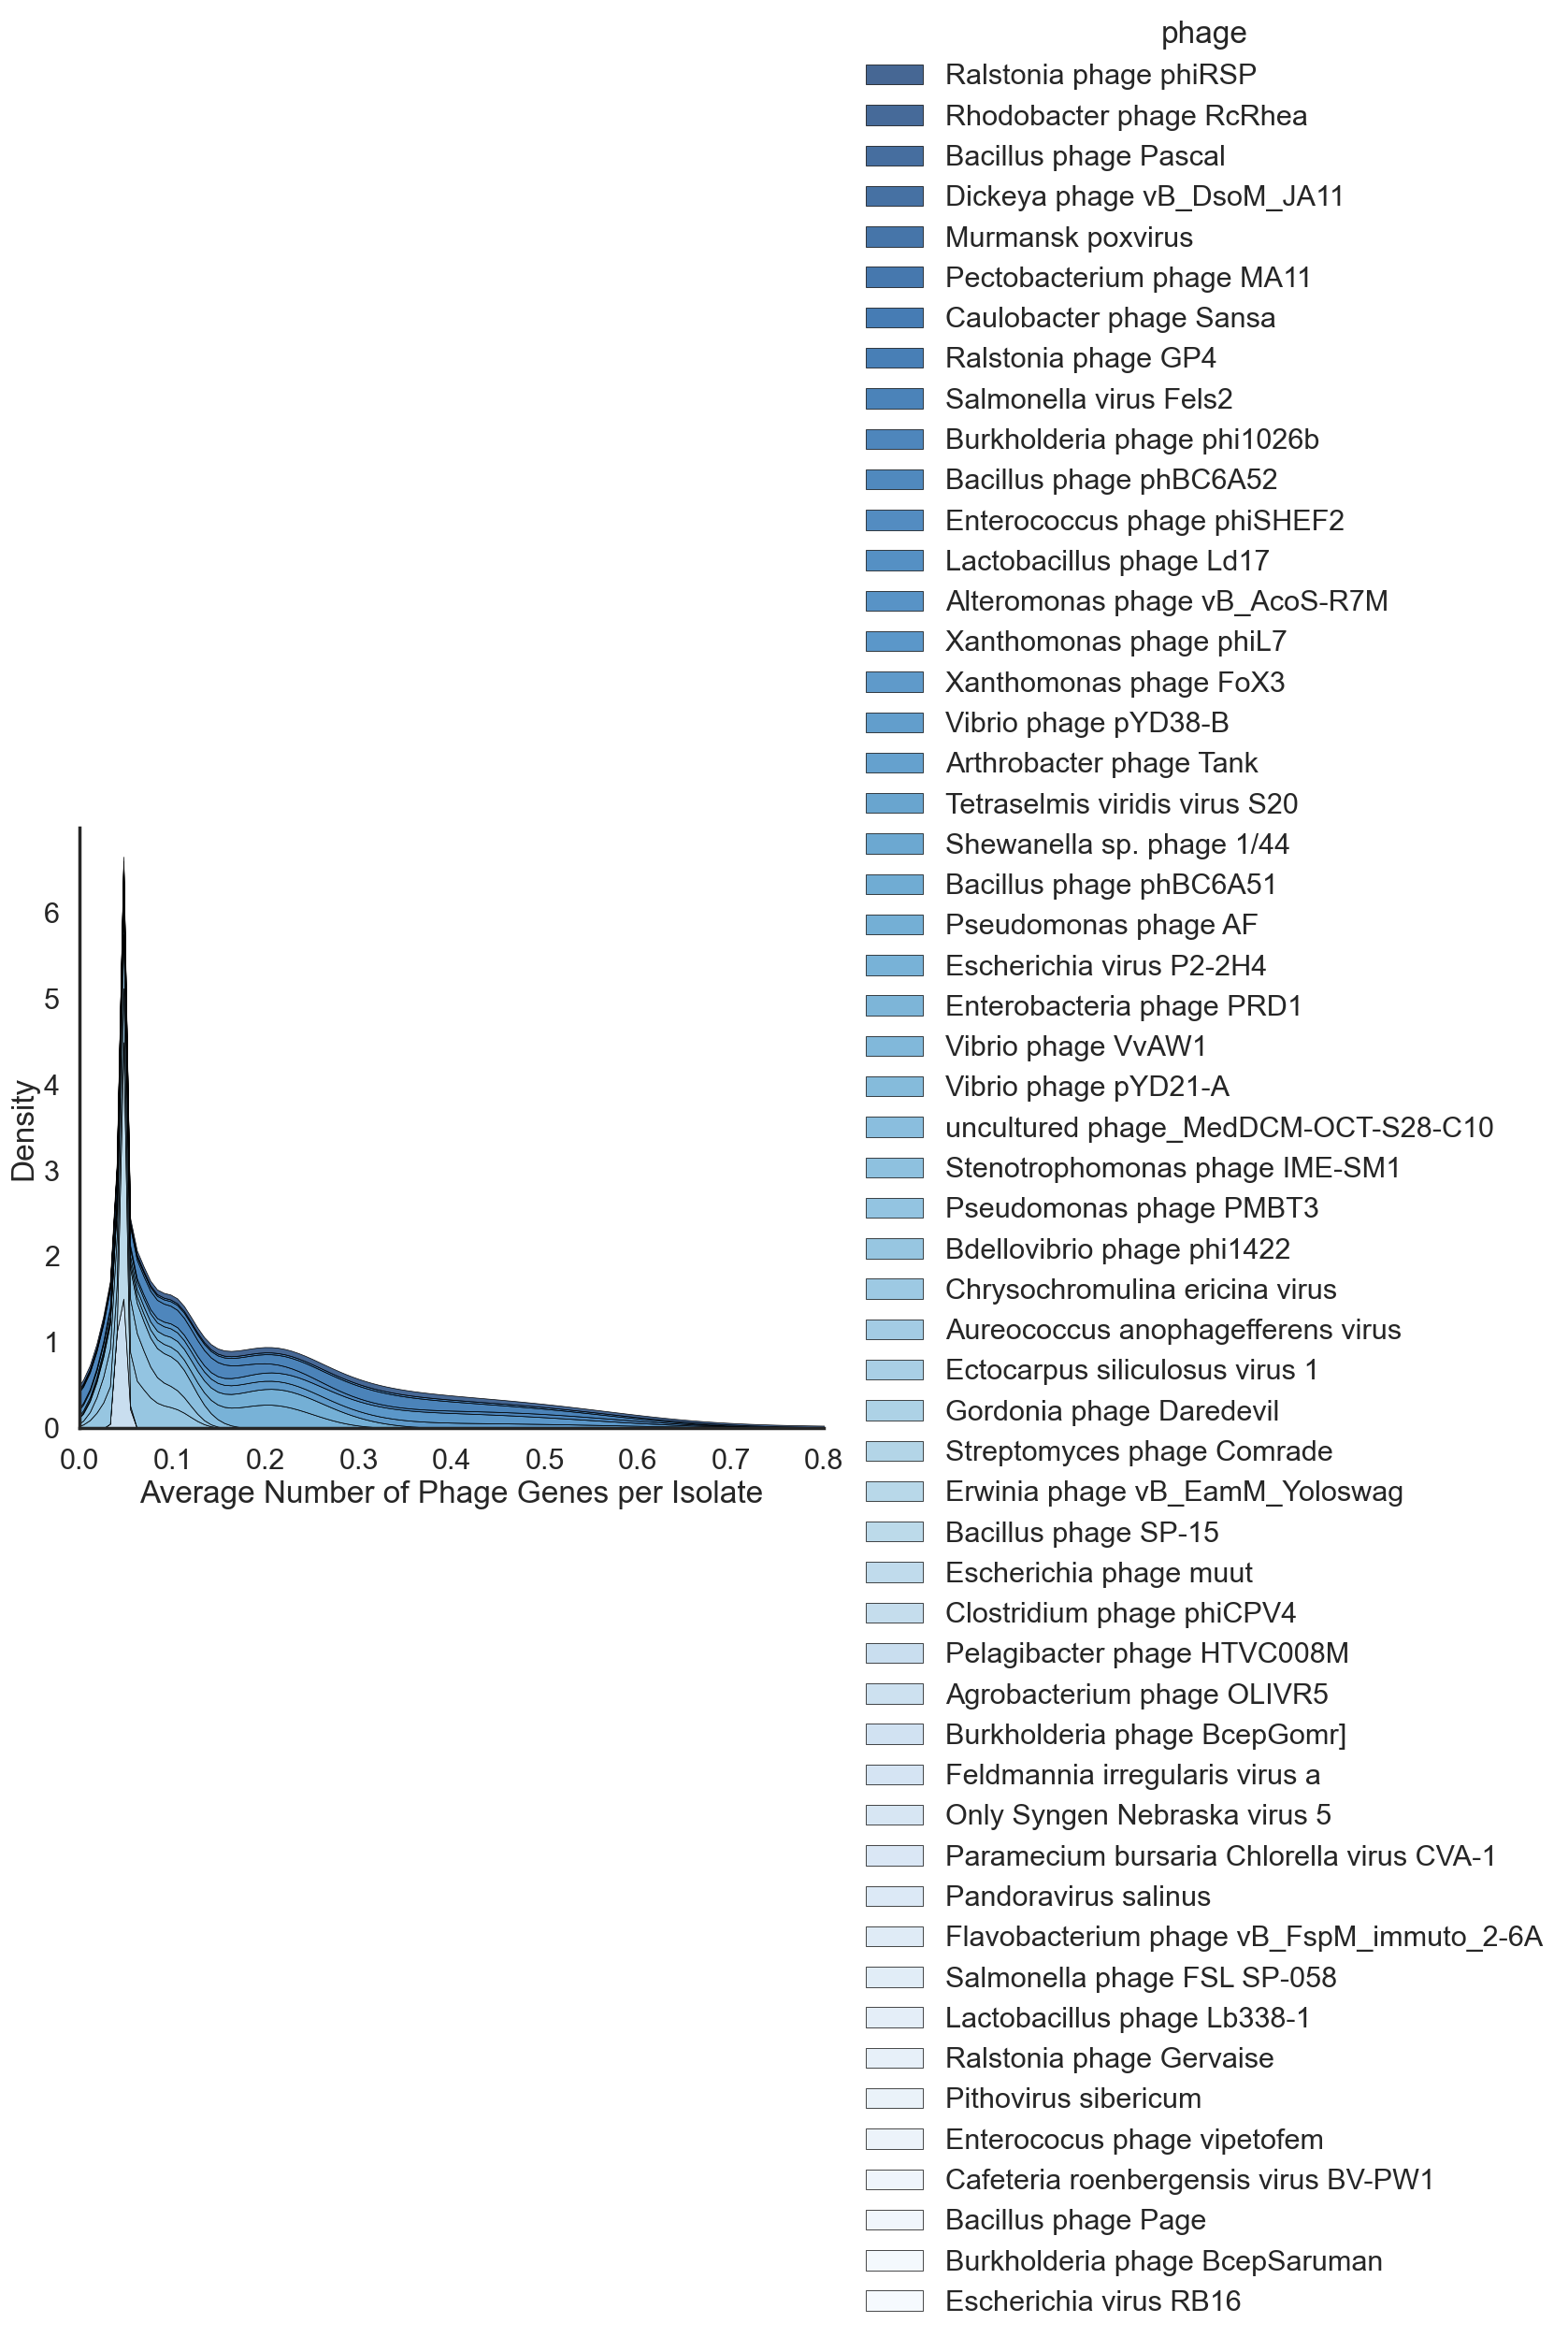

In [165]:

sns.set_style(style="white")

sns.displot(data=AZ20_norm[AZ20_norm.phage.isin(bottom_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='Blues_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 0.82, 0.1))
plt.xlim(0,0.8)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_minor_phage.svg', dpi=150, bbox_inches='tight')

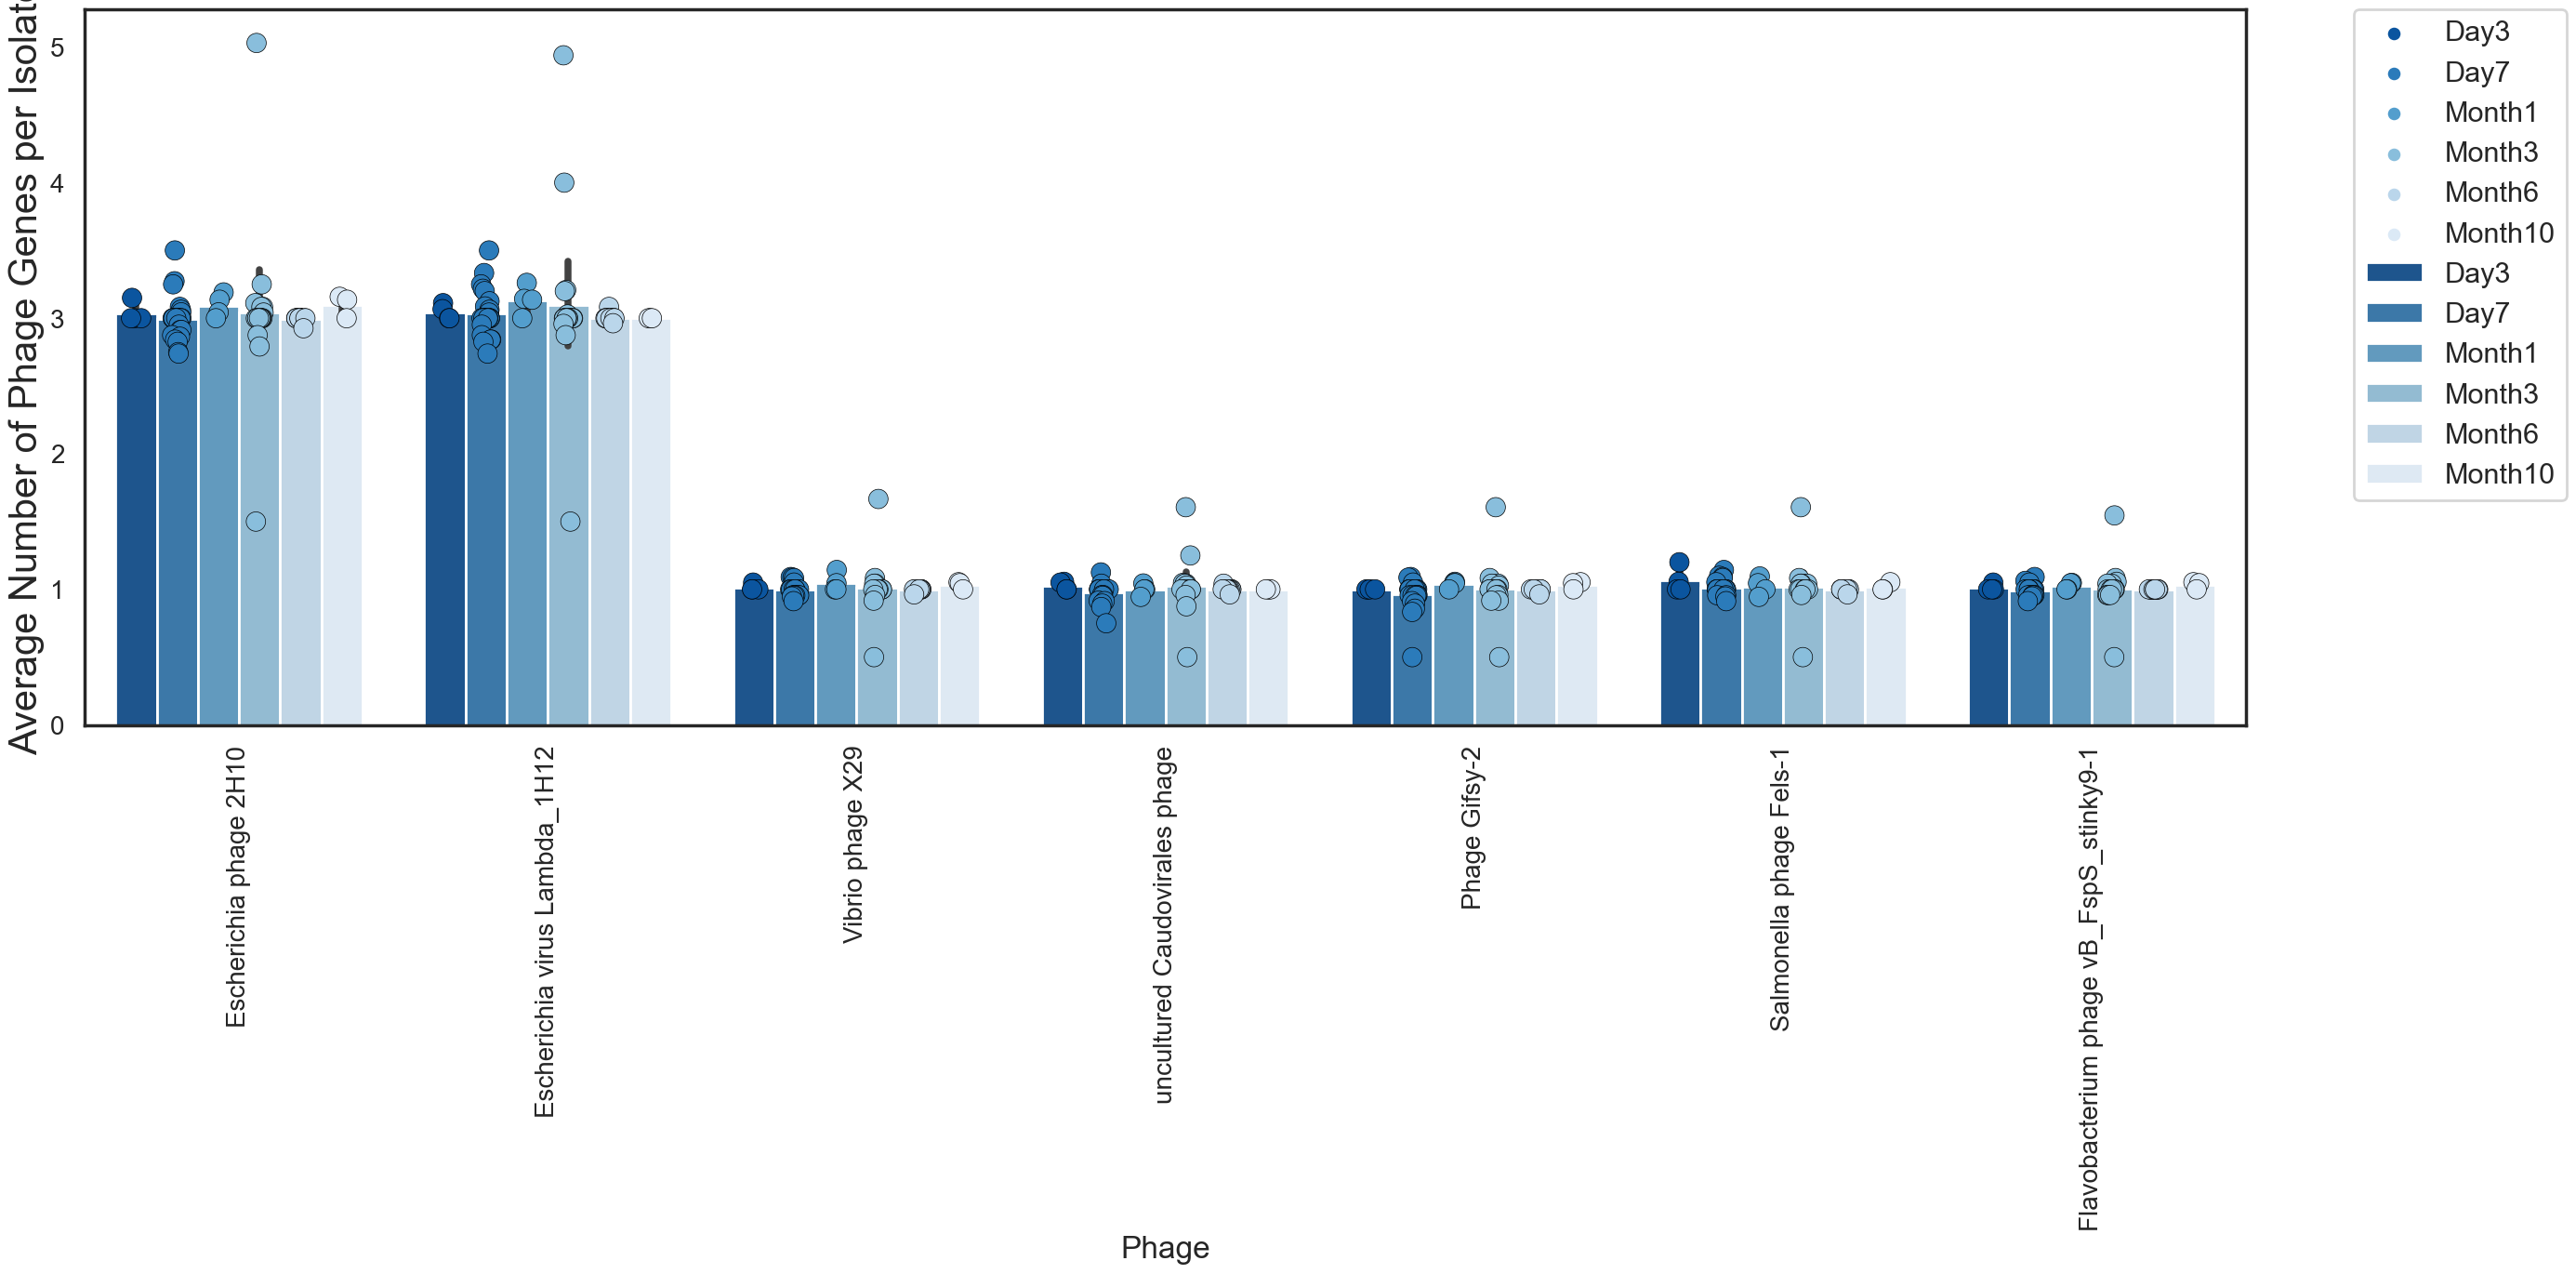

In [166]:
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ20_norm[AZ20_norm.phage.isin(top_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues_r')
sns.stripplot(data=AZ20_norm[AZ20_norm.phage.isin(top_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              dodge=True, size=15, palette='Blues_r', edgecolor='k', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.ylabel('Average Number of Phage Genes per Isolate', fontsize=30)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ20_top_phage_norm_time.svg', dpi=150, bbox_inches='tight')

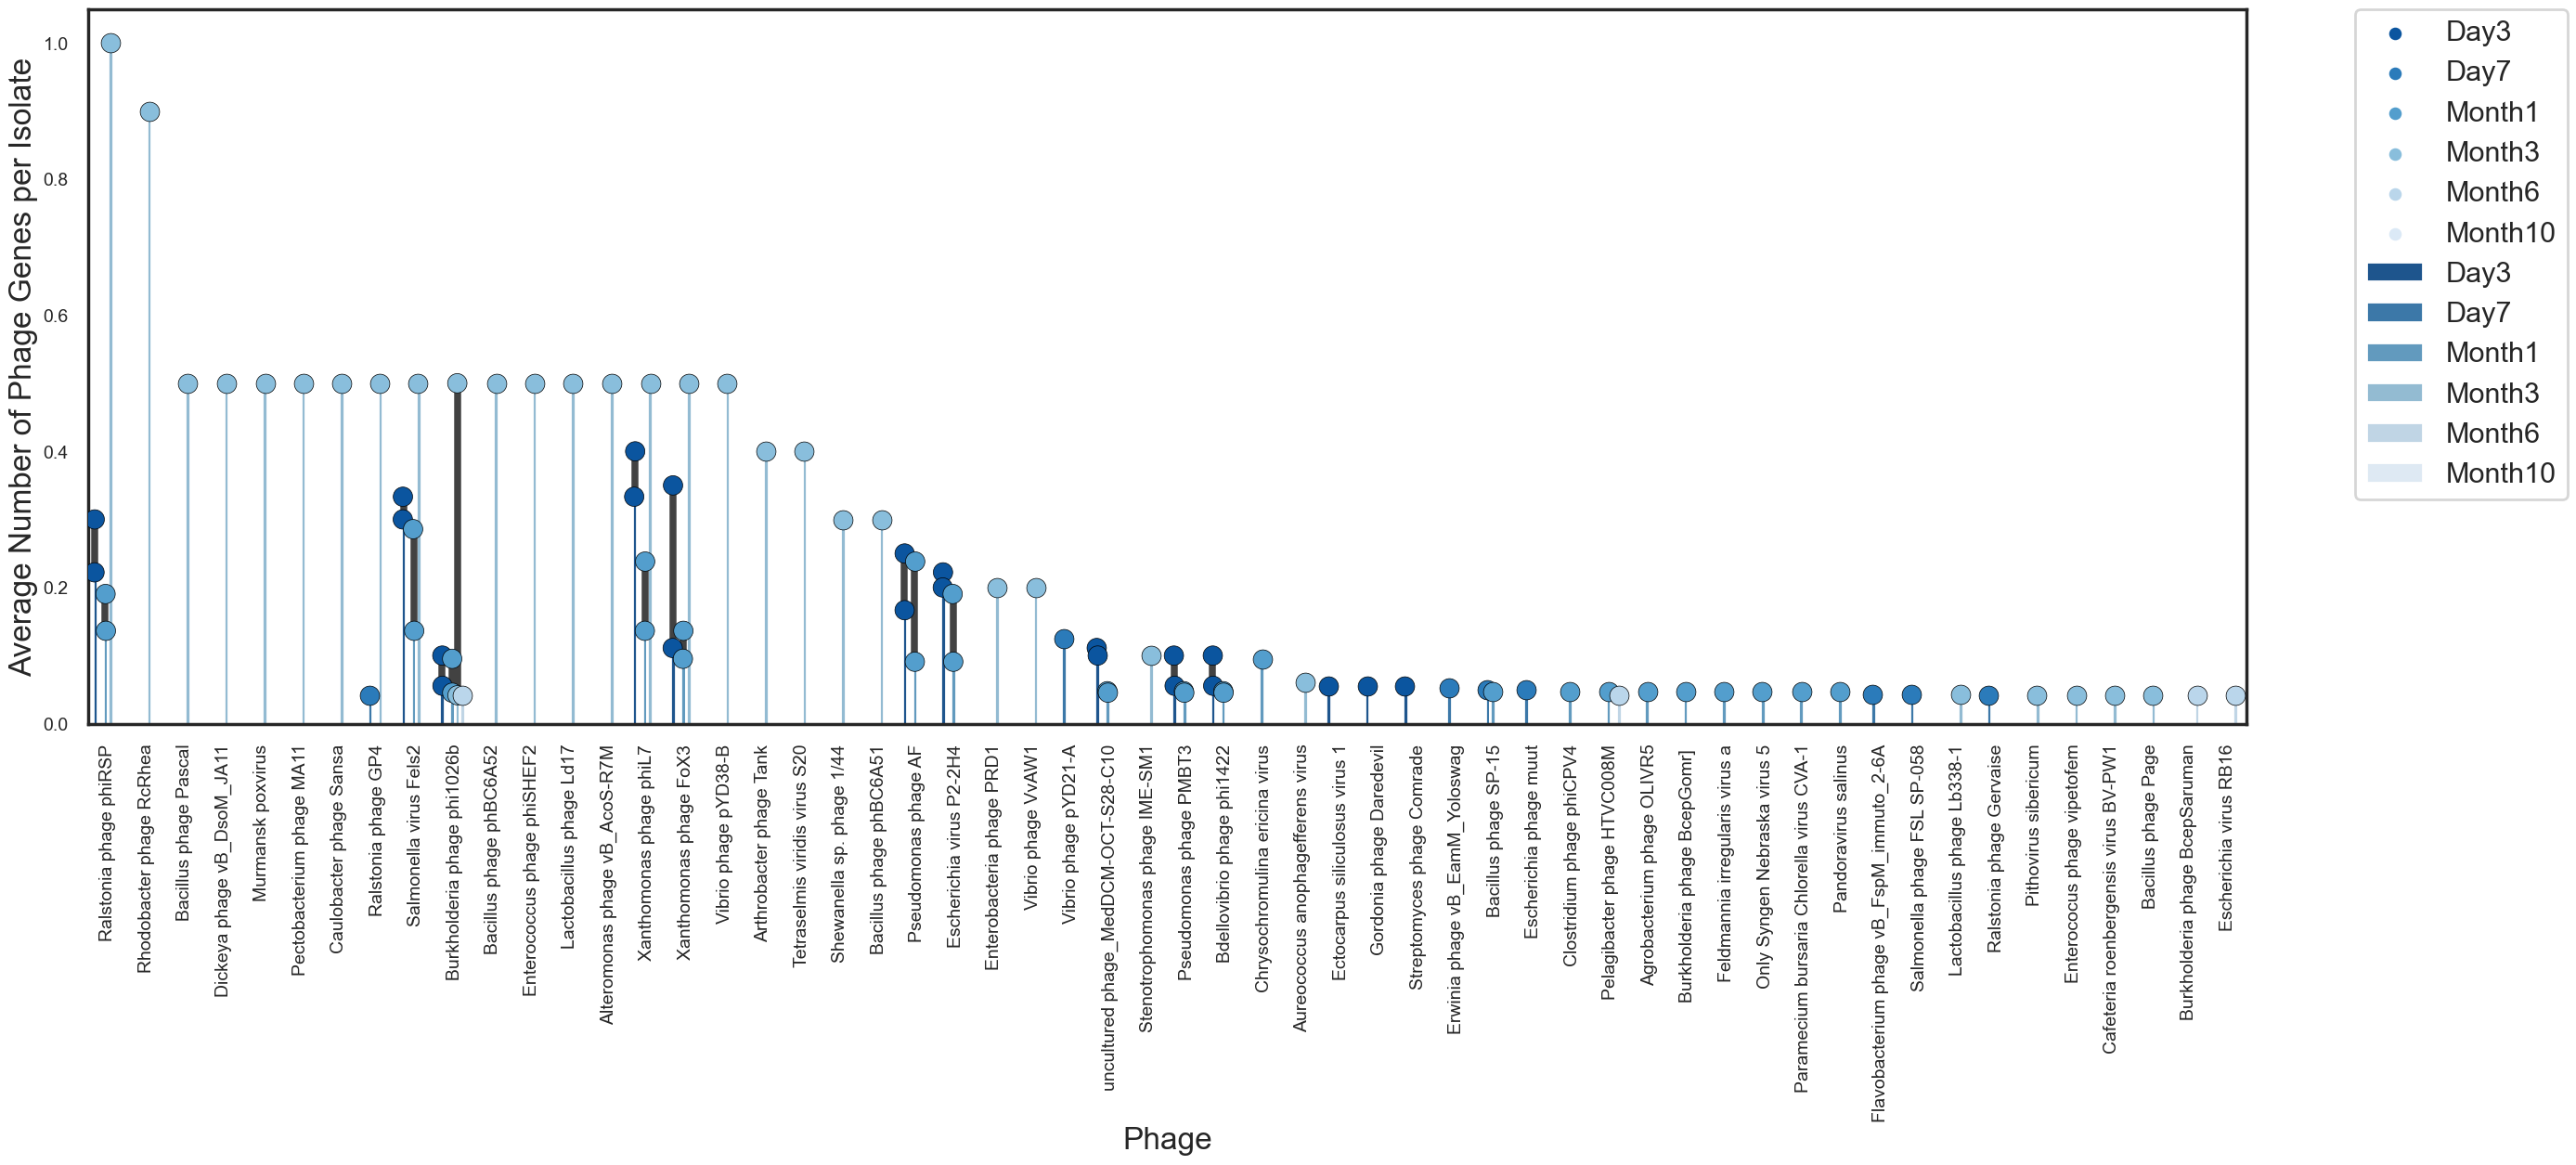

In [167]:
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ20_norm[AZ20_norm.phage.isin(bottom_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues_r')
sns.stripplot(data=AZ20_norm[AZ20_norm.phage.isin(bottom_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              dodge=True, size=15, palette='Blues_r', edgecolor='k', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Average Number of Phage Genes per Isolate', fontsize=24)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_bottom_phage_norm_time_all.svg', dpi=150, bbox_inches='tight')

In [168]:
AZ20_bottom_mult_tp = AZ20_norm[AZ20_norm.phage.isin(bottom_phage)]
v=pd.crosstab(AZ20_bottom_mult_tp.phage,AZ20_bottom_mult_tp.collection_timepoint)
vv = v[v.ne(0).sum(1)>1].replace(0,np.nan).stack()
vv.reset_index().phage.unique()

array(['Bacillus phage SP-15', 'Bdellovibrio phage phi1422',
       'Burkholderia phage phi1026b', 'Escherichia virus P2-2H4',
       'Pelagibacter phage HTVC008M', 'Pseudomonas phage AF',
       'Pseudomonas phage PMBT3', 'Ralstonia phage GP4',
       'Ralstonia phage phiRSP', 'Salmonella virus Fels2',
       'Xanthomonas phage FoX3', 'Xanthomonas phage phiL7',
       'uncultured phage_MedDCM-OCT-S28-C10'], dtype=object)

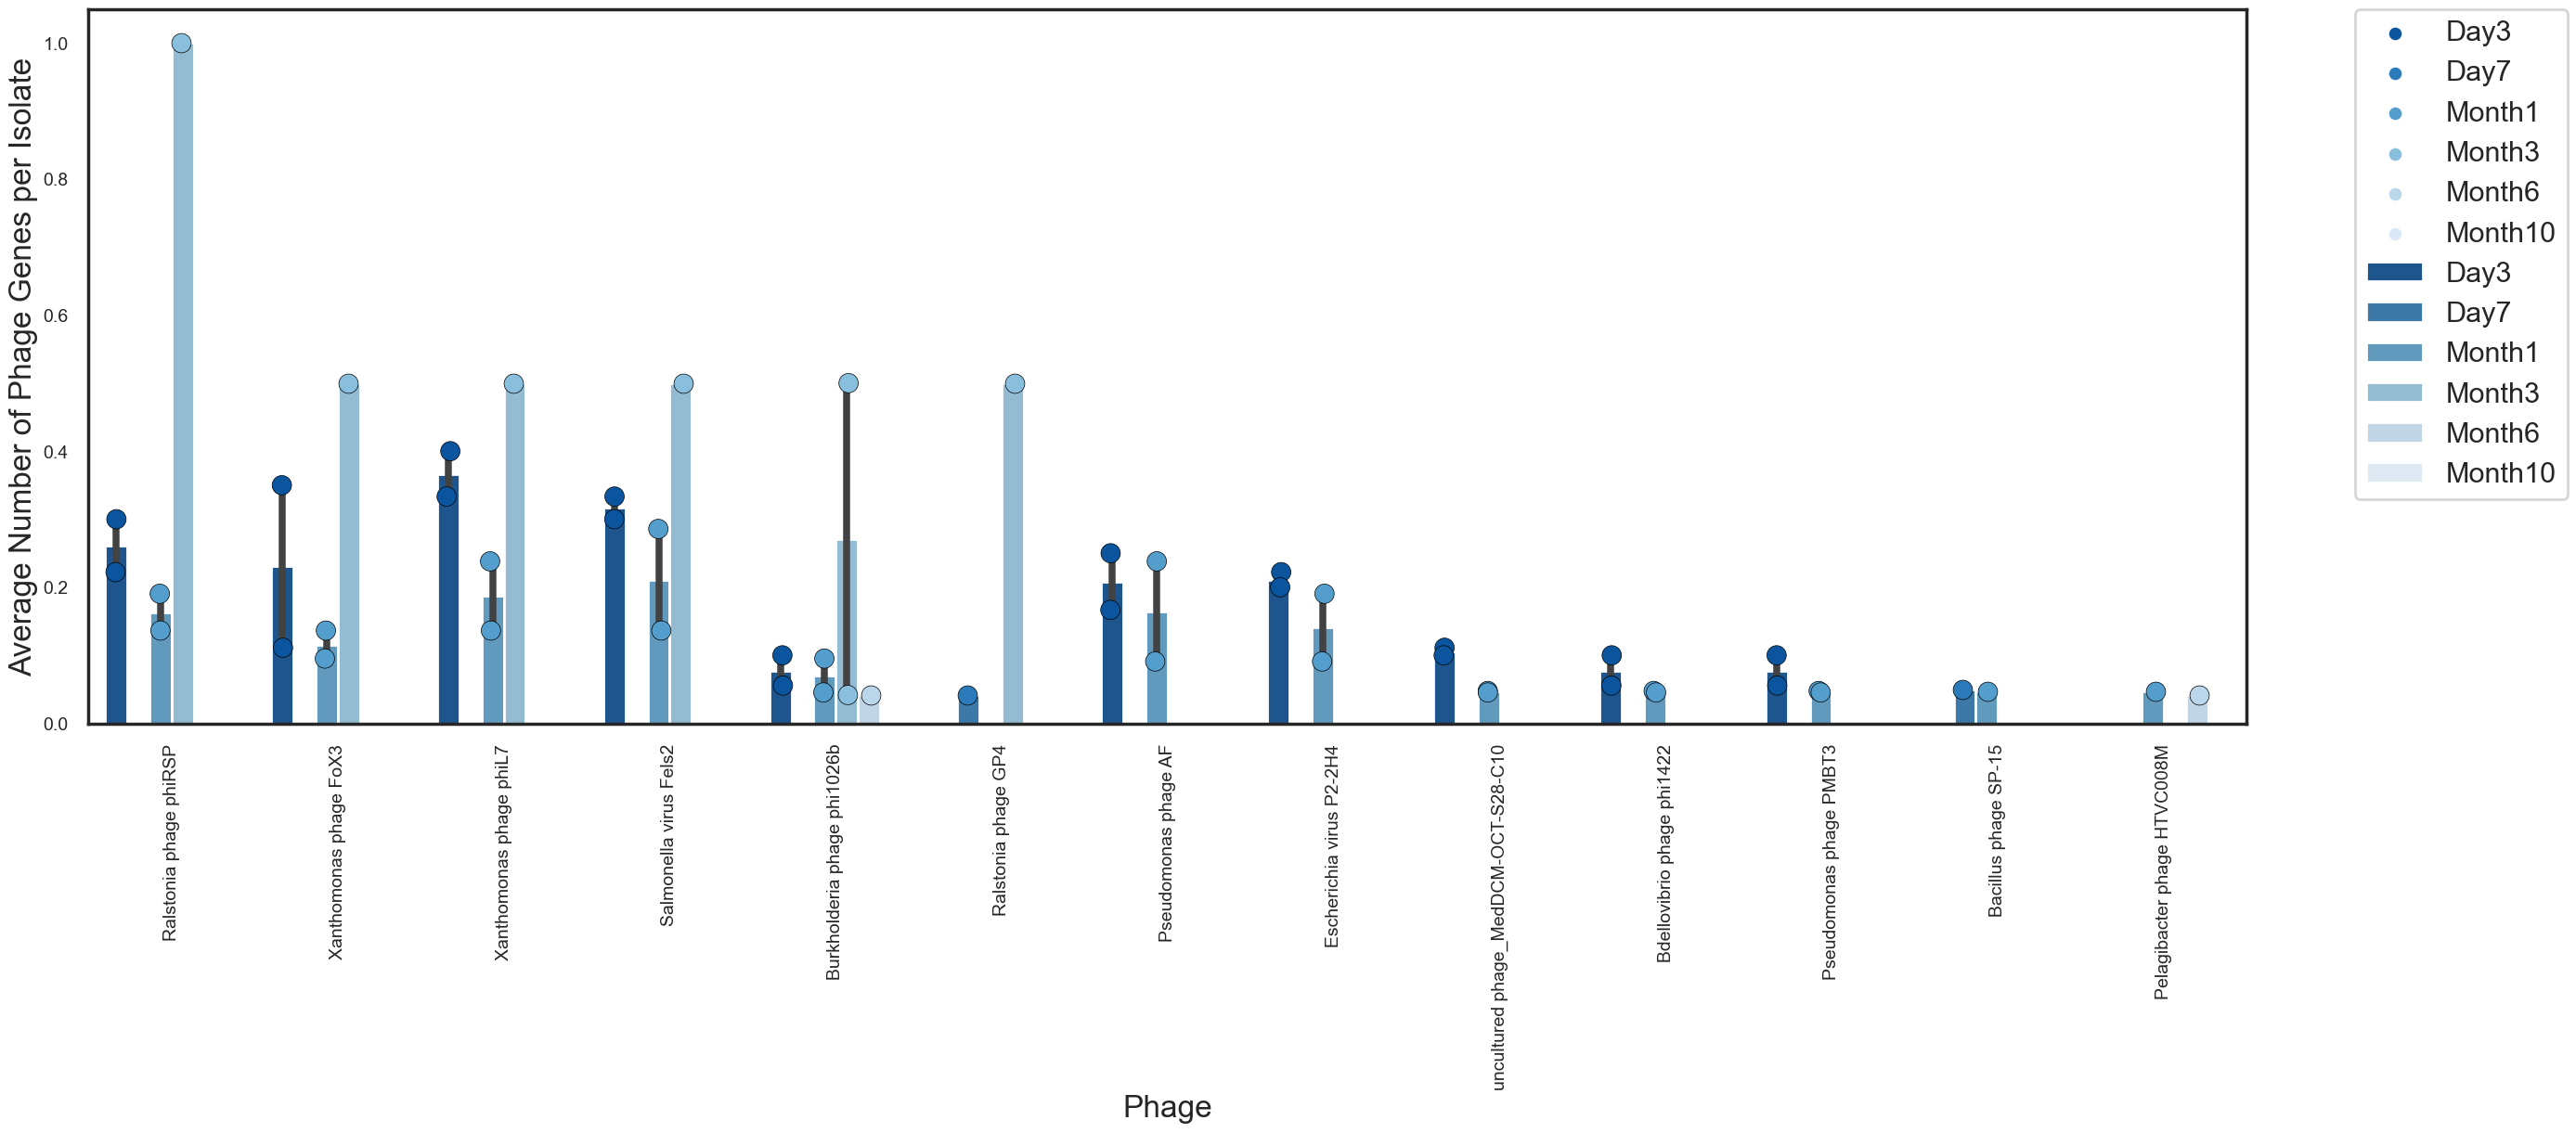

In [169]:
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ20_norm[AZ20_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Blues_r')
sns.stripplot(data=AZ20_norm[AZ20_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              dodge=True, size=15, palette='Blues_r', edgecolor='k', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Average Number of Phage Genes per Isolate', fontsize=24)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_bottom_phage_norm_mult_tp.svg', dpi=150, bbox_inches='tight')

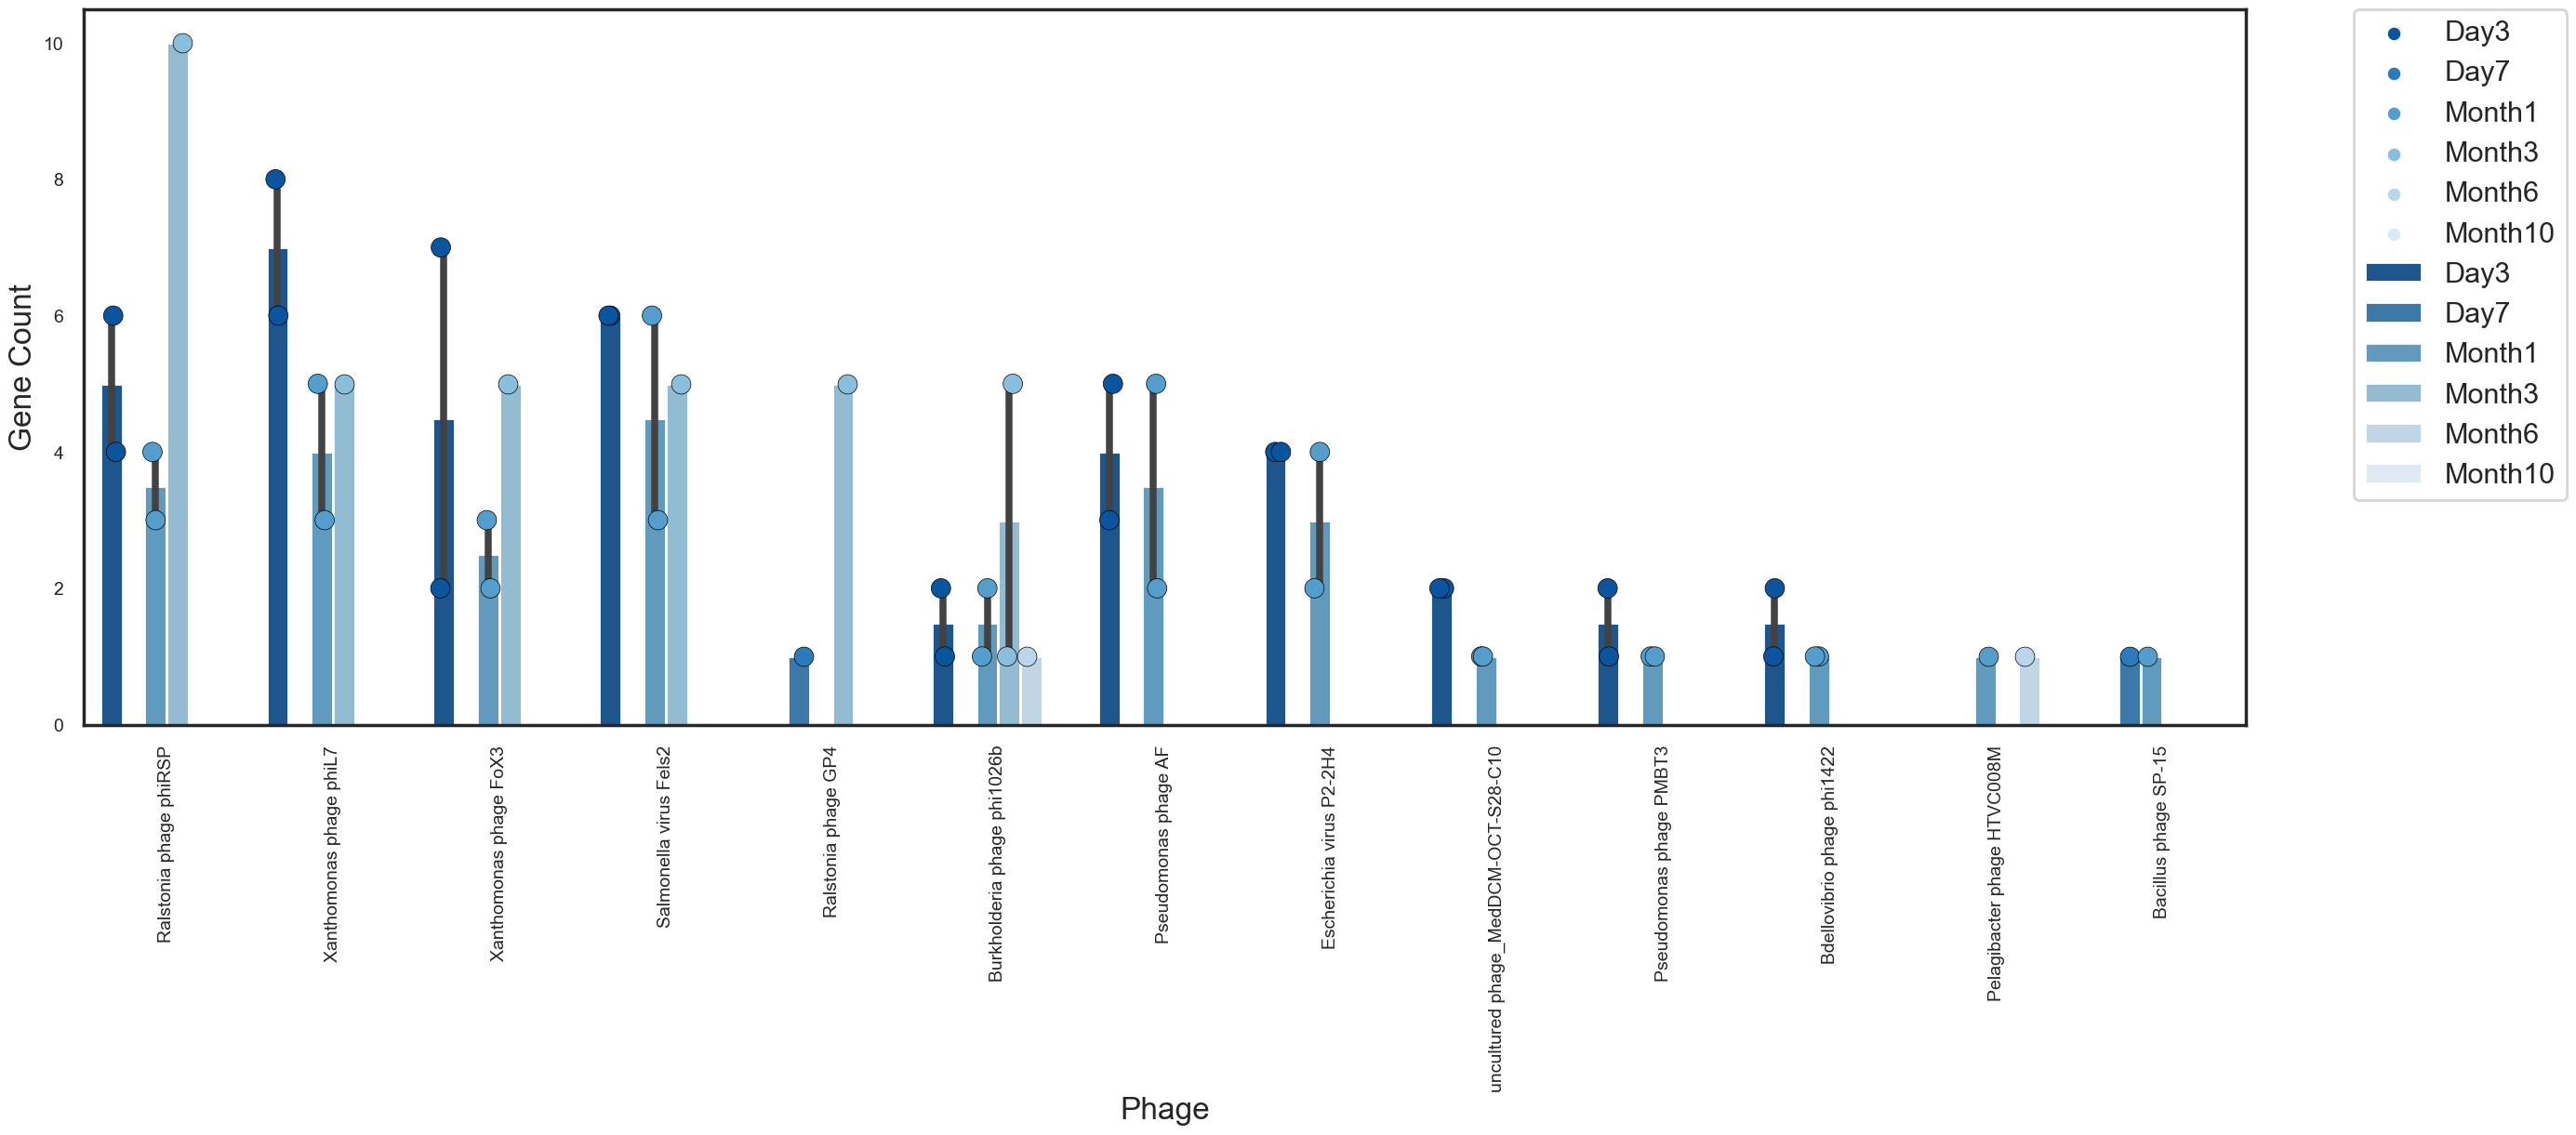

In [170]:
#COUNTS! Non-normalized
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ20_norm[AZ20_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('gene', ascending=False),
              x='phage', y='gene', hue='collection_timepoint', 
              palette='Blues_r')
sns.stripplot(data=AZ20_norm[AZ20_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('gene', ascending=False),
              x='phage', y='gene', hue='collection_timepoint', 
              dodge=True, size=15, palette='Blues_r', edgecolor='k', linewidth=0.5, jitter=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Gene Count', fontsize=24)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ20_bottom_phage_counts_mult_tp.svg', dpi=150, bbox_inches='tight')

## Make a biom file

In [171]:
AZ20_biom = AZ20_phage.reset_index()
AZ20_biom_table = AZ20_biom[['viral_id', 'index']].copy()
AZ20_biom_table.head()

viral_id        index
0  YP_001700644.1  23B_Day7_11
1  YP_009909740.1  23B_Day7_11
2  YP_009043891.1  23B_Day7_11
3  YP_009909752.1  23B_Day7_11
4  YP_009855362.1  23B_Day7_11

In [172]:
AZ20_biom_table['index'] = AZ20_biom_table['index'].apply(lambda x: x.replace('_','.'))

In [173]:
AZ20_biom_table['#OTU ID'] = '12986.' + AZ20_biom_table['index'].astype(str)

In [174]:
AZ20_biom_table.drop(columns=['index'], inplace=True)

In [175]:
AZ20_biom_table.head()

viral_id            #OTU ID
0  YP_001700644.1  12986.23B.Day7.11
1  YP_009909740.1  12986.23B.Day7.11
2  YP_009043891.1  12986.23B.Day7.11
3  YP_009909752.1  12986.23B.Day7.11
4  YP_009855362.1  12986.23B.Day7.11

In [176]:
AZ20_biom_table2 = AZ20_biom_table.groupby(AZ20_biom_table.columns.tolist(),as_index=False).size()
AZ20_biom_table2.head()

viral_id               #OTU ID  size
0  NP_077671.1     12986.23LL.Day3.8     1
1  NP_852555.1  12986.28LL.Month3.17     1
2  NP_852555.1  12986.28LL.Month3.21     1
3  NP_852555.1  12986.28LL.Month3.24     1
4  NP_852561.1  12986.28LL.Month3.14     1

In [177]:
AZ20_biom_table2 = AZ20_biom_table.groupby(AZ20_biom_table.columns.tolist()).size().reset_index().rename(columns={0:'counts'})
AZ20_biom_table2.head()

viral_id               #OTU ID  counts
0  NP_077671.1     12986.23LL.Day3.8       1
1  NP_852555.1  12986.28LL.Month3.17       1
2  NP_852555.1  12986.28LL.Month3.21       1
3  NP_852555.1  12986.28LL.Month3.24       1
4  NP_852561.1  12986.28LL.Month3.14       1

In [178]:
AZ20_biom_table3 = AZ20_biom_table2.pivot_table('counts', ['#OTU ID'], 'viral_id')
AZ20_biom_table3.head()

viral_id           NP_077671.1  NP_852555.1  NP_852561.1  NP_945034.1  \
#OTU ID                                                                 
12986.23B.Day7.11          NaN          NaN          NaN          NaN   
12986.23B.Day7.12          NaN          NaN          NaN          NaN   
12986.23B.Day7.13          NaN          NaN          NaN          NaN   
12986.23B.Day7.14          NaN          NaN          NaN          NaN   
12986.23B.Day7.16          NaN          NaN          NaN          NaN   

viral_id           NP_945057.1  NP_945089.1  NP_945090.1  YP_001700534.1  \
#OTU ID                                                                    
12986.23B.Day7.11          NaN          NaN          NaN             NaN   
12986.23B.Day7.12          NaN          NaN          NaN             NaN   
12986.23B.Day7.13          NaN          NaN          NaN             NaN   
12986.23B.Day7.14          NaN          NaN          NaN             NaN   
12986.23B.Day7.16          NaN          NaN          NaN             NaN   

viral_id           YP_001700566.1  YP_001700644.1  ...  YP_010077928.1  \
#OTU ID                                            ...                   
12986.23B.Day7.11             1.0             1.0  ...             NaN   
12986.23B.Day7.12             1.0             1.0  ...             NaN   
12986.23B.Day7.13             2.0             1.0  ...             NaN   
12986.23B.Day7.14             1.0             1.0  ...             NaN   
12986.23B.Day7.16             1.0             1.0  ...             NaN   

viral_id           YP_010078711.1  YP_010078770.1  YP_010078787.1  \
#OTU ID                                                             
12986.23B.Day7.11             NaN             NaN             NaN   
12986.23B.Day7.12             NaN             NaN             NaN   
12986.23B.Day7.13             NaN             NaN             NaN   
12986.23B.Day7.14             NaN             NaN             NaN   
12986.23B.Day7.16             NaN             NaN             NaN   

viral_id           YP_010091605.1  YP_010106519.1  YP_010106807.1  \
#OTU ID                                                             
12986.23B.Day7.11             1.0             NaN             NaN   
12986.23B.Day7.12             1.0             NaN             NaN   
12986.23B.Day7.13             1.0             NaN             NaN   
12986.23B.Day7.14             1.0             NaN             NaN   
12986.23B.Day7.16             1.0             NaN             NaN   

viral_id           YP_010106828.1  YP_010107276.1  YP_010114481.1  
#OTU ID                                                            
12986.23B.Day7.11             NaN             NaN             NaN  
12986.23B.Day7.12             NaN             NaN             NaN  
12986.23B.Day7.13             NaN             NaN             NaN  
12986.23B.Day7.14             NaN             NaN             NaN  
12986.23B.Day7.16             NaN             NaN             NaN  

[5 rows x 98 columns]

In [179]:
AZ20_biom_table4 = AZ20_biom_table3.fillna(0)
AZ20_biom_table4.head()

viral_id           NP_077671.1  NP_852555.1  NP_852561.1  NP_945034.1  \
#OTU ID                                                                 
12986.23B.Day7.11          0.0          0.0          0.0          0.0   
12986.23B.Day7.12          0.0          0.0          0.0          0.0   
12986.23B.Day7.13          0.0          0.0          0.0          0.0   
12986.23B.Day7.14          0.0          0.0          0.0          0.0   
12986.23B.Day7.16          0.0          0.0          0.0          0.0   

viral_id           NP_945057.1  NP_945089.1  NP_945090.1  YP_001700534.1  \
#OTU ID                                                                    
12986.23B.Day7.11          0.0          0.0          0.0             0.0   
12986.23B.Day7.12          0.0          0.0          0.0             0.0   
12986.23B.Day7.13          0.0          0.0          0.0             0.0   
12986.23B.Day7.14          0.0          0.0          0.0             0.0   
12986.23B.Day7.16          0.0          0.0          0.0             0.0   

viral_id           YP_001700566.1  YP_001700644.1  ...  YP_010077928.1  \
#OTU ID                                            ...                   
12986.23B.Day7.11             1.0             1.0  ...             0.0   
12986.23B.Day7.12             1.0             1.0  ...             0.0   
12986.23B.Day7.13             2.0             1.0  ...             0.0   
12986.23B.Day7.14             1.0             1.0  ...             0.0   
12986.23B.Day7.16             1.0             1.0  ...             0.0   

viral_id           YP_010078711.1  YP_010078770.1  YP_010078787.1  \
#OTU ID                                                             
12986.23B.Day7.11             0.0             0.0             0.0   
12986.23B.Day7.12             0.0             0.0             0.0   
12986.23B.Day7.13             0.0             0.0             0.0   
12986.23B.Day7.14             0.0             0.0             0.0   
12986.23B.Day7.16             0.0             0.0             0.0   

viral_id           YP_010091605.1  YP_010106519.1  YP_010106807.1  \
#OTU ID                                                             
12986.23B.Day7.11             1.0             0.0             0.0   
12986.23B.Day7.12             1.0             0.0             0.0   
12986.23B.Day7.13             1.0             0.0             0.0   
12986.23B.Day7.14             1.0             0.0             0.0   
12986.23B.Day7.16             1.0             0.0             0.0   

viral_id           YP_010106828.1  YP_010107276.1  YP_010114481.1  
#OTU ID                                                            
12986.23B.Day7.11             0.0             0.0             0.0  
12986.23B.Day7.12             0.0             0.0             0.0  
12986.23B.Day7.13             0.0             0.0             0.0  
12986.23B.Day7.14             0.0             0.0             0.0  
12986.23B.Day7.16             0.0             0.0             0.0  

[5 rows x 98 columns]

In [180]:
len(AZ20_biom_table4.index.unique())

1177

In [181]:
len(AZ20_biom_table4.columns.unique())

98

In [182]:
AZ20_biom_table4.nunique()
#expect 2 unique values, 0 and 1.

viral_id
NP_077671.1       2
NP_852555.1       2
NP_852561.1       2
NP_945034.1       2
NP_945057.1       2
                 ..
YP_010106519.1    2
YP_010106807.1    2
YP_010106828.1    4
YP_010107276.1    2
YP_010114481.1    2
Length: 98, dtype: int64

In [183]:
AZ20_biom_table4.T.to_csv('./AZ20_phage_binary_feature_table.txt', sep='\t')